In [34]:
library(dplyr)
library(ggplot2)

In [161]:
mydir = "/hps/nobackup/stegle/users/acuomo/all_scripts/struct_LMM2/sc_endodiff/interaction_test/MOFA/new/1mofa_factor_endo_eqtl_permuteG/"
mydir = "/hps/nobackup/stegle/users/acuomo/all_scripts/struct_LMM2/sc_endodiff/interaction_test/MOFA/new/1mofa_factor_endo_eqtl_permuteG_gaussE_gaussY//"

In [162]:
myfiles = list.files(mydir)
head(myfiles)

[1] "ENSG00000075234_TTC38_perm0.tsv"  "ENSG00000075234_TTC38_perm1.tsv" 
[3] "ENSG00000075234_TTC38_perm10.tsv" "ENSG00000075234_TTC38_perm11.tsv"
[5] "ENSG00000075234_TTC38_perm12.tsv" "ENSG00000075234_TTC38_perm13.tsv"

In [163]:
df = data.frame()
for (file in myfiles){
    myfile = read.csv(paste0(mydir,file), sep = "\t", row.names = 1)
    myfile$gene = gsub("_perm.*","",file)
    myfile$perm = gsub(".*_perm","perm",gsub(".tsv","",file))
    df = rbind(df,myfile)
}
nrow(df)
head(df)

[1] 9552

chrom pv         variant         gene                  perm  
0  22    0.26596391 22_46719054_T_C ENSG00000075234_TTC38 perm0 
01 22    0.50250262 22_46719054_T_C ENSG00000075234_TTC38 perm1 
02 22    0.76865529 22_46719054_T_C ENSG00000075234_TTC38 perm10
03 22    0.08263907 22_46719054_T_C ENSG00000075234_TTC38 perm11
04 22    0.48929902 22_46719054_T_C ENSG00000075234_TTC38 perm12
05 22    0.68559958 22_46719054_T_C ENSG00000075234_TTC38 perm13

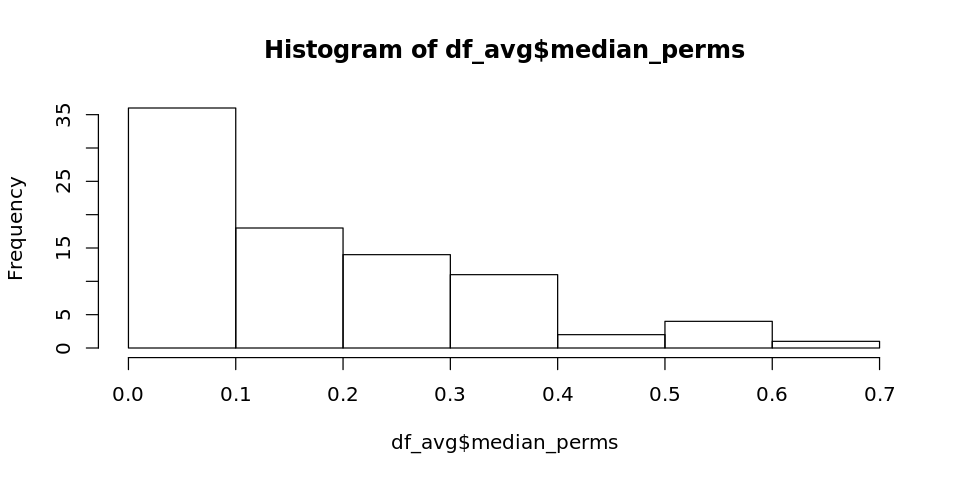

In [164]:
df_avg = df %>% group_by(gene) %>% summarise(mean_perms = mean(pv), median_perms = median(pv),
                                            min_perms = min(pv), max_perms = max(pv))
hist(df_avg$median_perms)

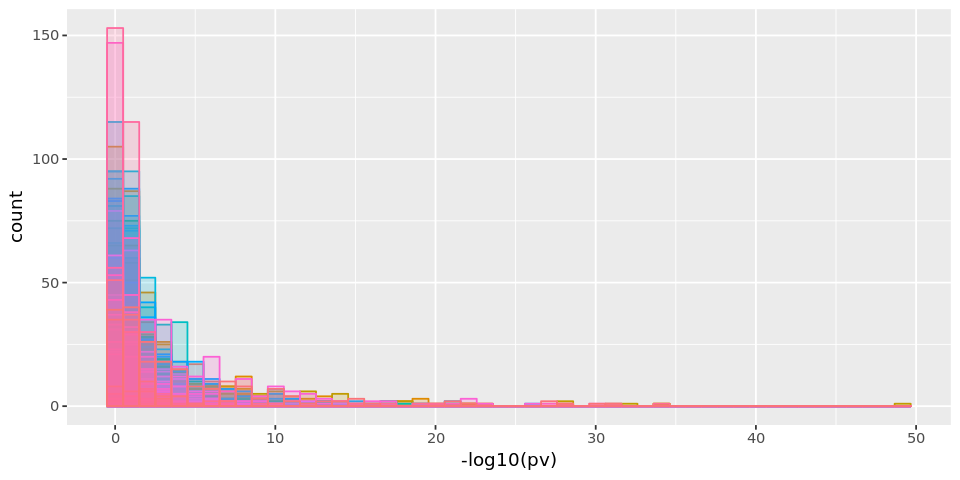

In [165]:
p = ggplot(df, aes(x = -log10(pv))) 
p + geom_histogram(aes(color = gene, fill = gene), alpha = 0.2, position = "identity", bins = 50) + theme(legend.position = "none")

In [166]:
filename = "/hps/nobackup/stegle/users/acuomo/all_scripts/struct_LMM2/sc_endodiff/interaction_test/MOFA/new/1mofa_factor_endo_eqtl_gaussE_gaussY/summary_endo_eqtl.csv"
df0 = read.csv(filename, row.names = 1)
df0$variant = df0$snpID
head(df0)

gene                    n_snps pv_raw       snpID           pv          
0 ENSG00000189306_RRP7A   3      7.398873e-10 22_42896474_T_C 2.219662e-09
1 ENSG00000189306_RRP7A   3      1.071047e-09 22_42897414_A_C 3.213142e-09
2 ENSG00000189306_RRP7A   3      2.643161e-14 22_42903671_T_G 7.929483e-14
3 ENSG00000196236_XPNPEP3 2      2.618886e-03 22_41256802_A_G 5.237773e-03
4 ENSG00000196236_XPNPEP3 2      1.532041e-02 22_41394128_C_T 3.064081e-02
5 ENSG00000185651_UBE2L3  1      3.476350e-04 22_22077719_C_T 3.476350e-04
  variant        
0 22_42896474_T_C
1 22_42897414_A_C
2 22_42903671_T_G
3 22_41256802_A_G
4 22_41394128_C_T
5 22_22077719_C_T

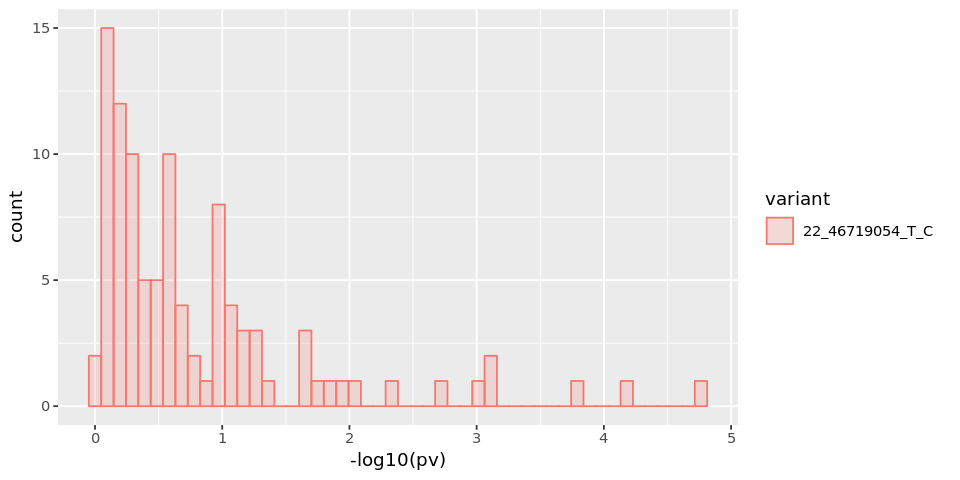

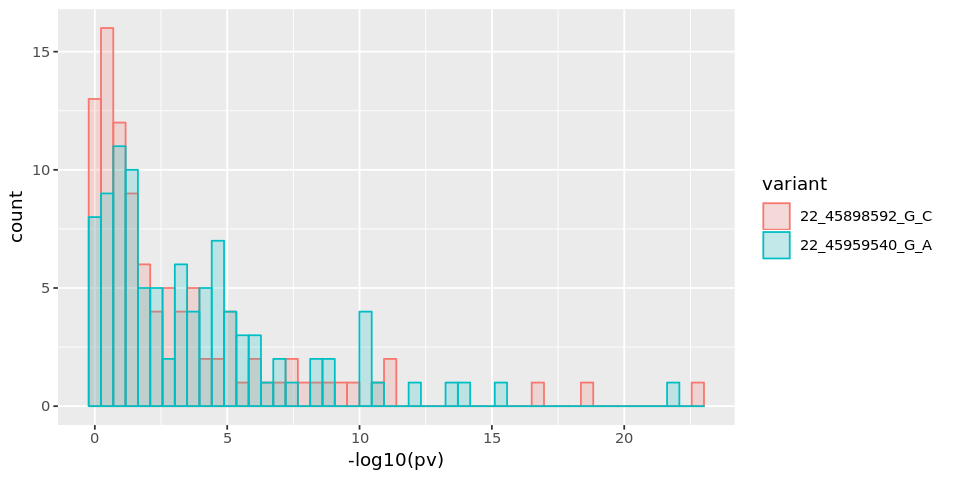

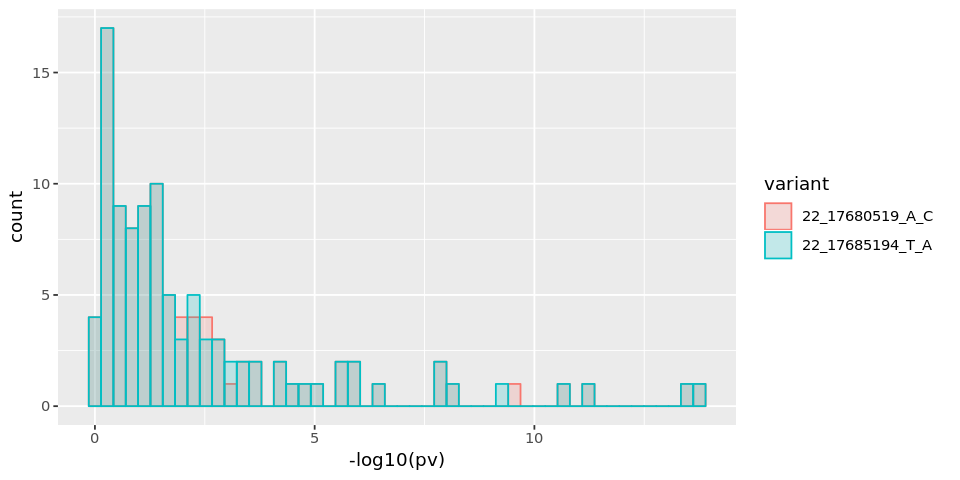

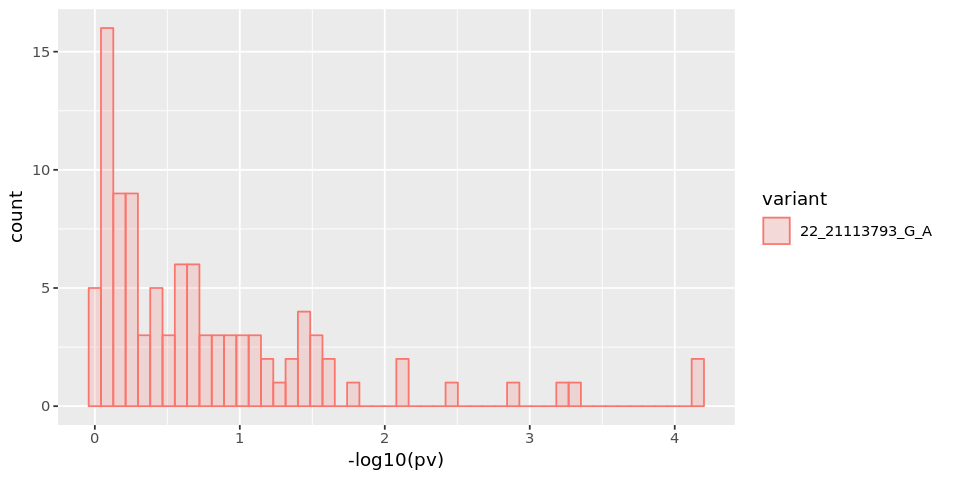

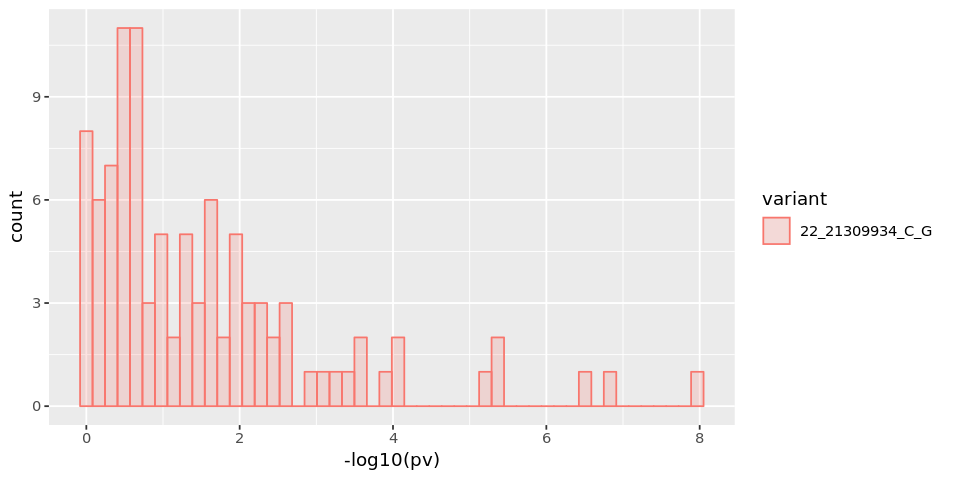

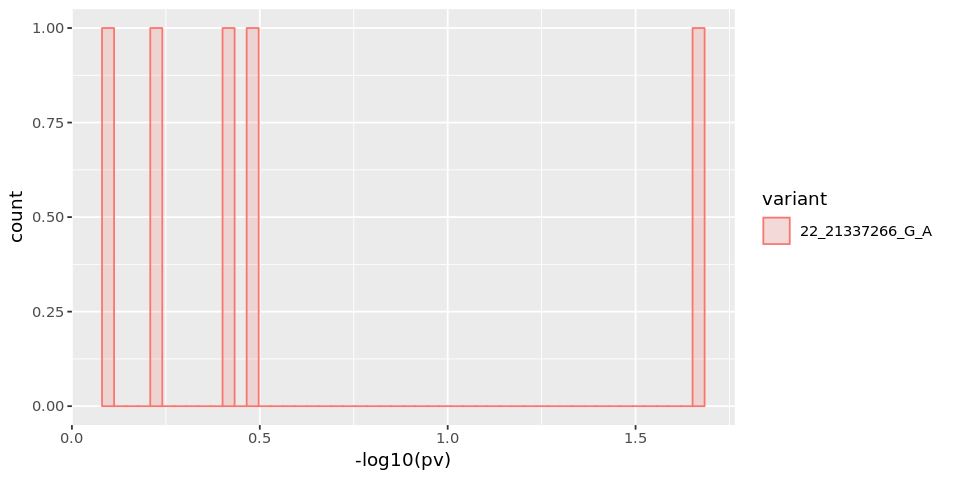

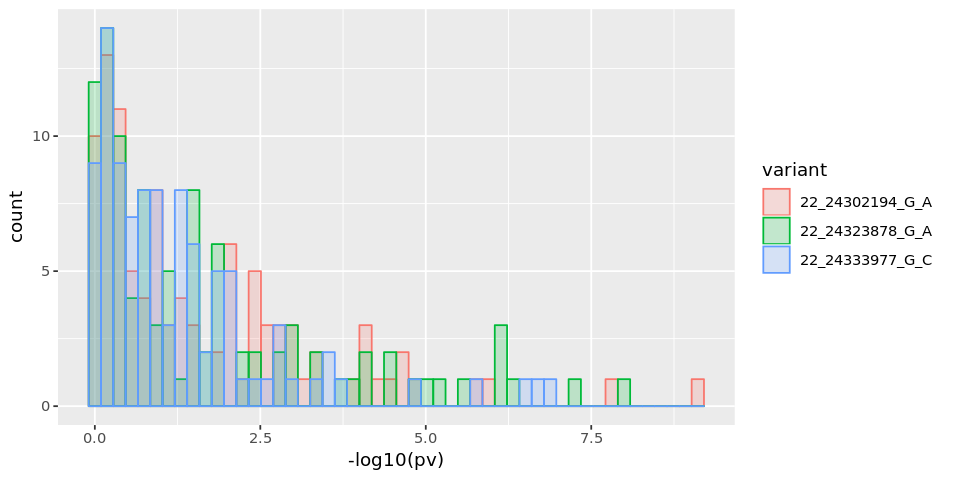

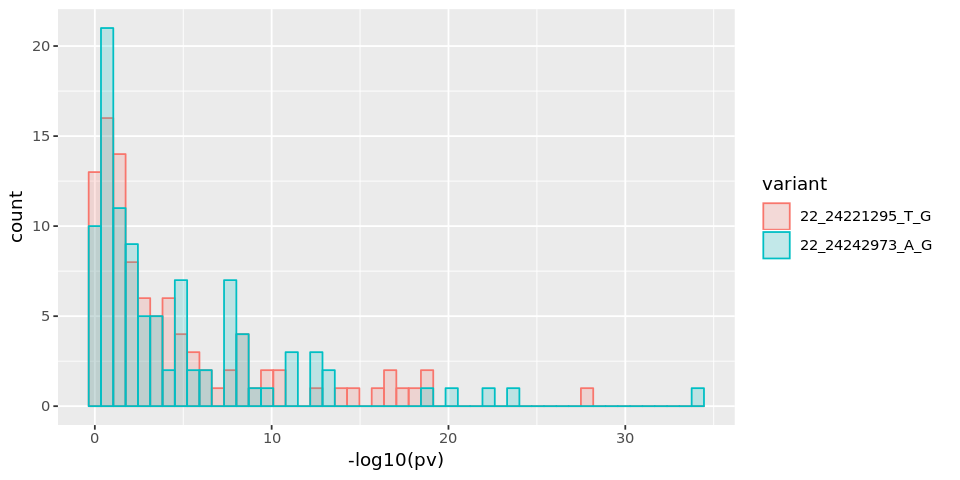

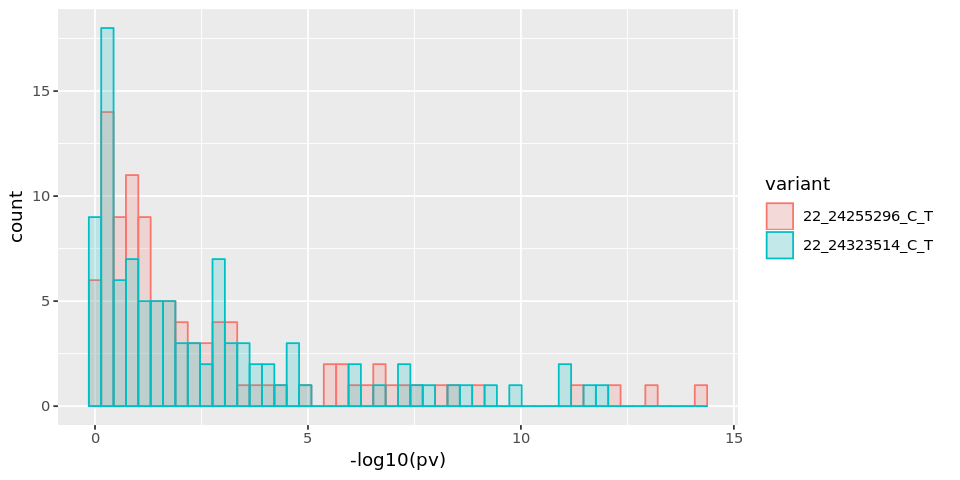

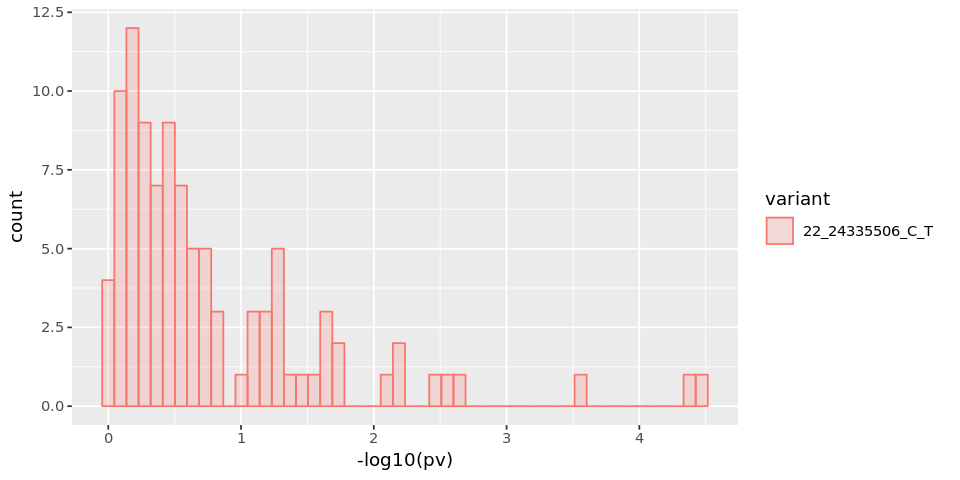

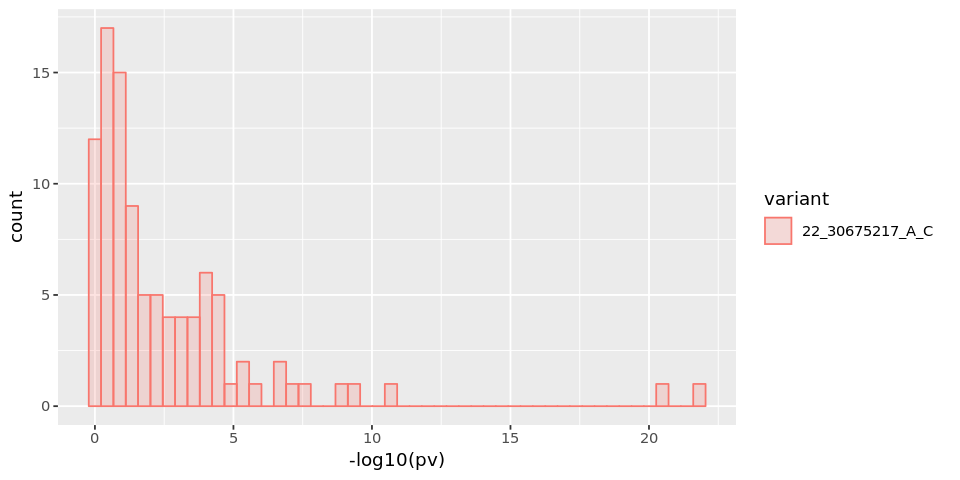

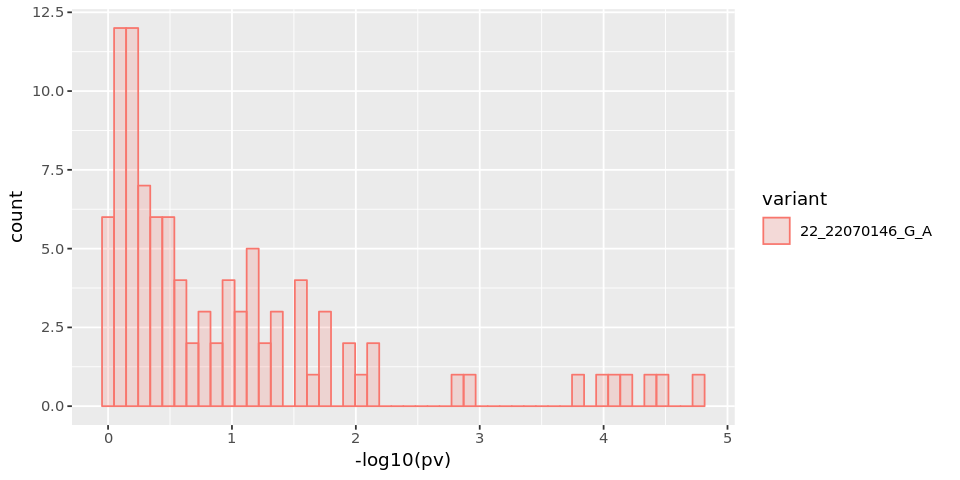

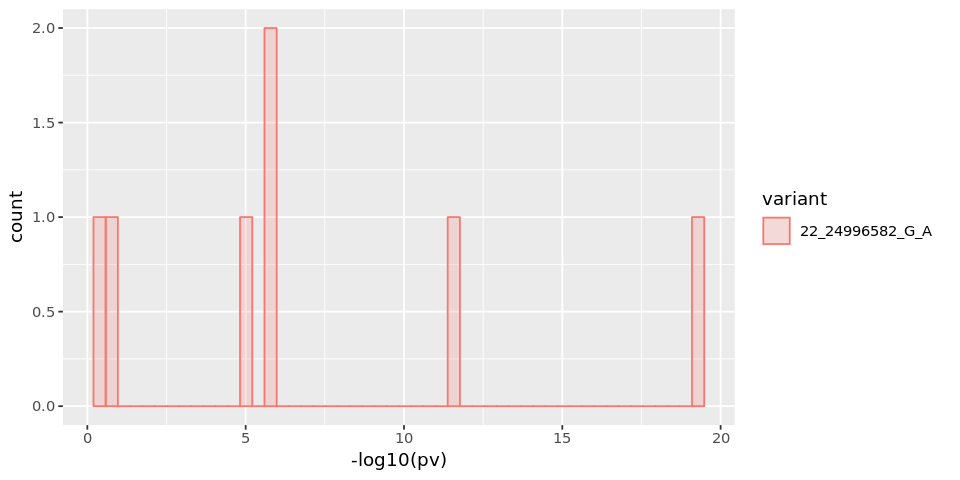

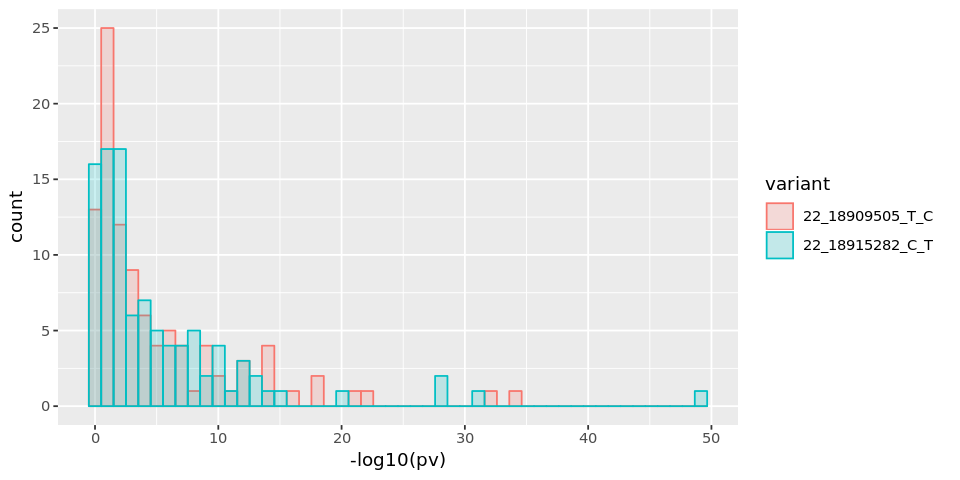

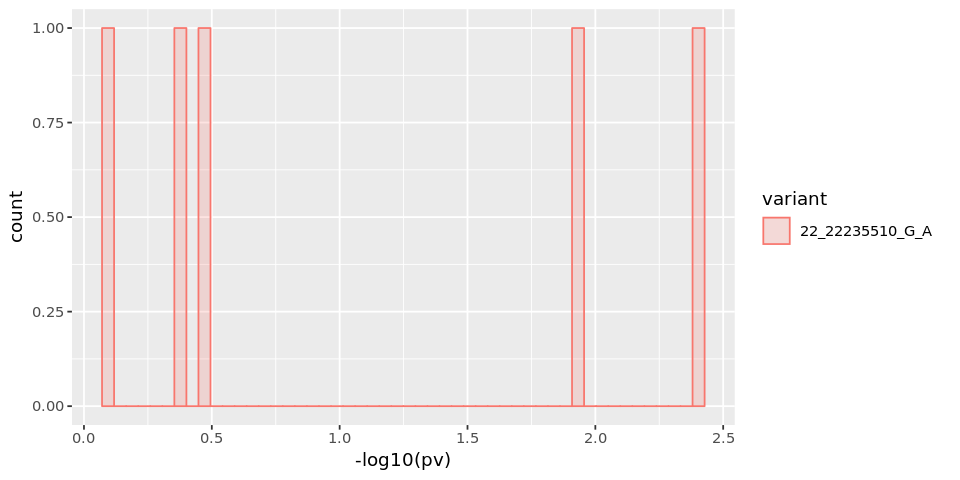

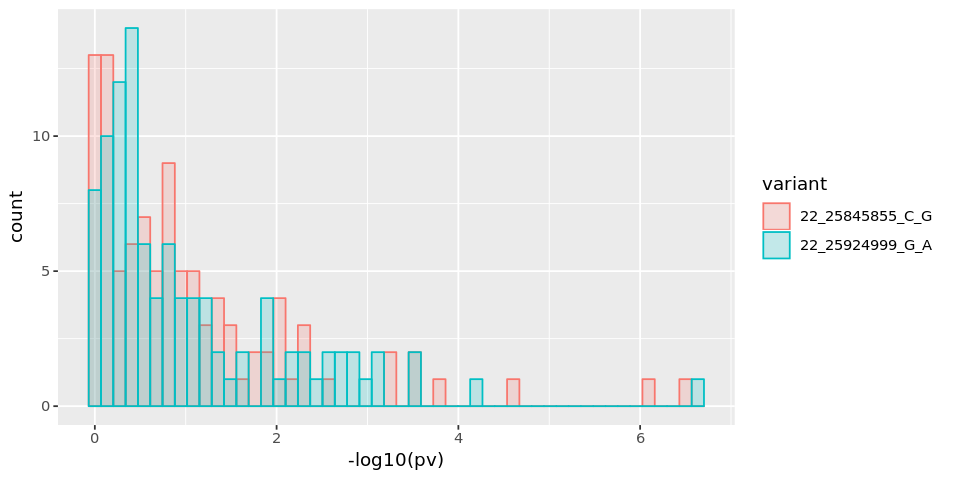

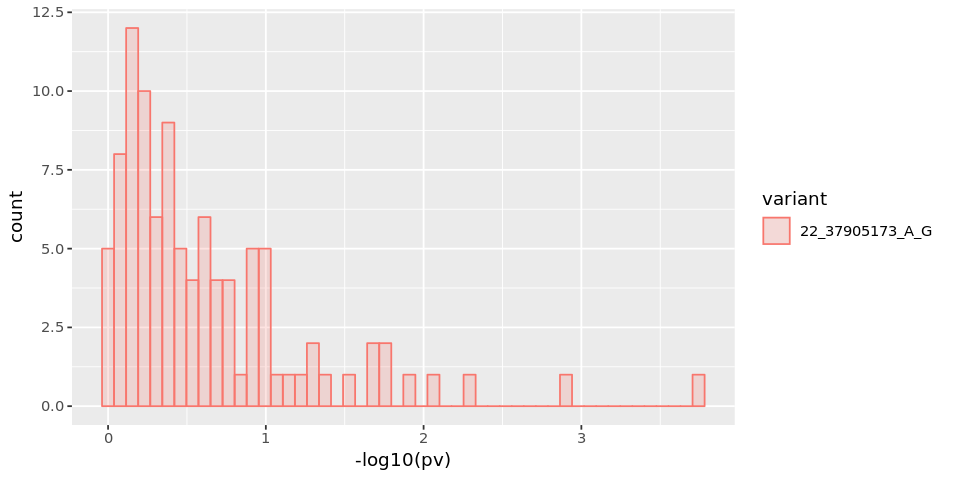

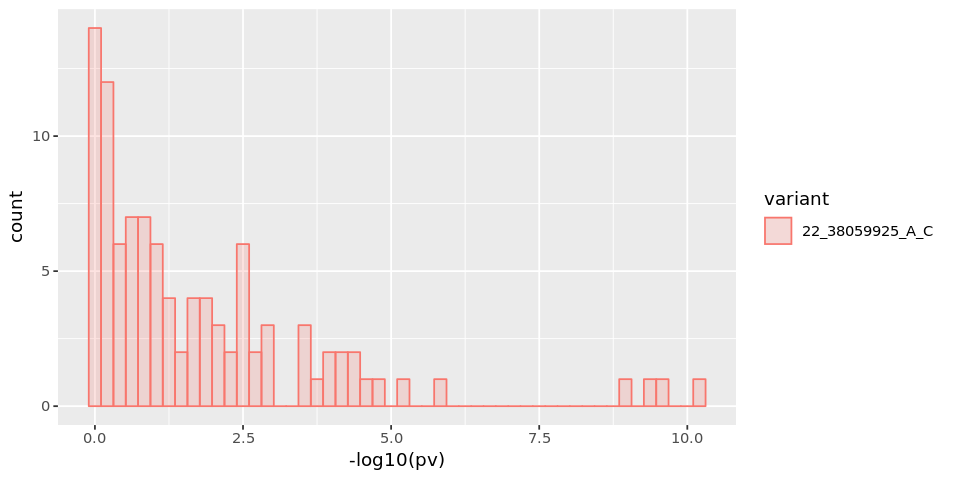

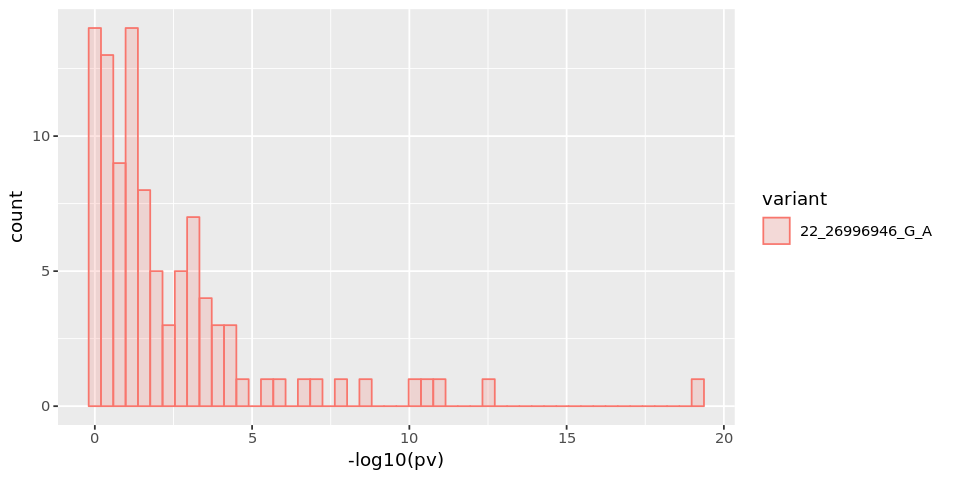

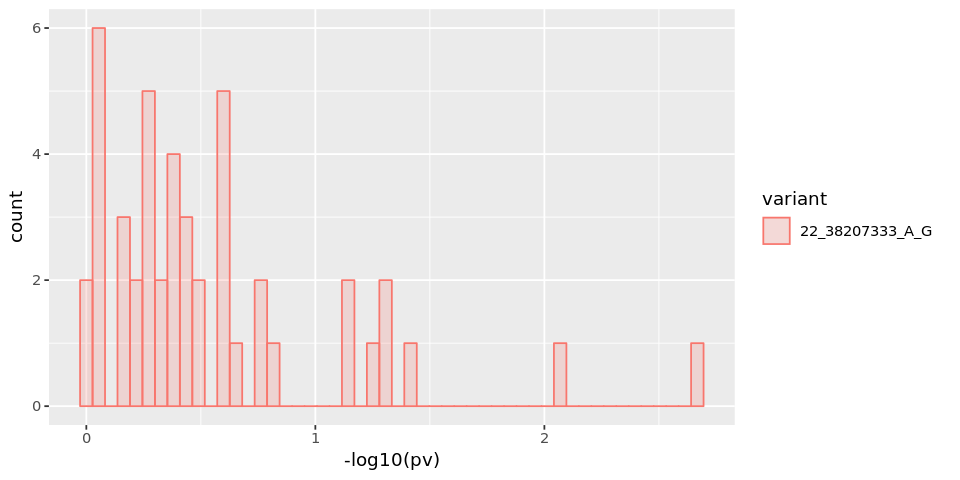

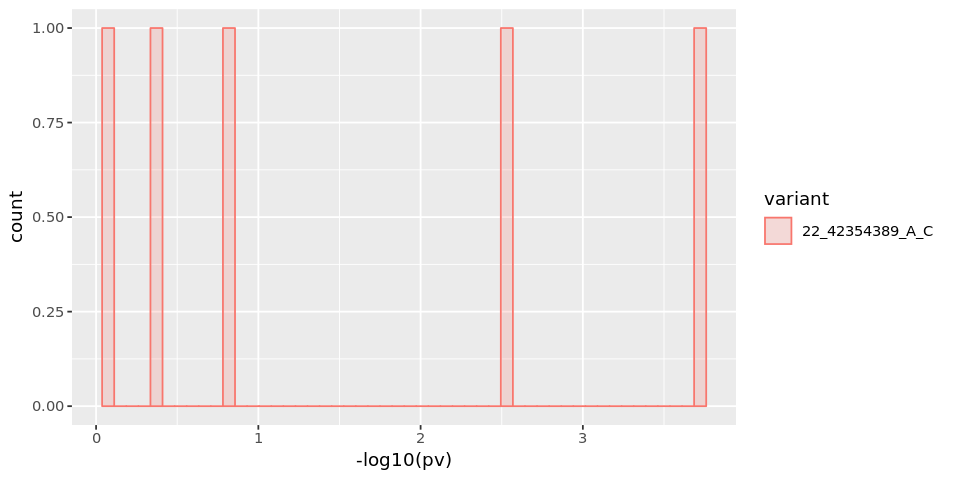

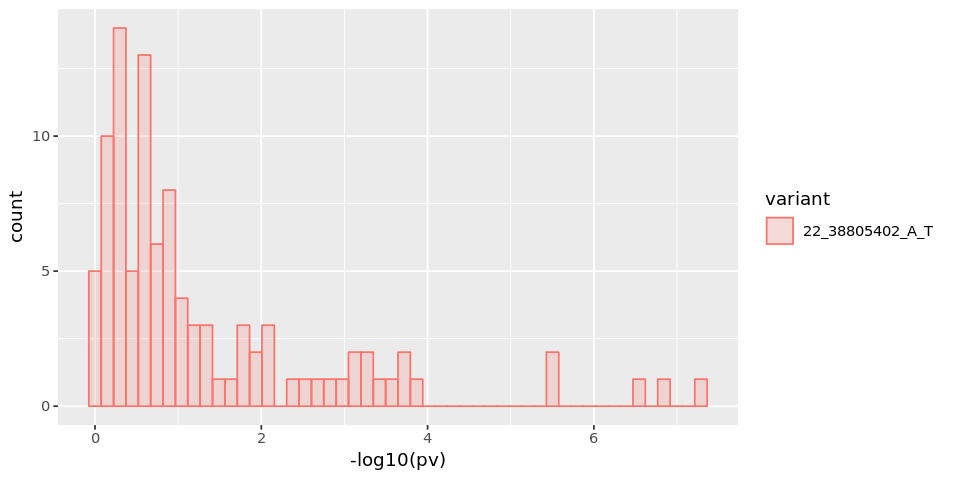

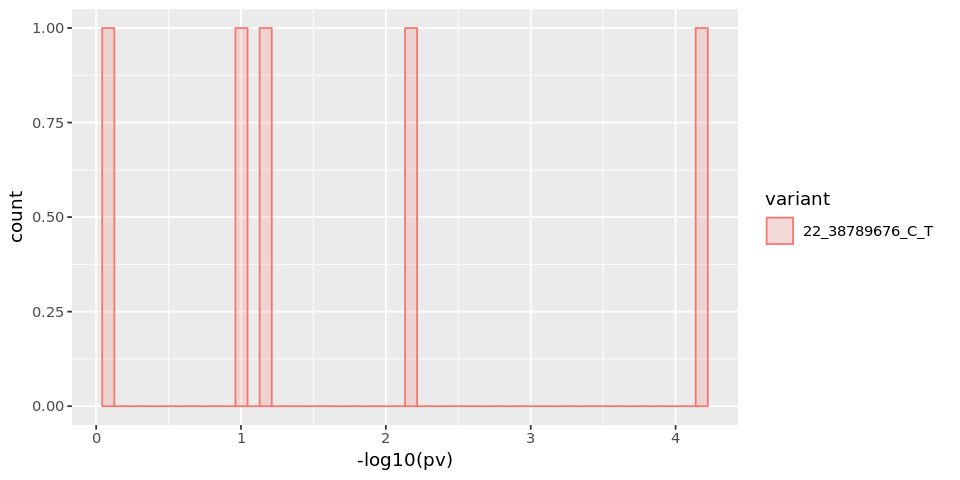

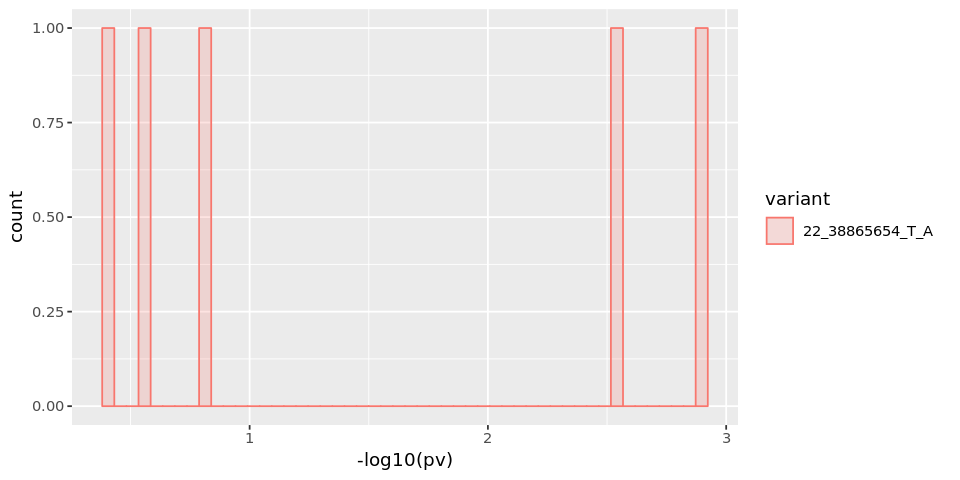

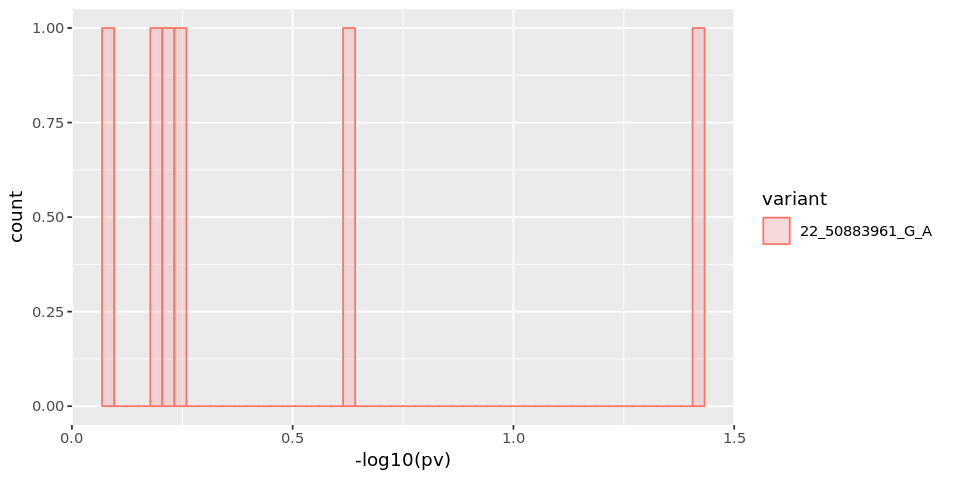

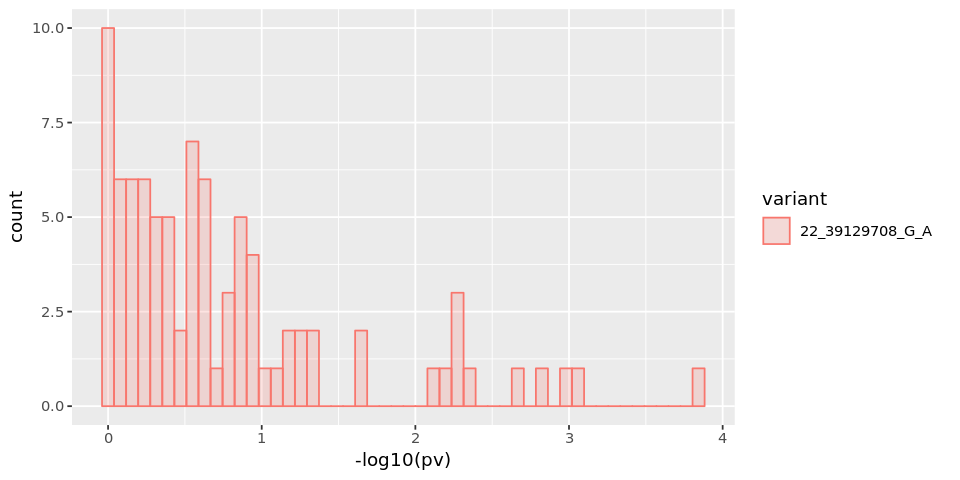

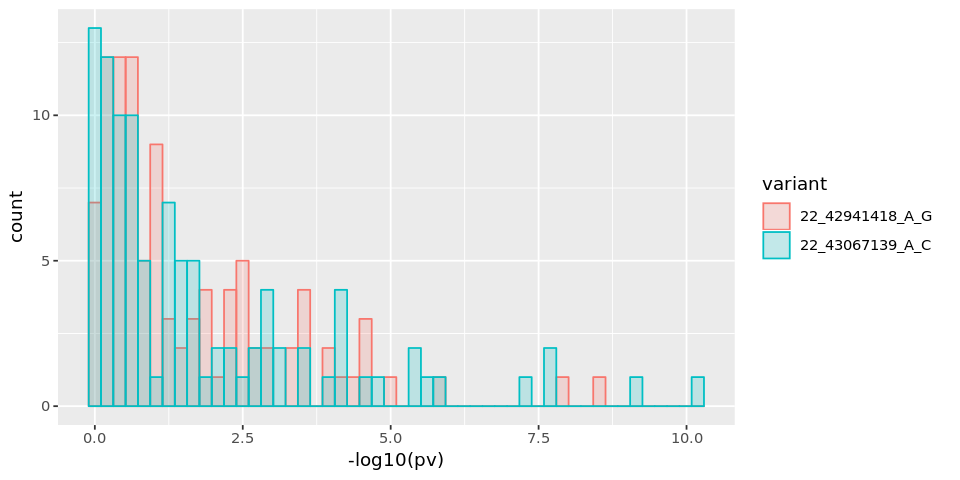

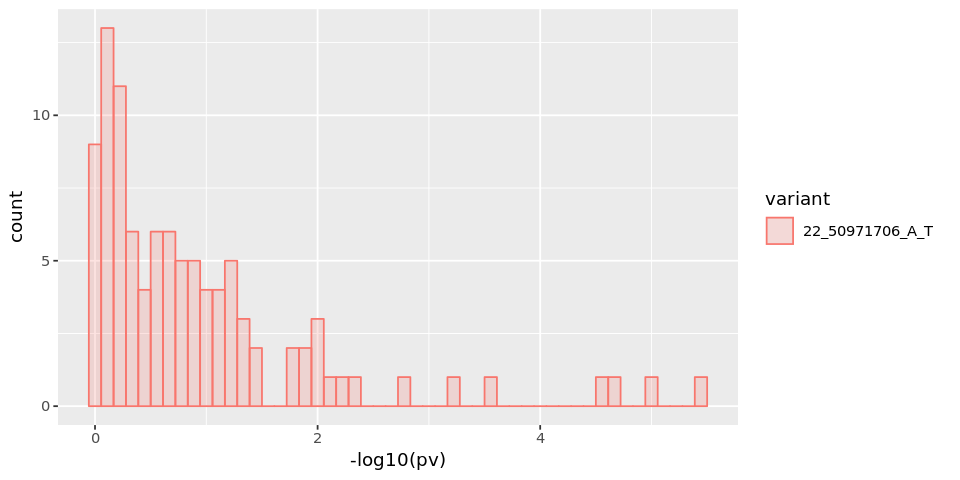

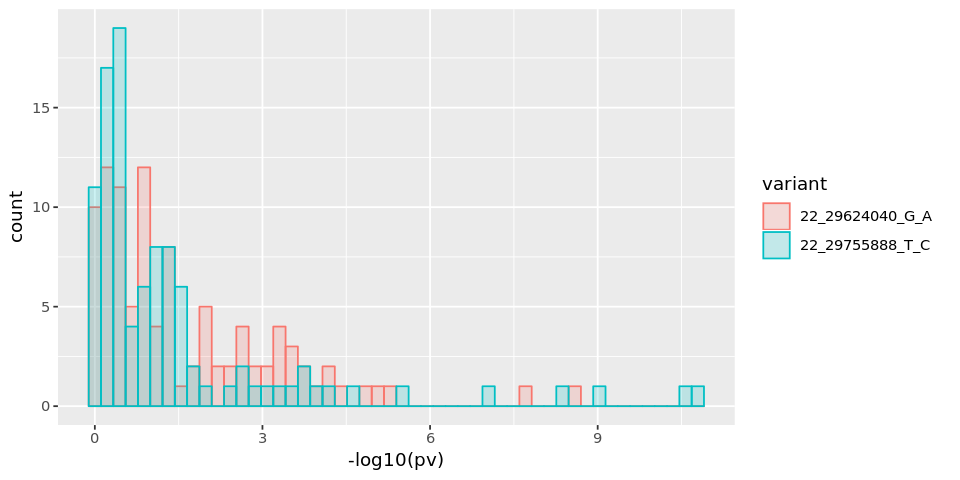

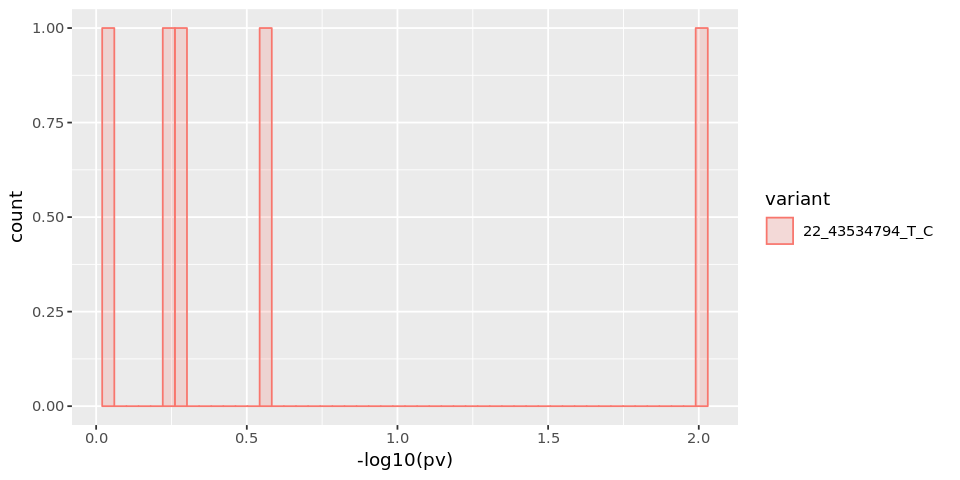

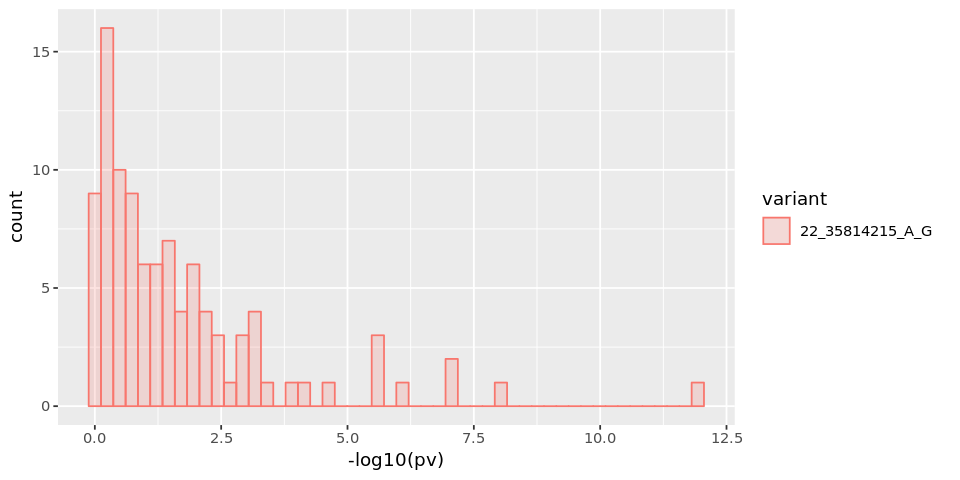

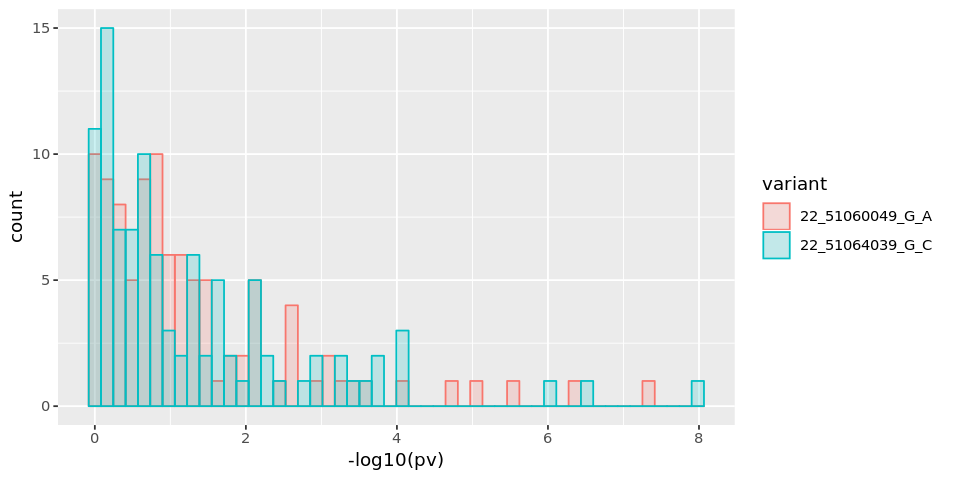

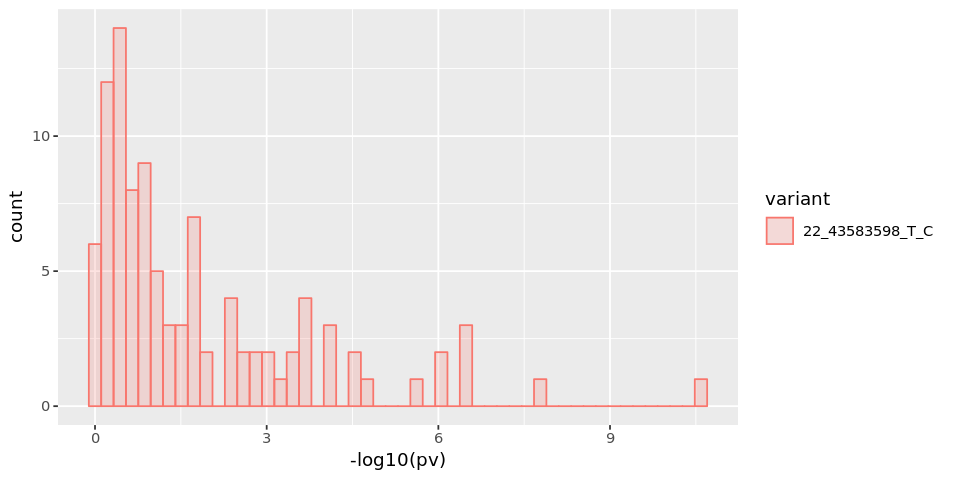

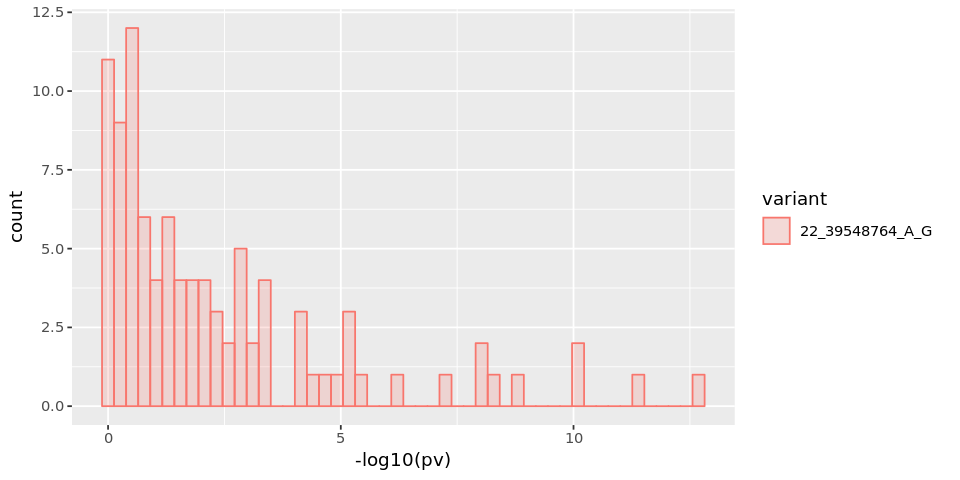

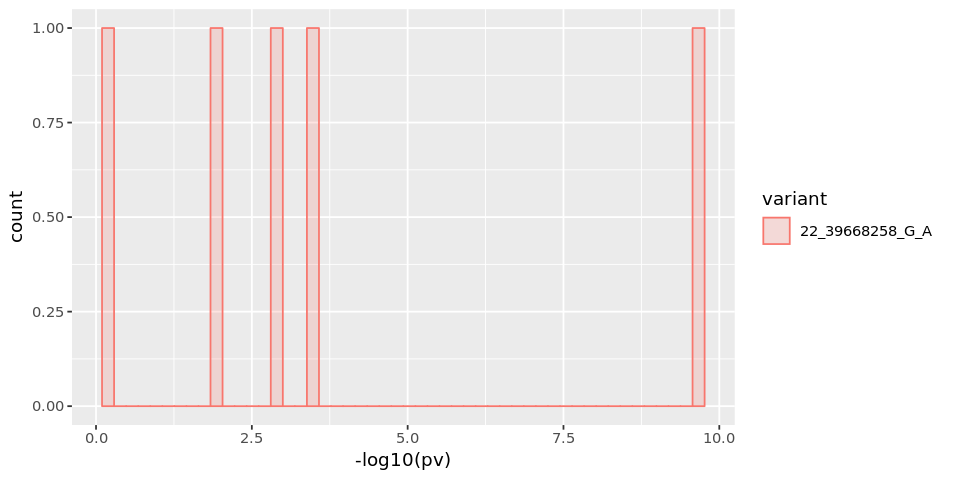

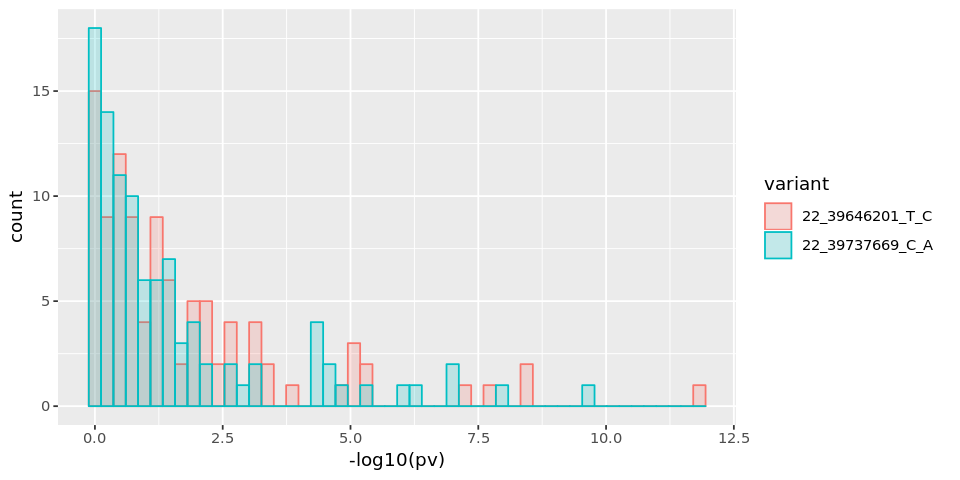

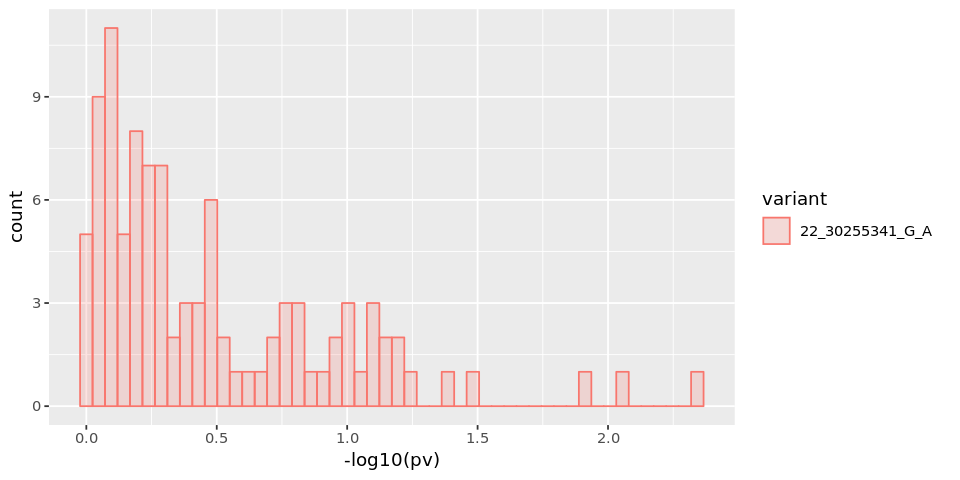

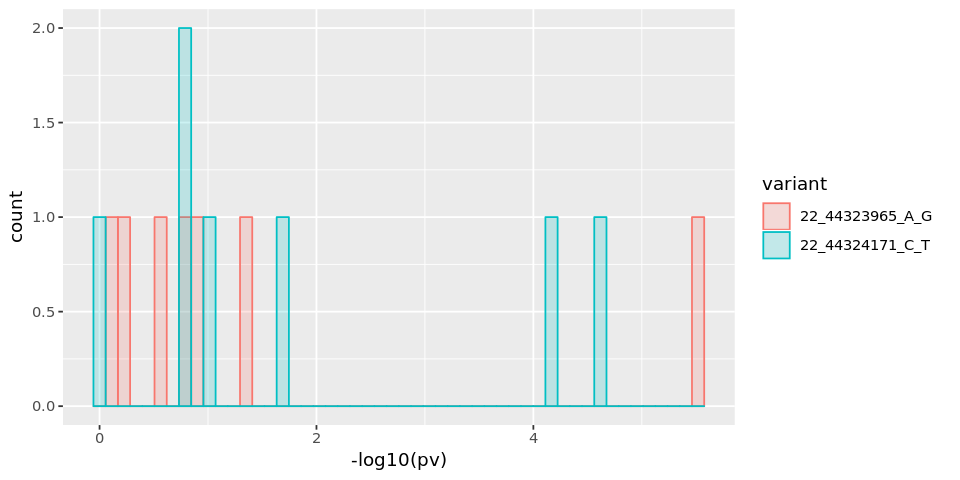

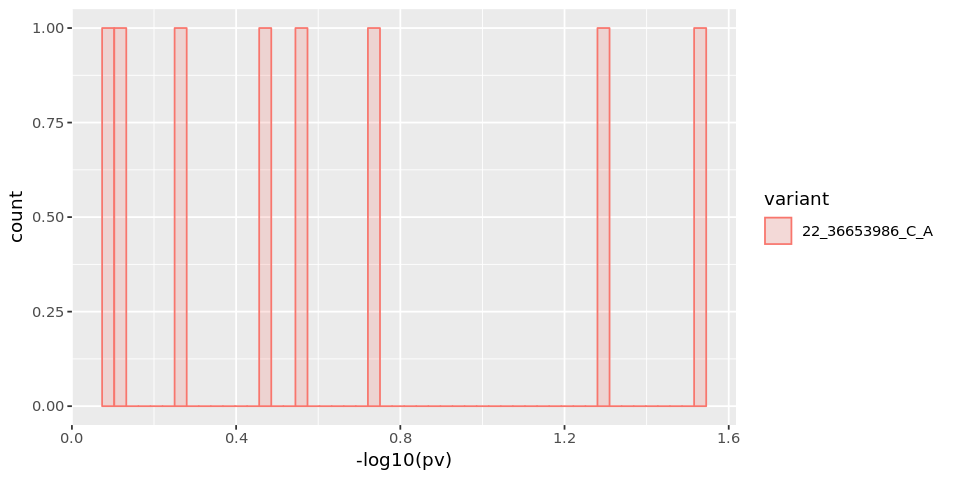

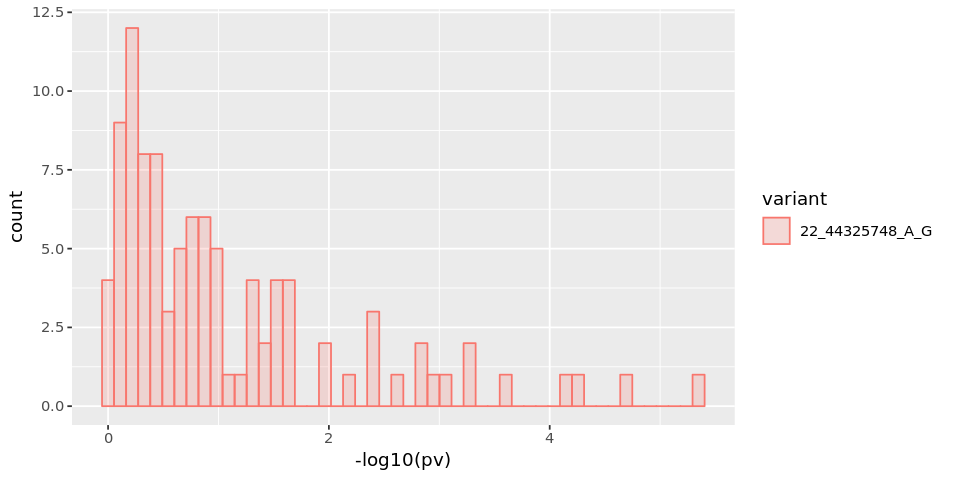

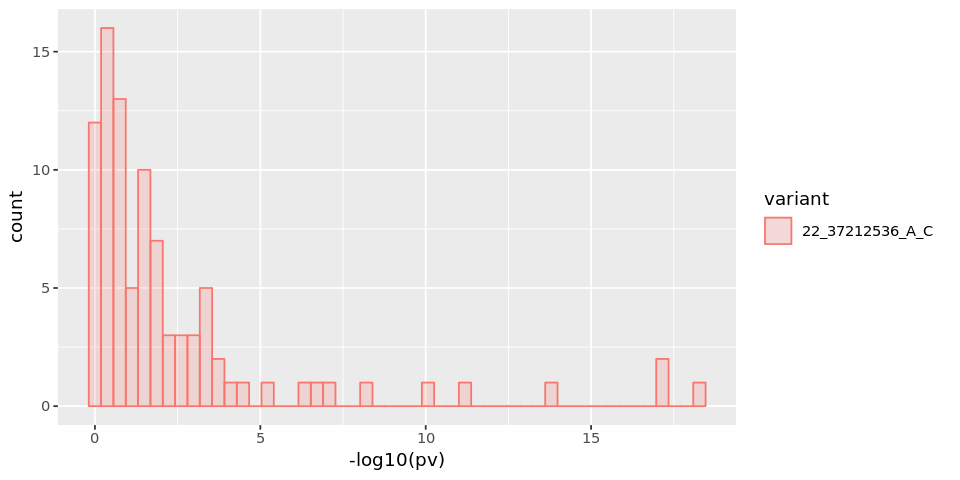

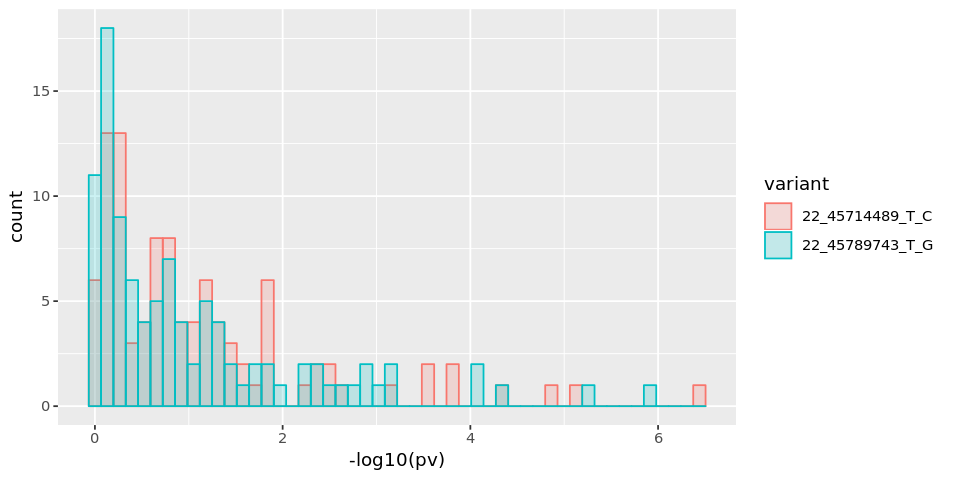

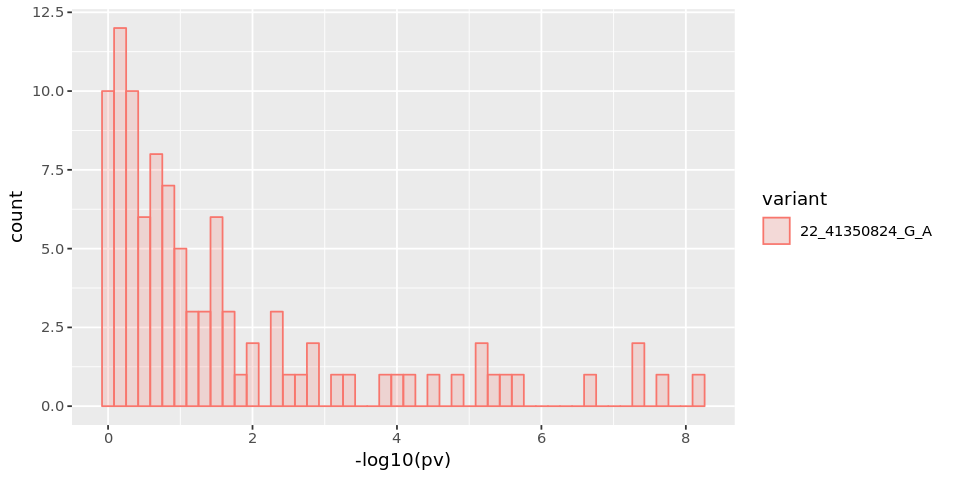

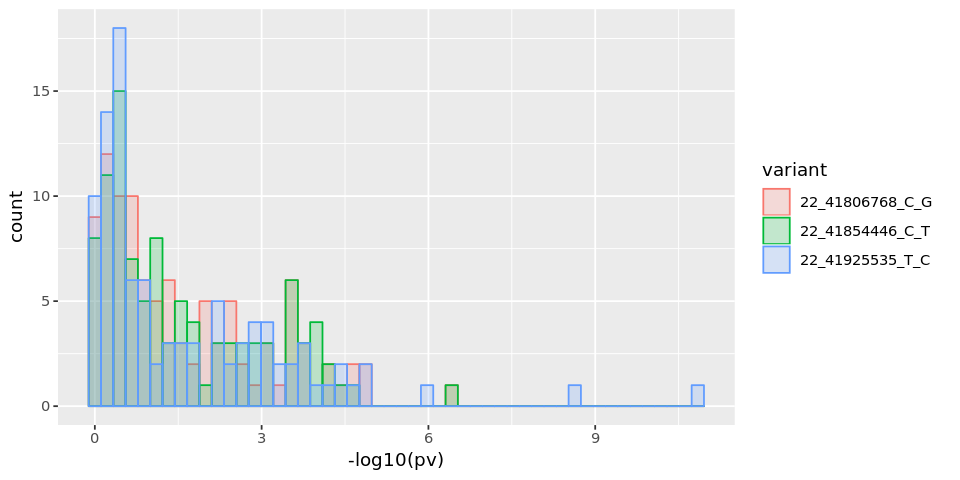

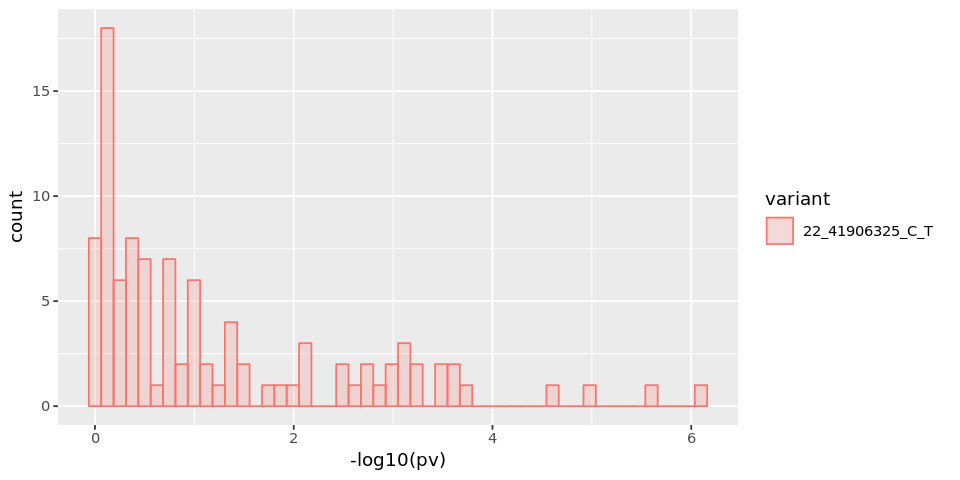

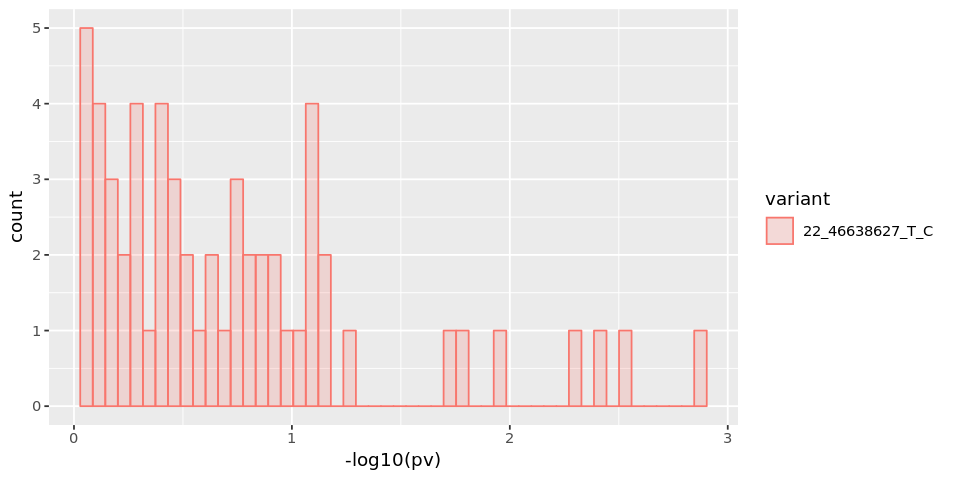

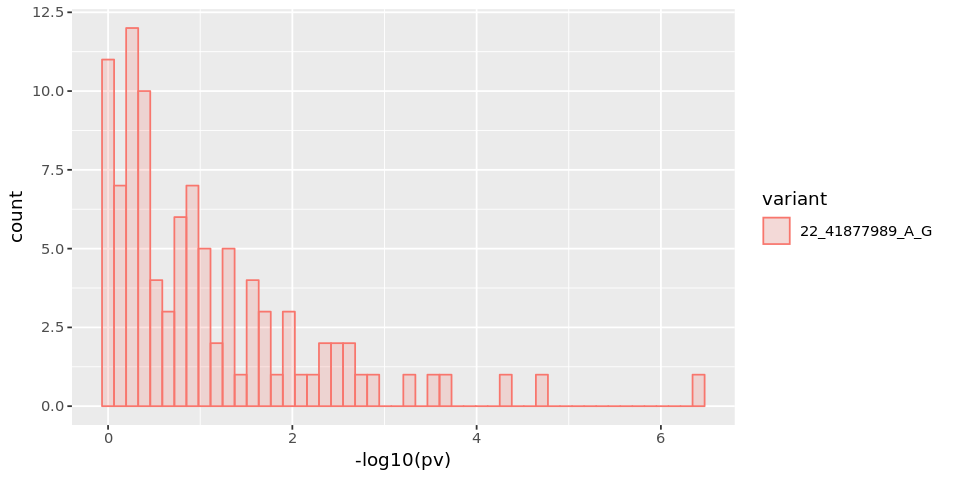

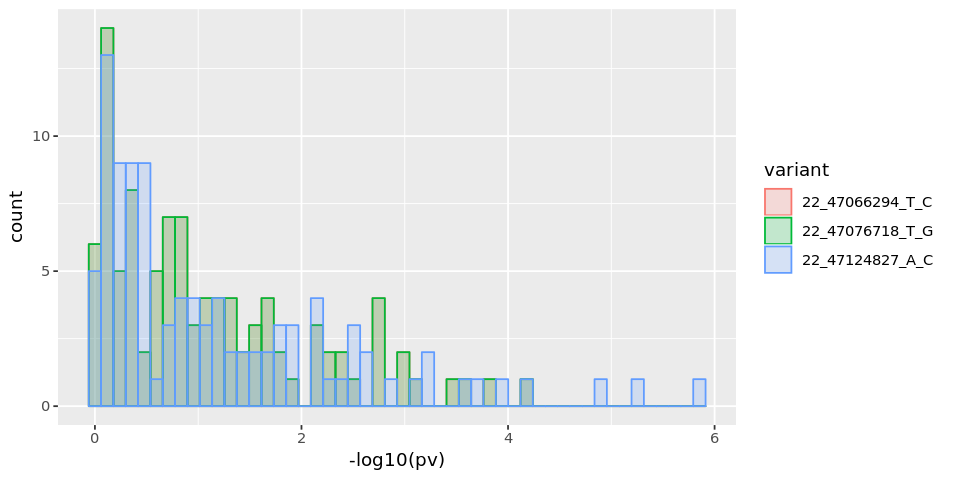

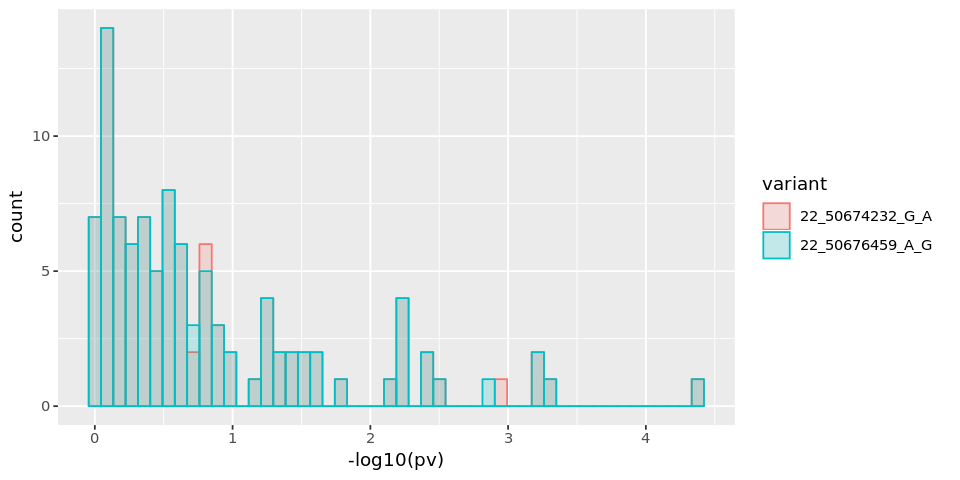

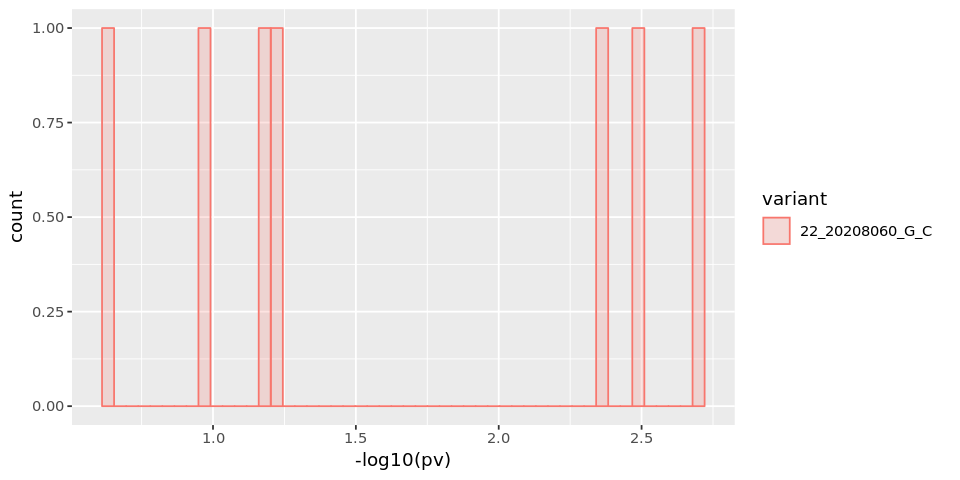

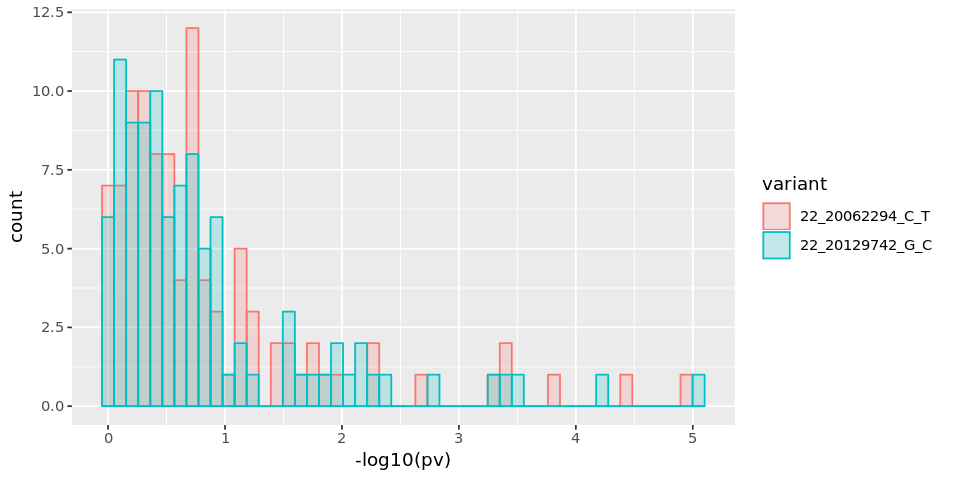

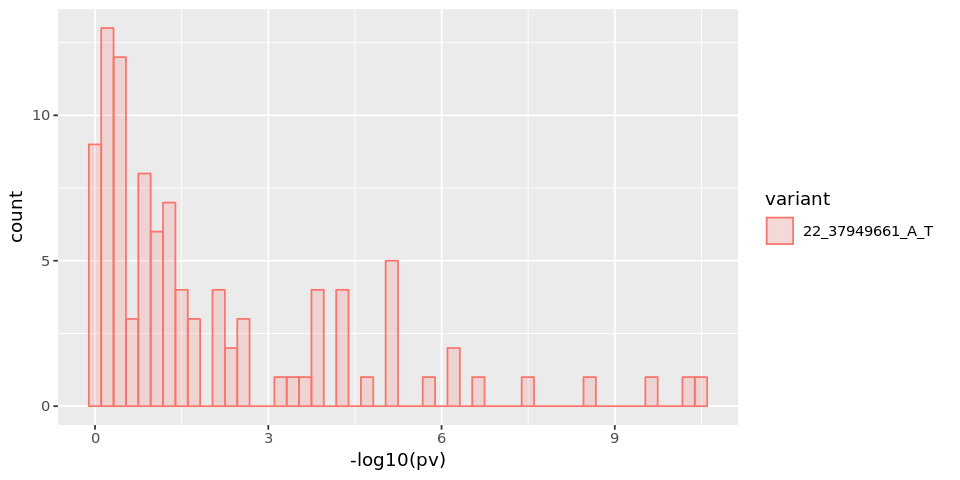

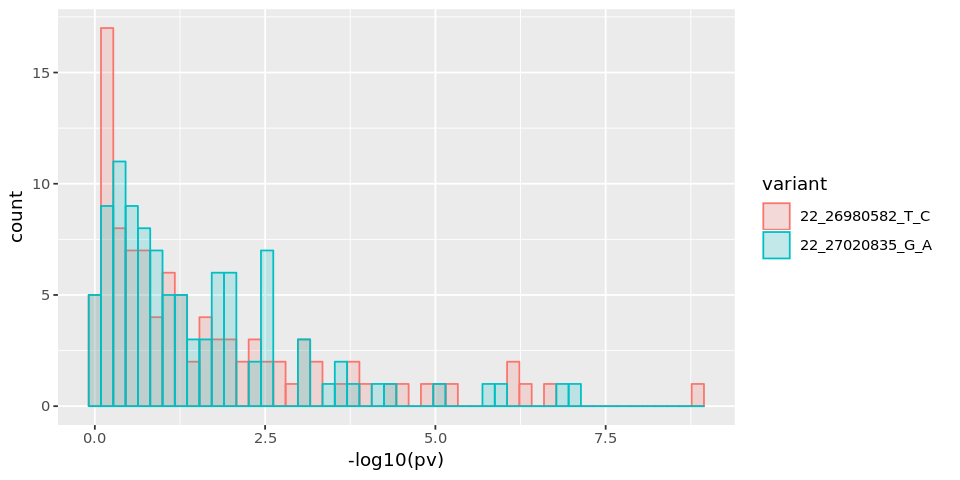

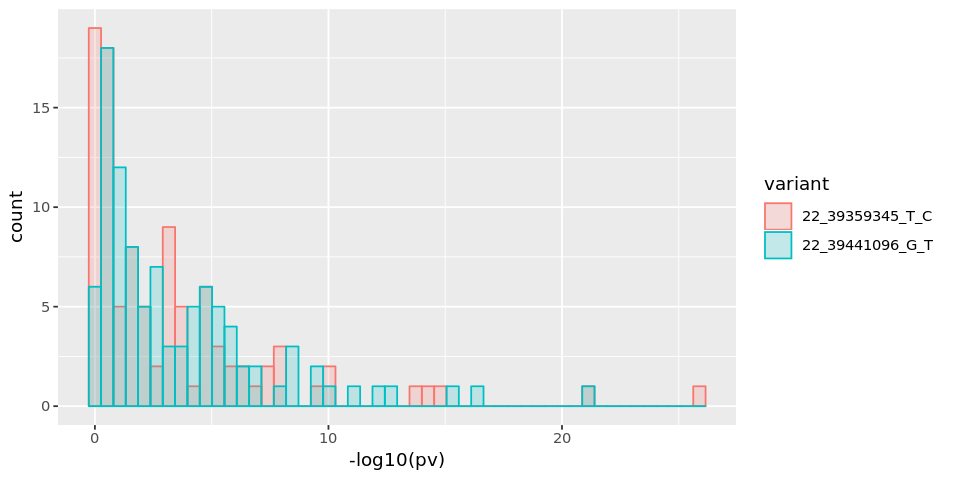

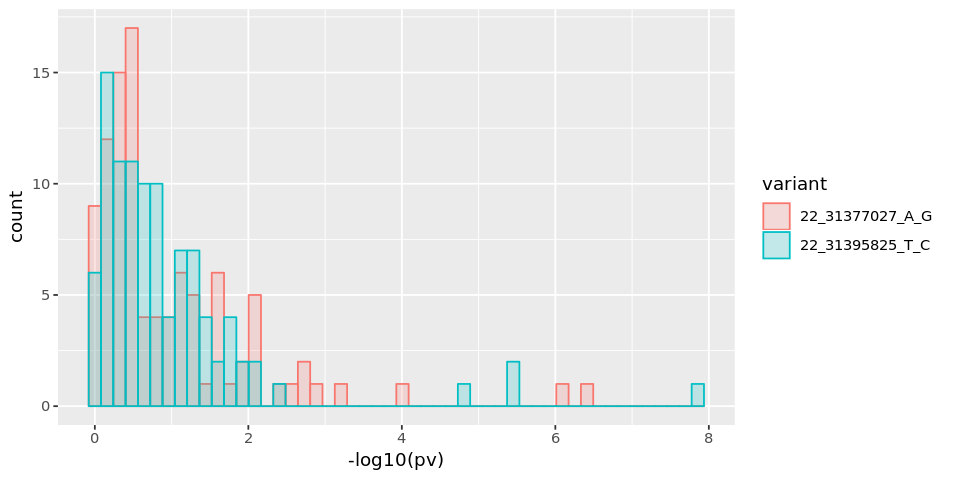

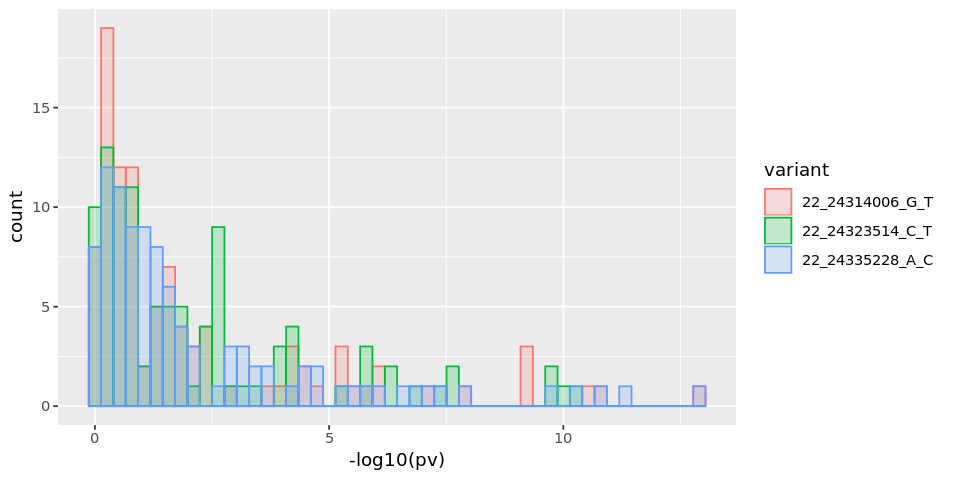

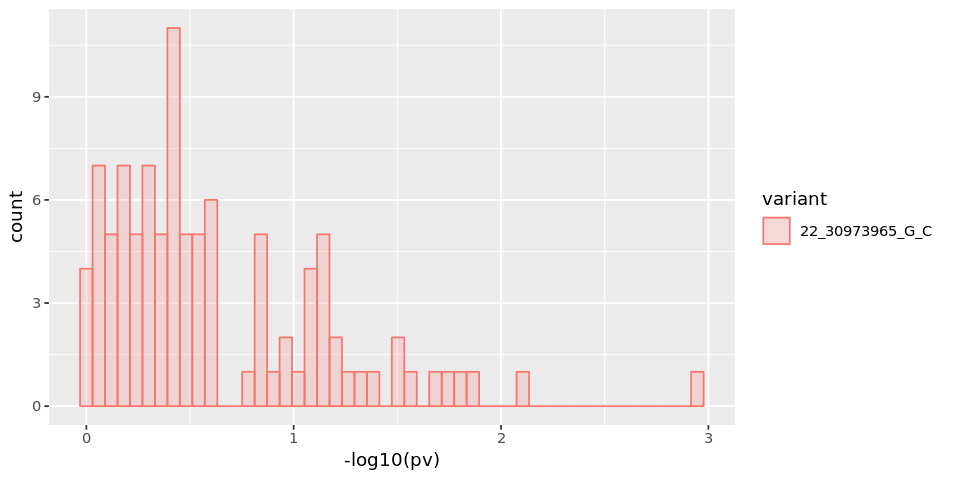

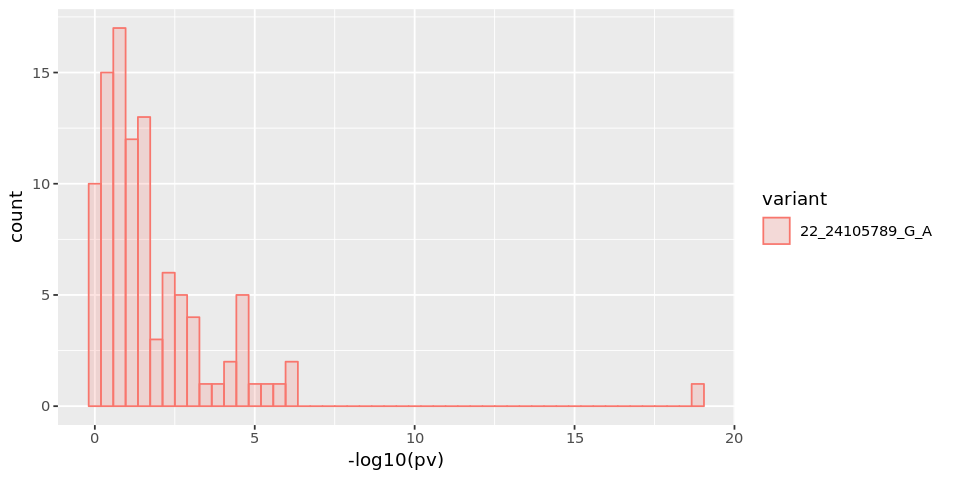

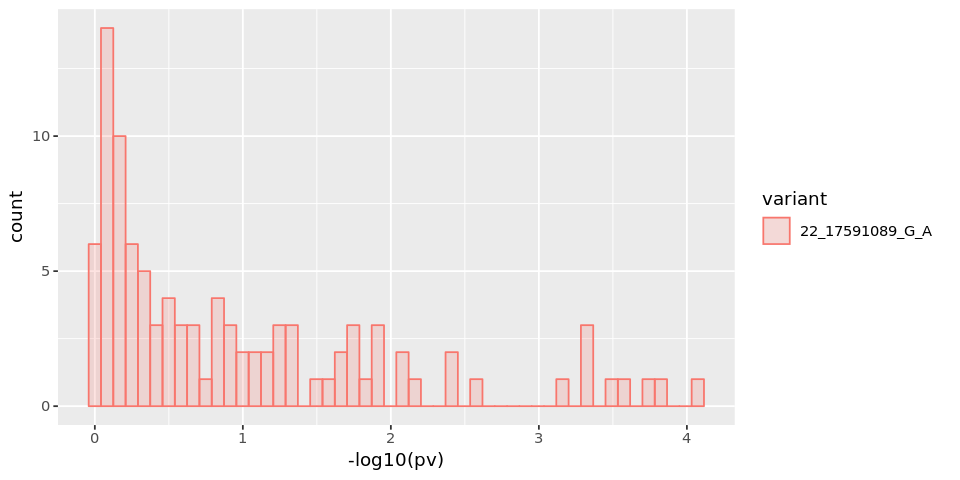

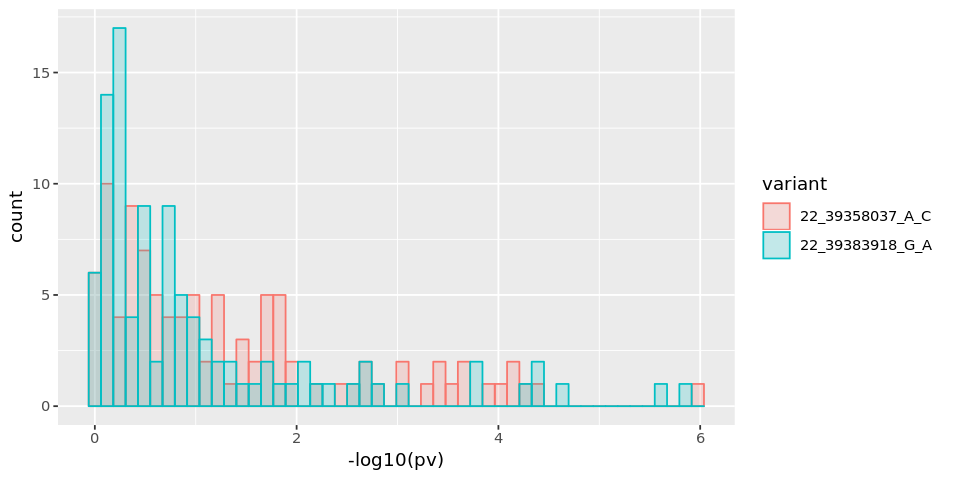

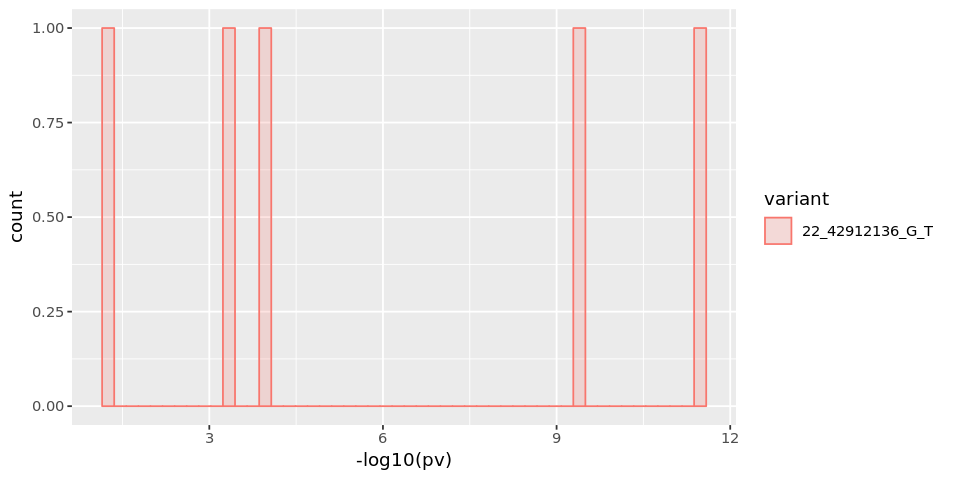

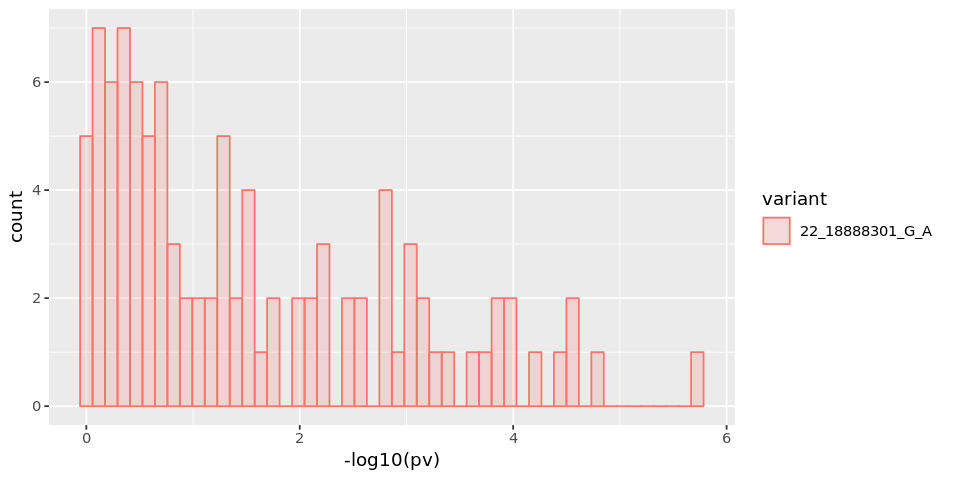

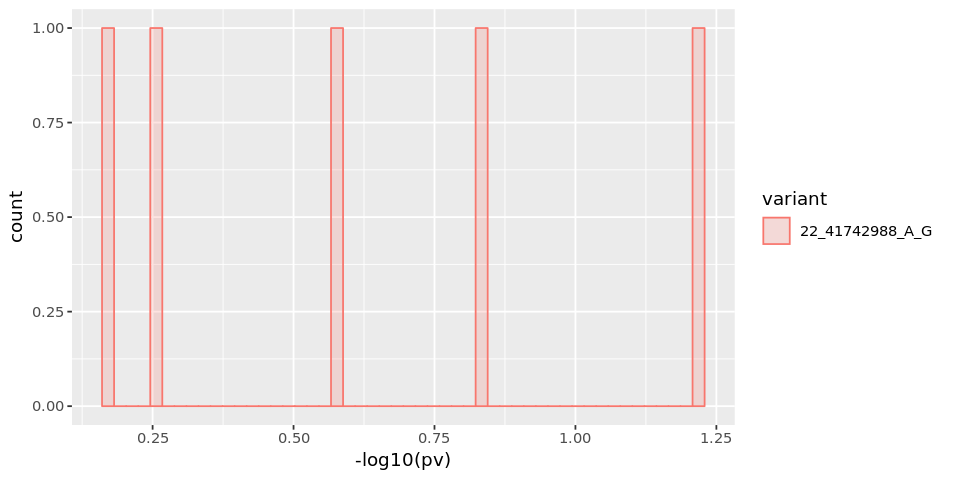

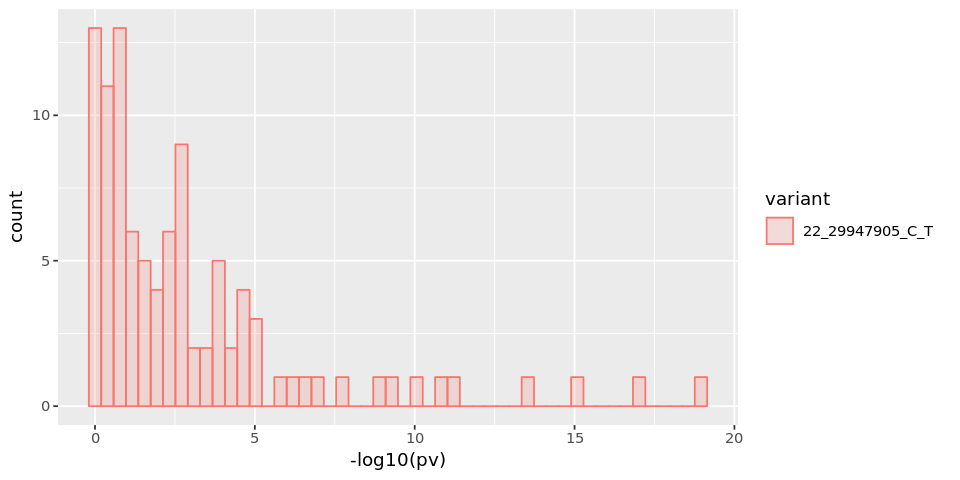

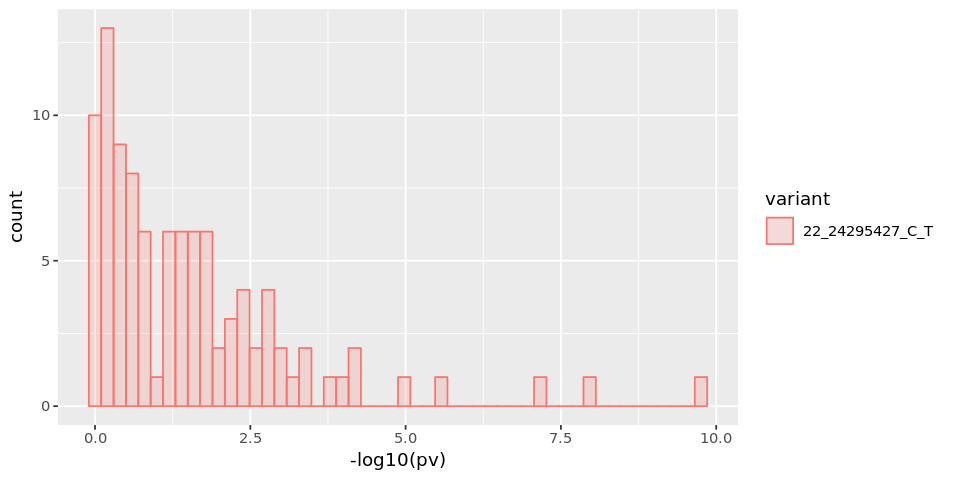

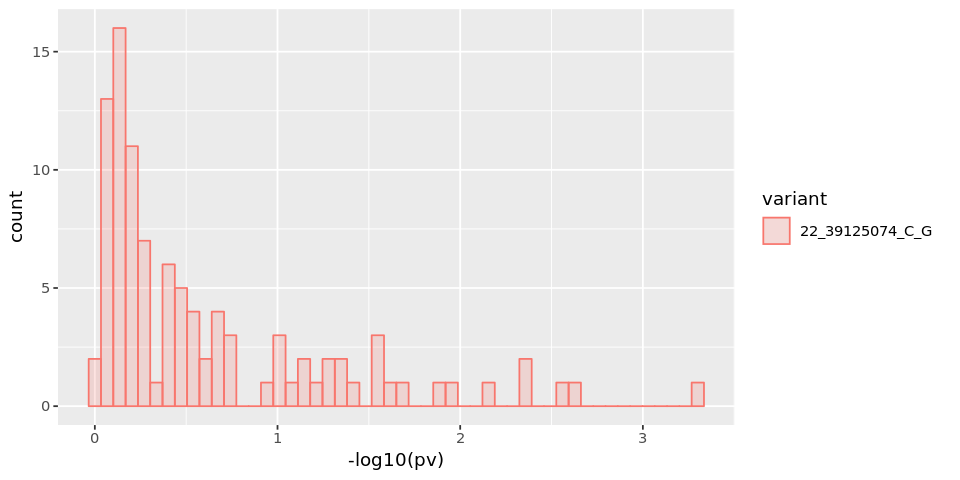

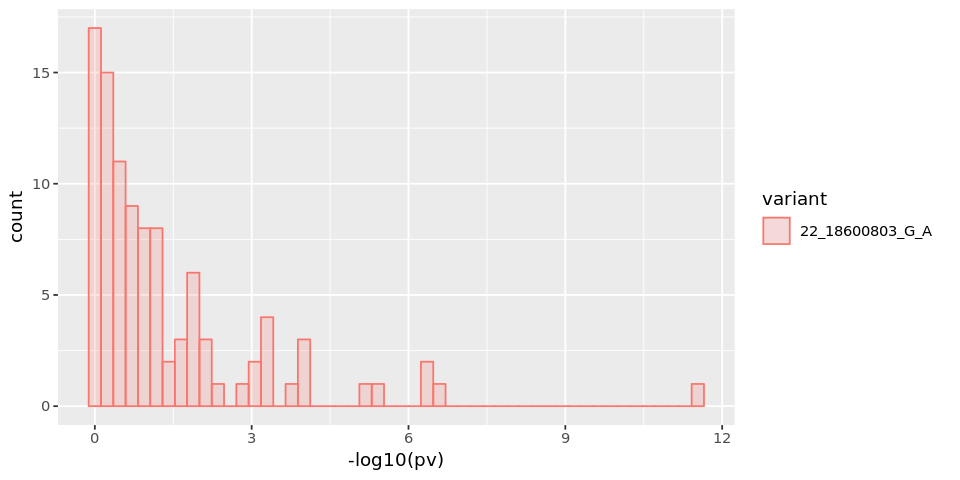

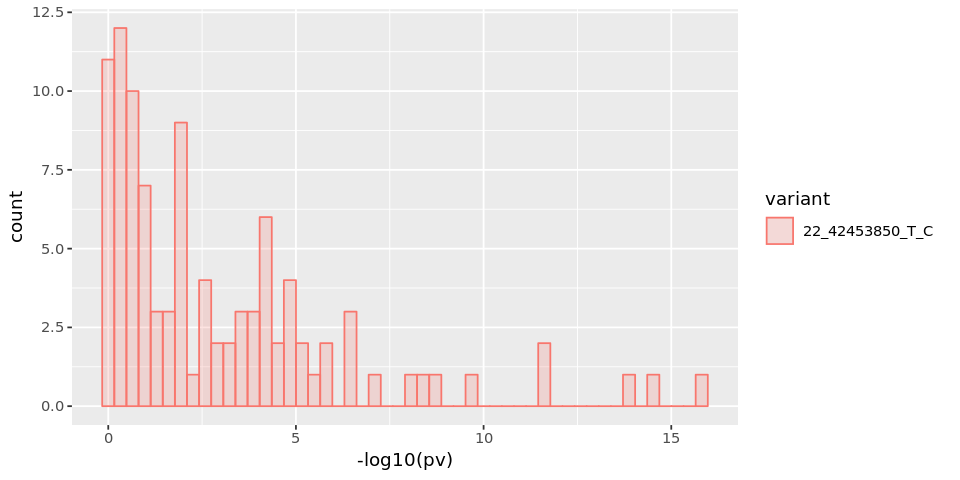

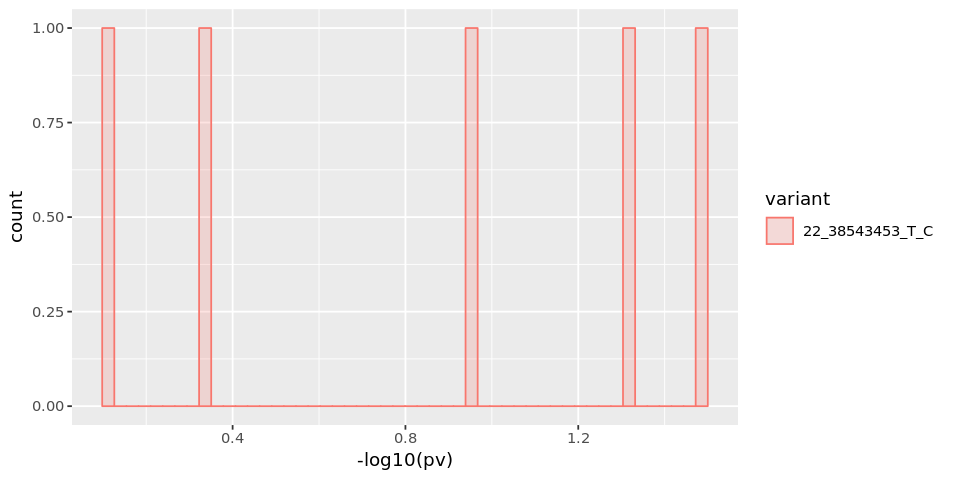

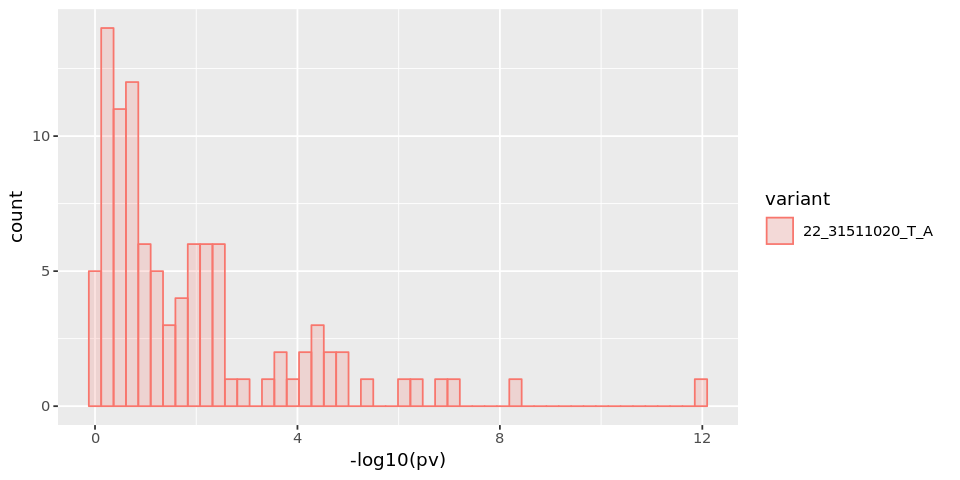

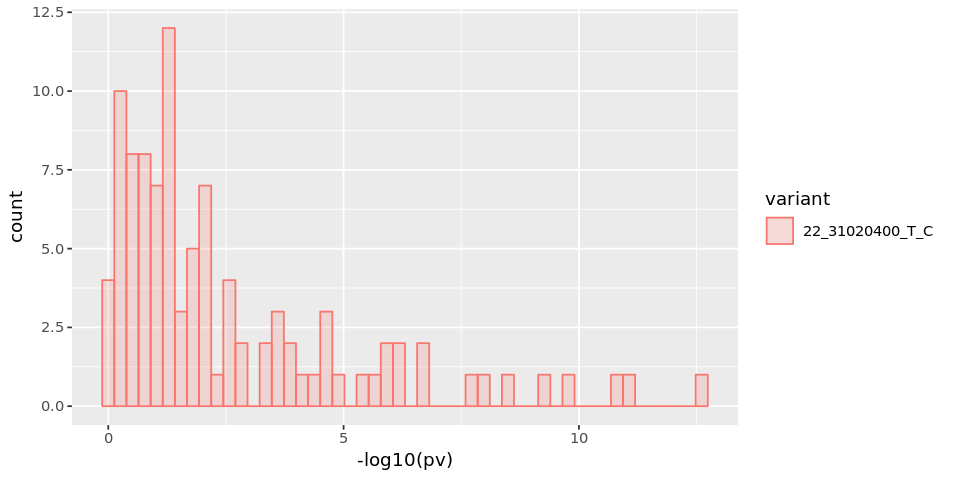

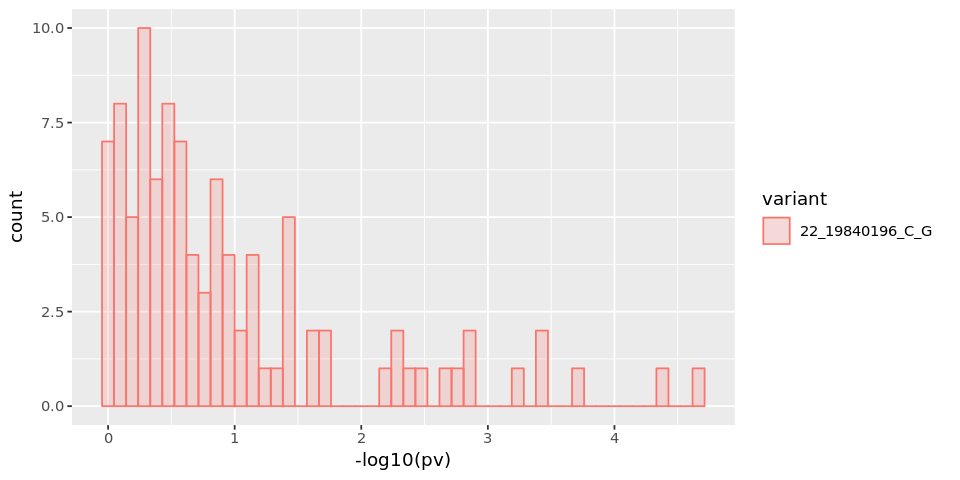

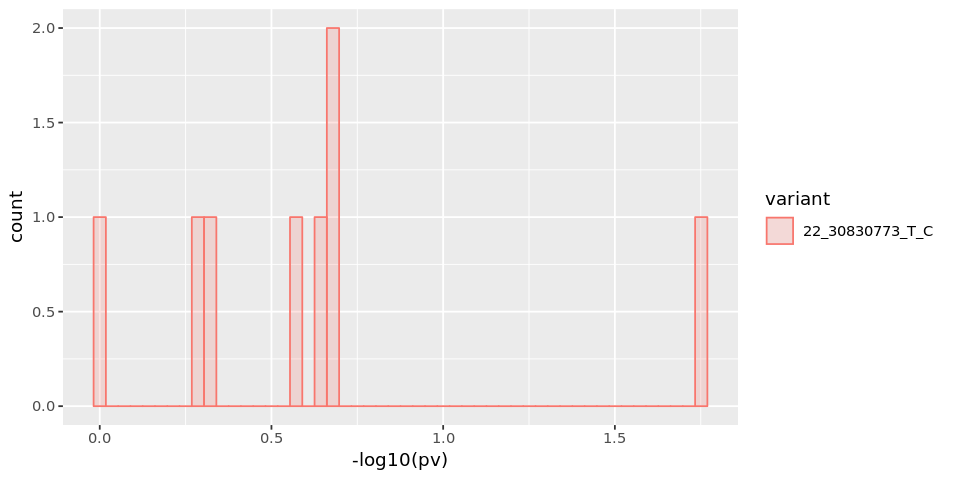

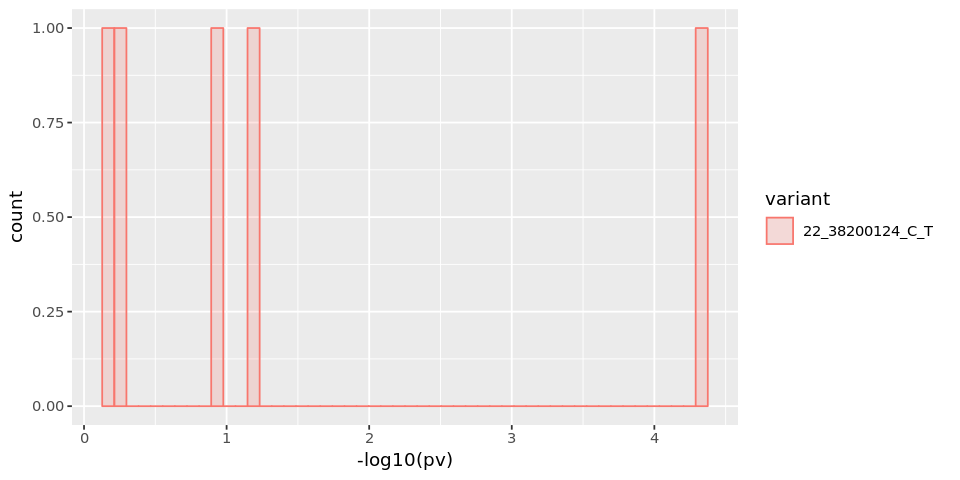

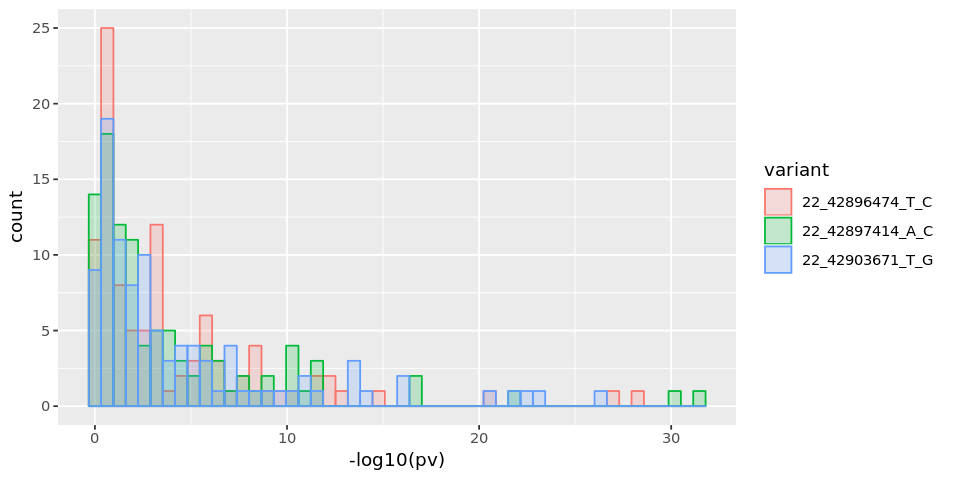

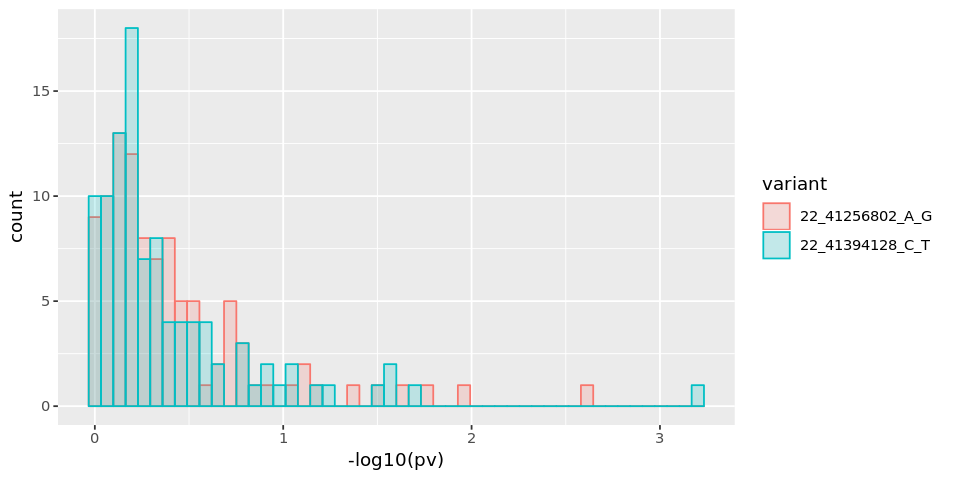

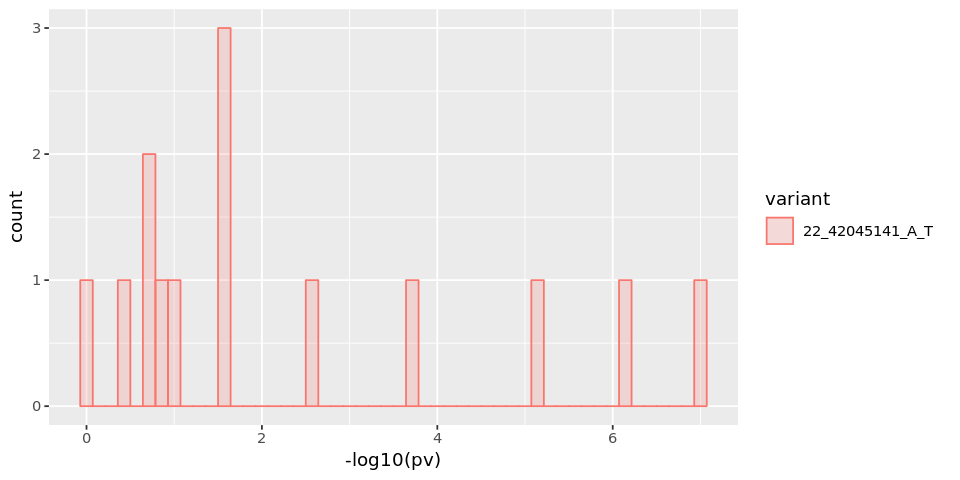

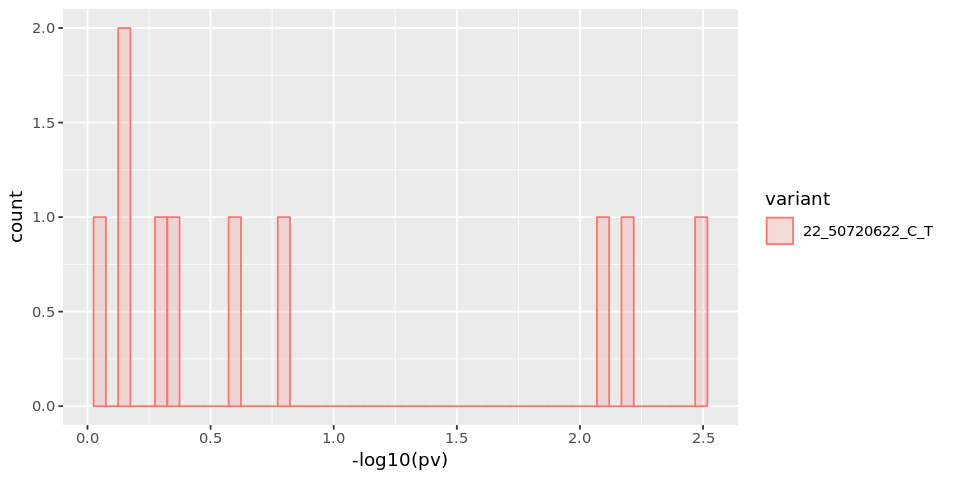

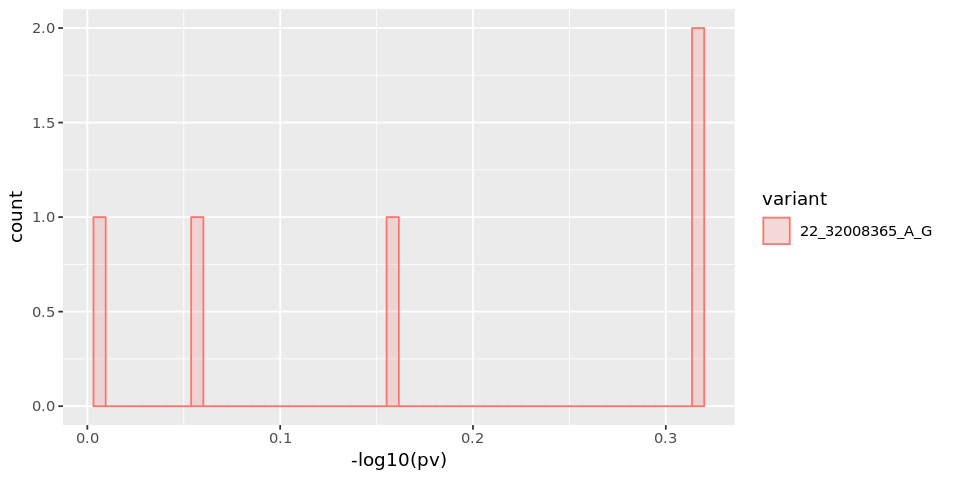

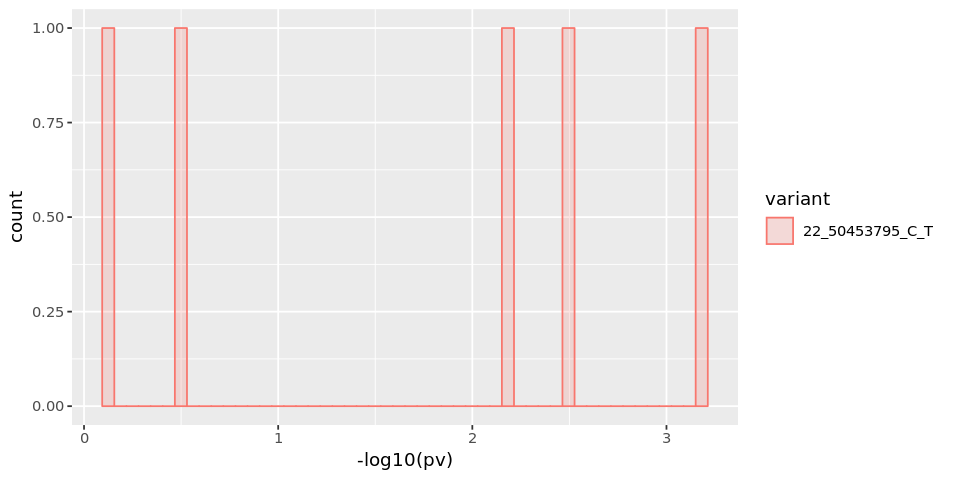

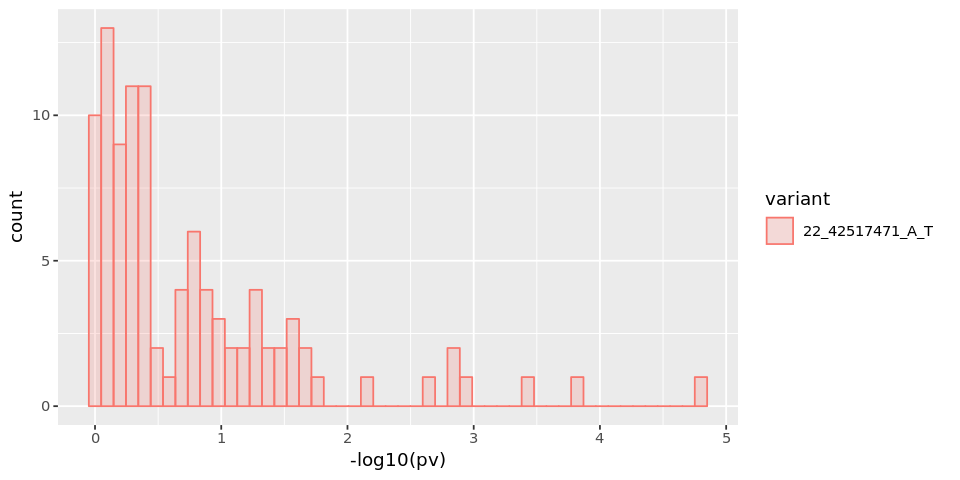

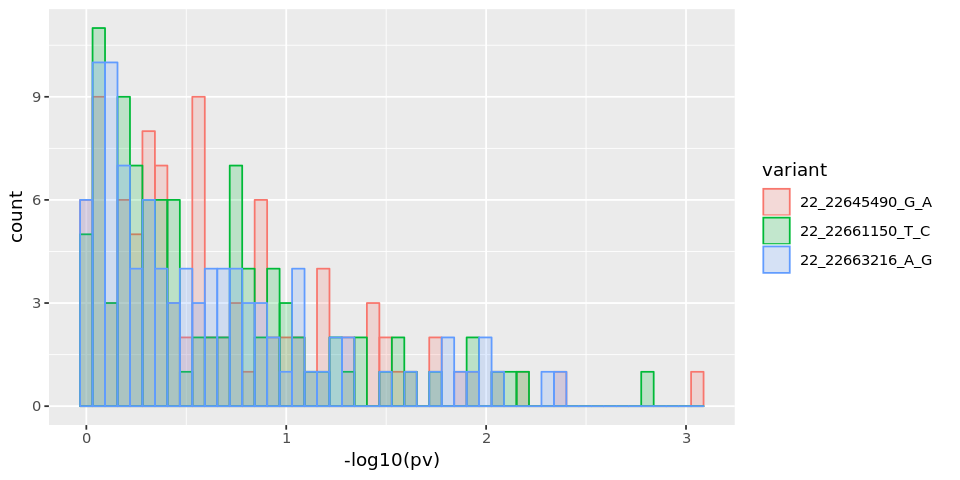

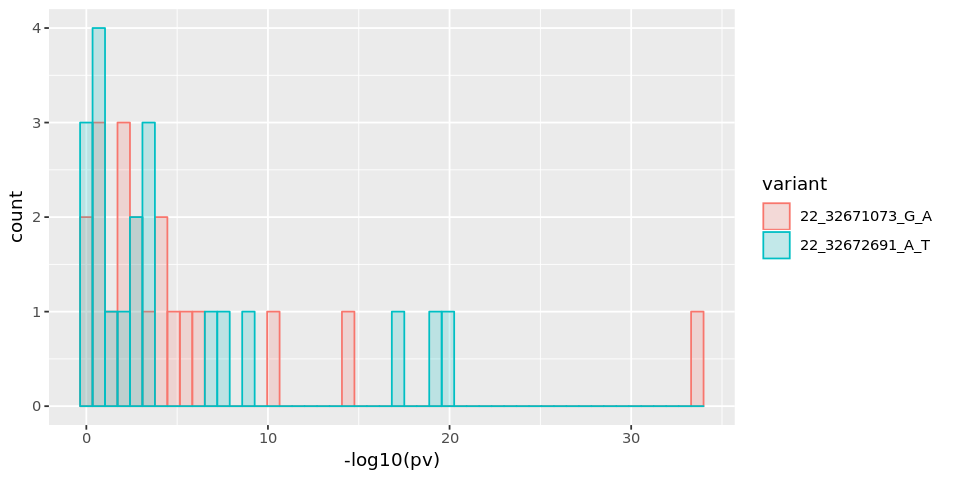

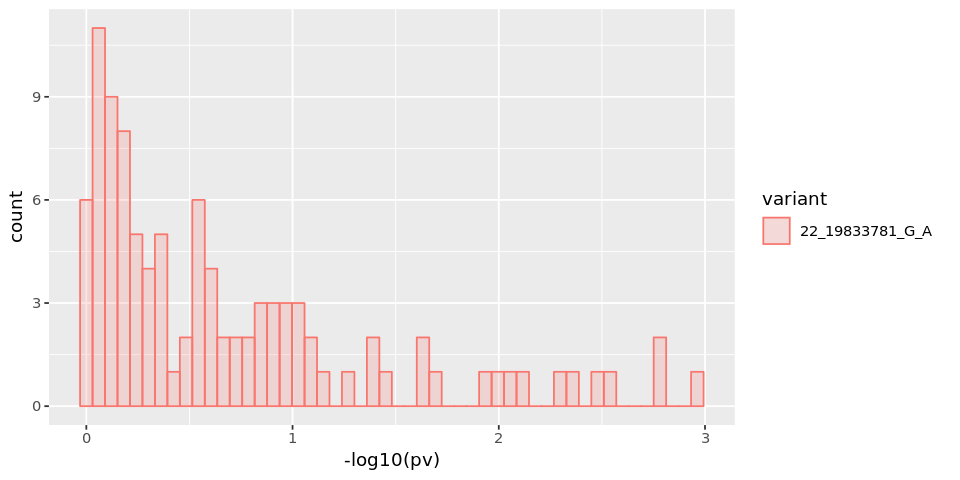

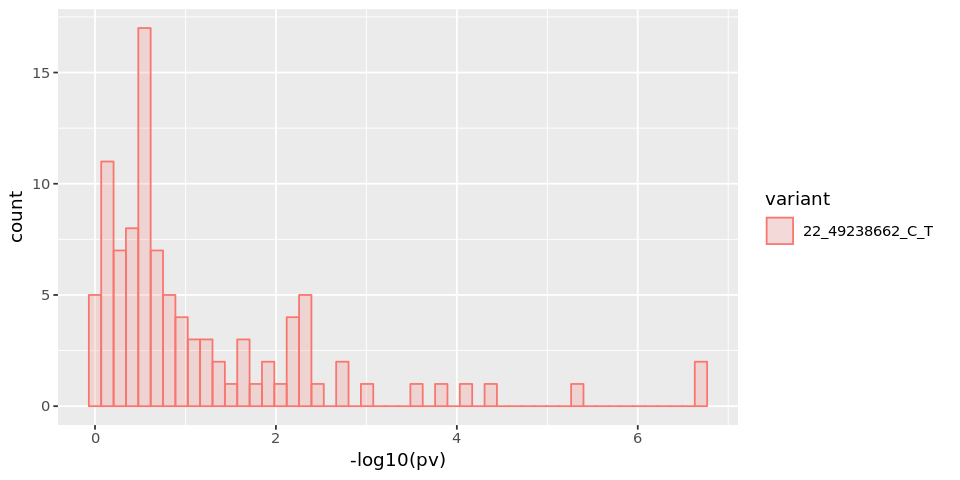

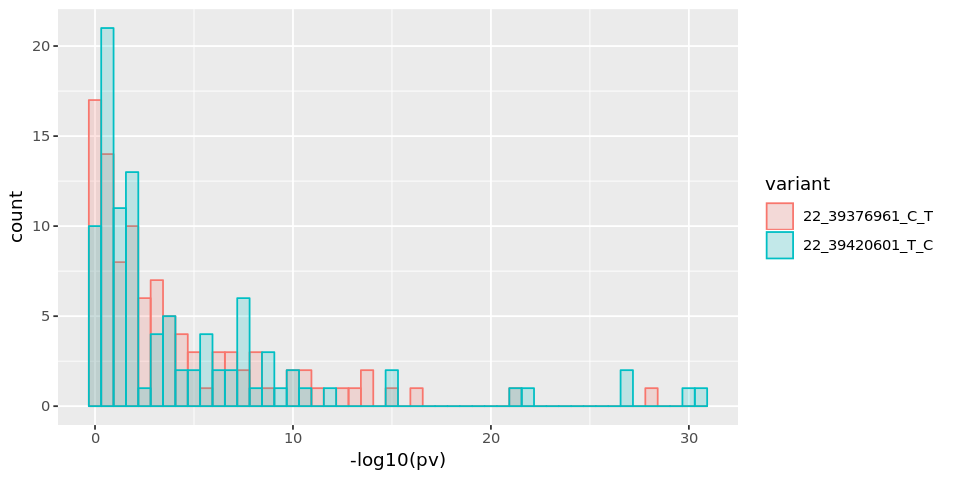

In [167]:
cols = c("firebrick","forestgreen","cornflowerblue")
for (gene in unique(df$gene)){
    df_plot = df[df$gene == gene,]
    df_plot$variant = as.character(df_plot$variant)
    nsnps = length(unique(df_plot$variant))
    p = ggplot(df_plot, aes(x = -log10(pv))) 
    p = p + geom_histogram(aes(color = variant, fill = variant), alpha = 0.2, position = "identity", bins = 50)
    print(p)
#     for (i in 1:nsnps){
#         p_real = df0[df0$gene == gene & df0$variant == unique(df_plot$variant)[i],"pv_raw"]
#         p = p + geom_point(aes(x = -log10(p_real),y = 0), col = cols[i], alpha = 0.5, pch = 23, size = 3)
#         print(p)
#     }
}

In [107]:
##############################
##############################
##############################
##############################

In [113]:
filename = "/hps/nobackup/stegle/users/acuomo/all_scripts/struct_LMM2/sc_endodiff/interaction_test/MOFA/new/1mofa_factor_endo_eqtl/summary_endo_eqtl.csv"
df0 = read.csv(filename, row.names = 1)
df0$variant = df0$snpID
head(df0)

gene                    n_snps pv_raw       snpID           pv          
0 ENSG00000189306_RRP7A   3      3.928081e-09 22_42896474_T_C 1.178424e-08
1 ENSG00000189306_RRP7A   3      7.479951e-11 22_42897414_A_C 2.243985e-10
2 ENSG00000189306_RRP7A   3      2.721076e-16 22_42903671_T_G 8.163229e-16
3 ENSG00000196236_XPNPEP3 2      3.169915e-06 22_41256802_A_G 6.339831e-06
4 ENSG00000196236_XPNPEP3 2      7.020923e-05 22_41394128_C_T 1.404185e-04
5 ENSG00000185651_UBE2L3  1      2.179310e-03 22_22077719_C_T 2.179310e-03
  pv_adj    variant        
0 0.9864704 22_42896474_T_C
1 0.9864673 22_42897414_A_C
2 0.9864574 22_42903671_T_G
3 0.9864757 22_41256802_A_G
4 0.9864782 22_41394128_C_T
5 0.9864809 22_22077719_C_T

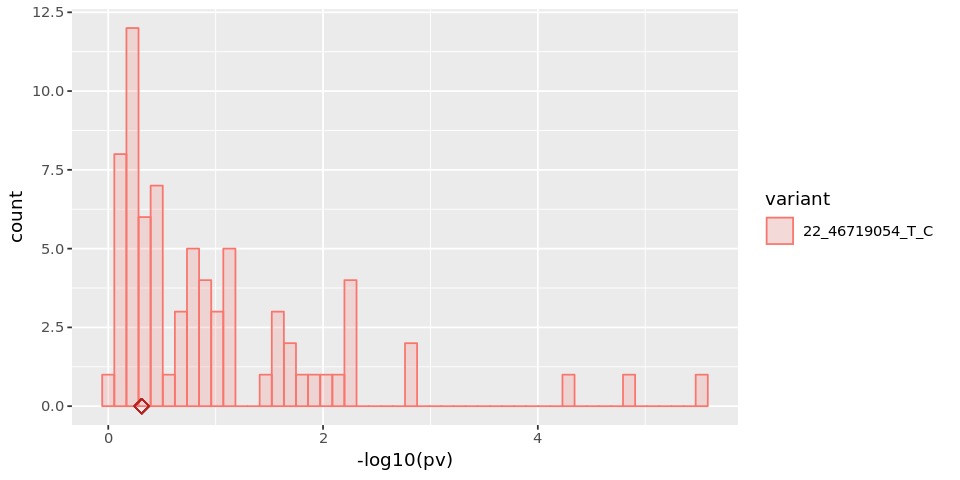

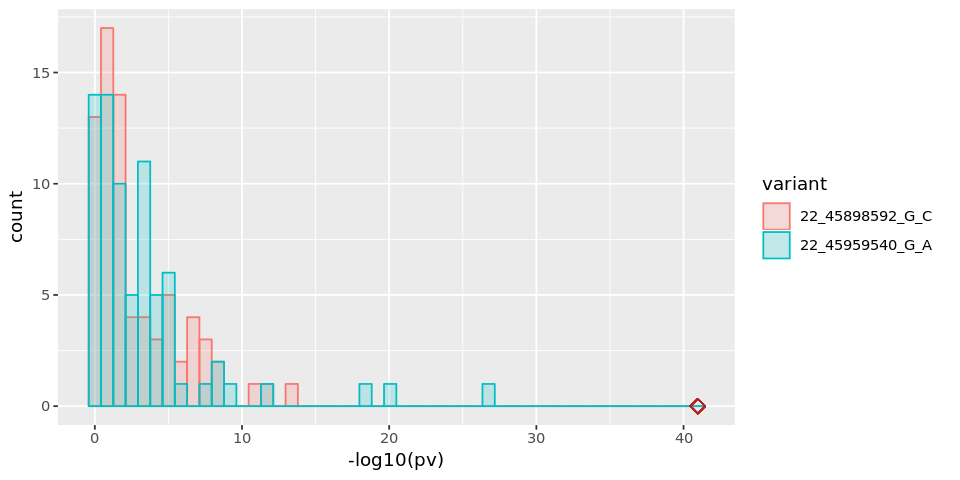

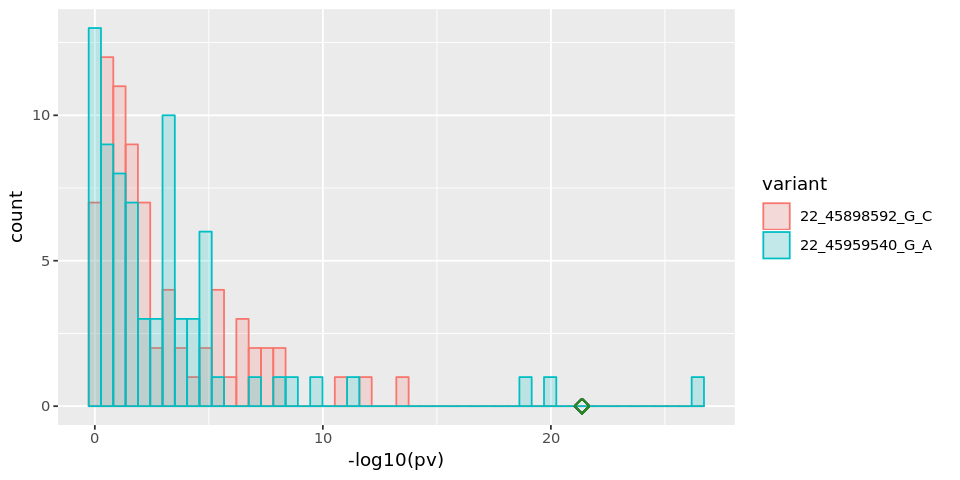

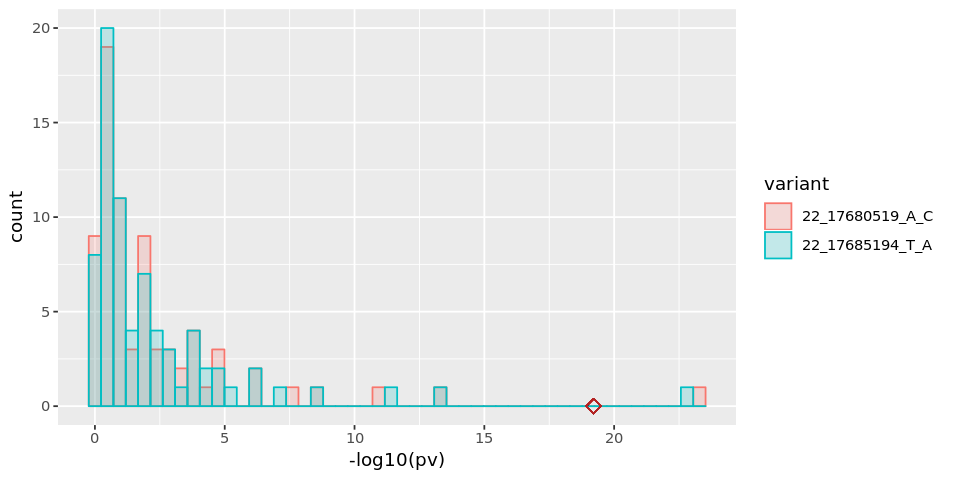

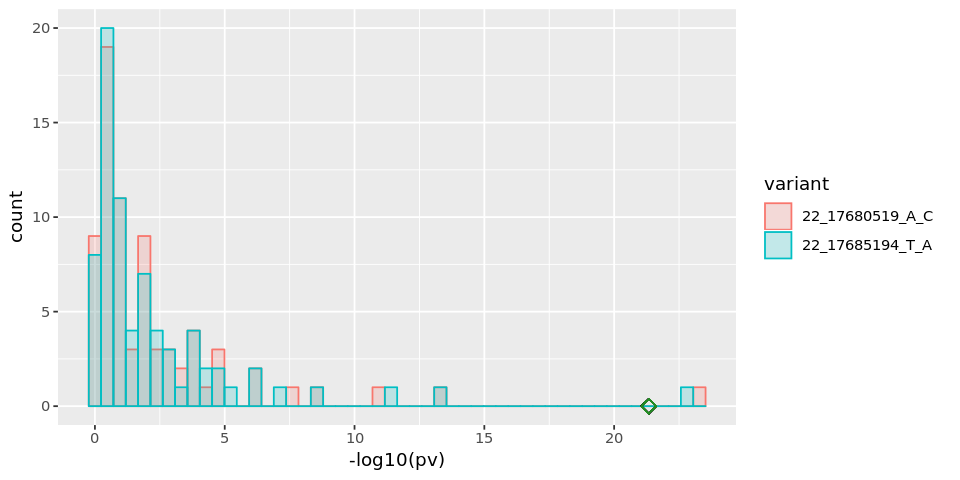

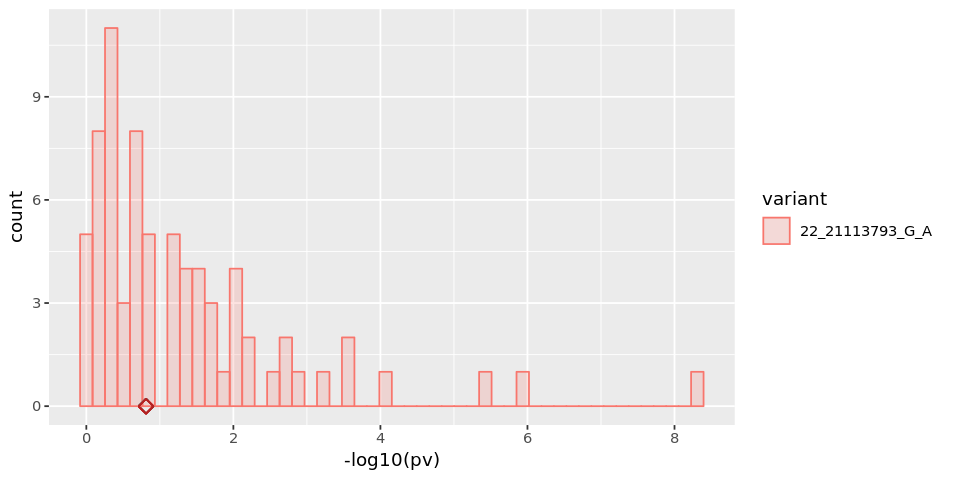

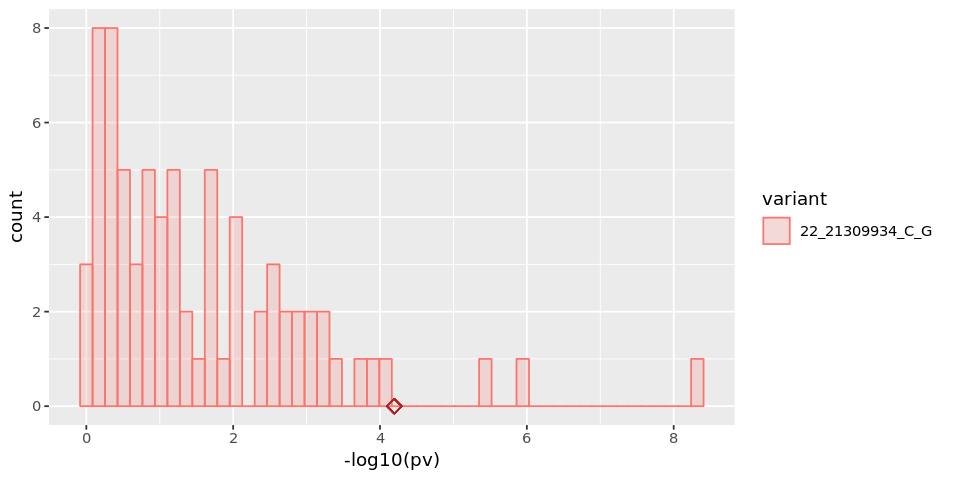

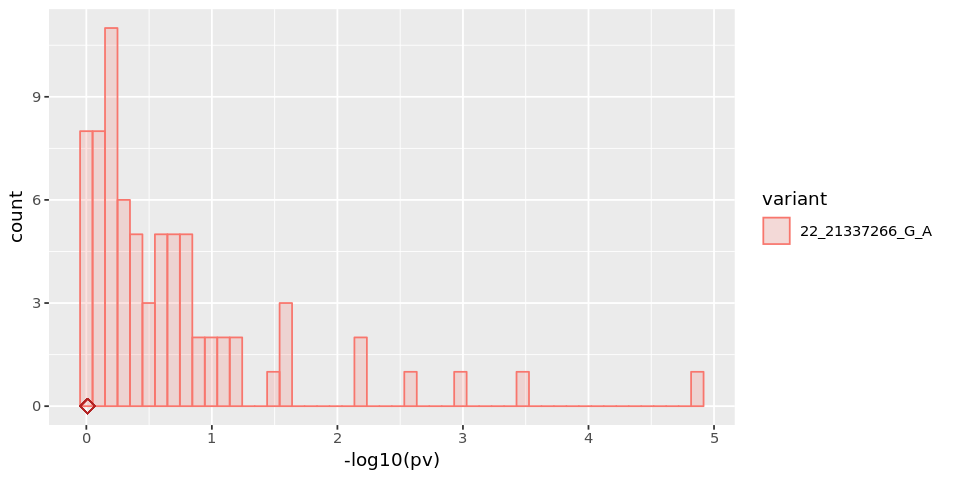

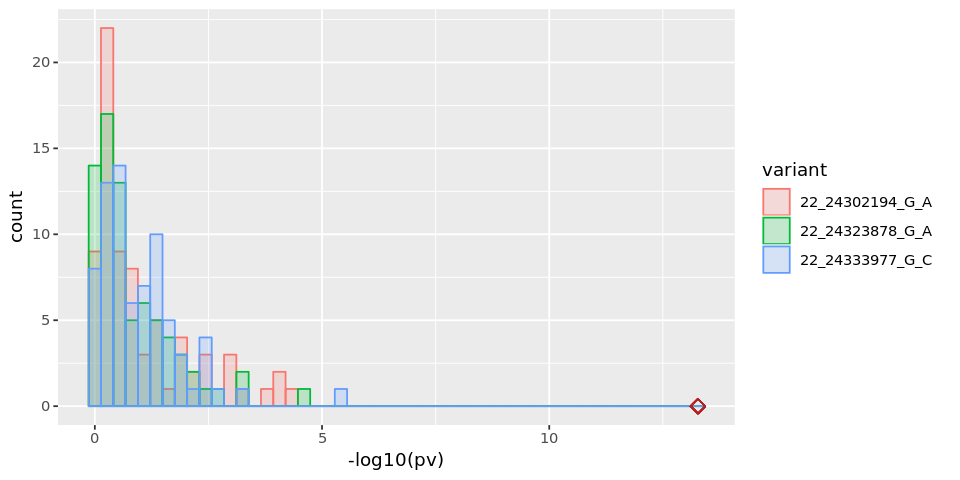

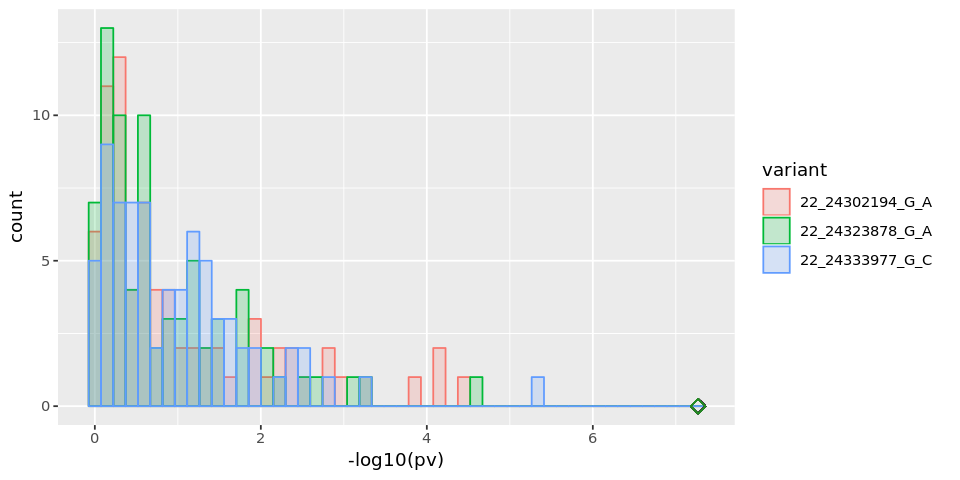

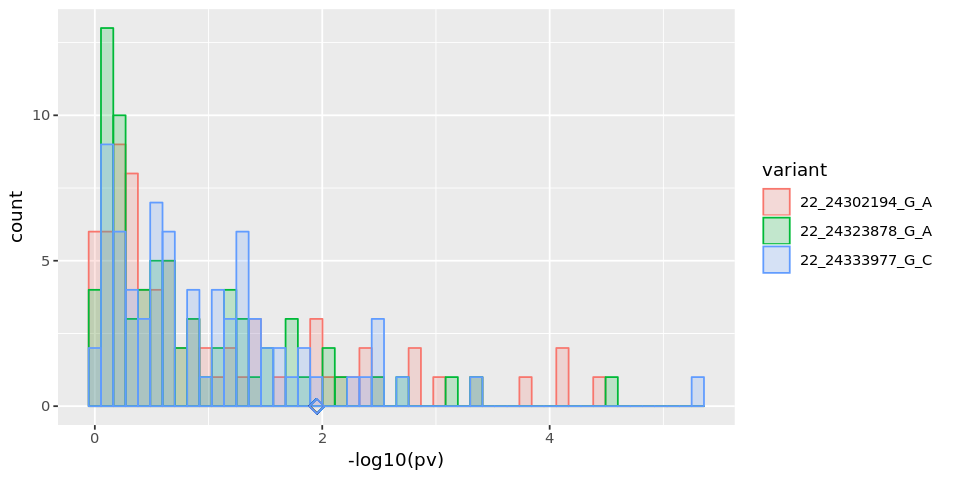

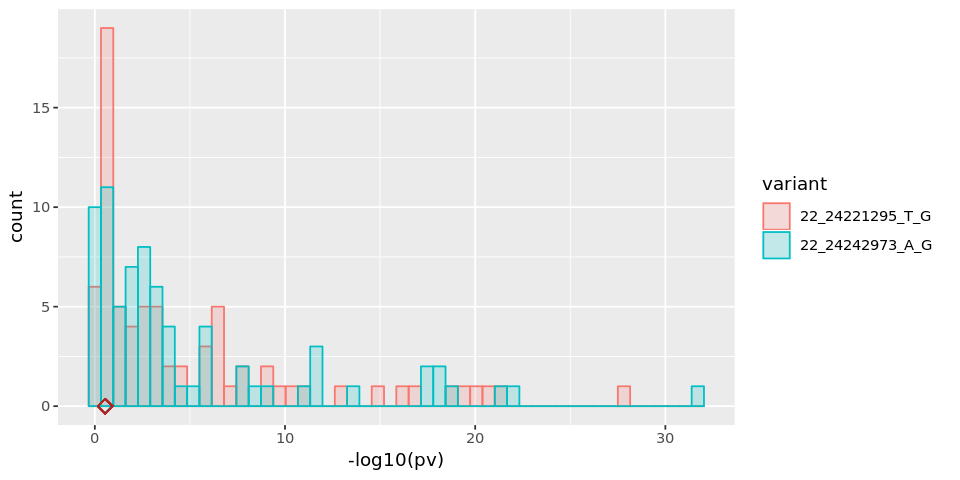

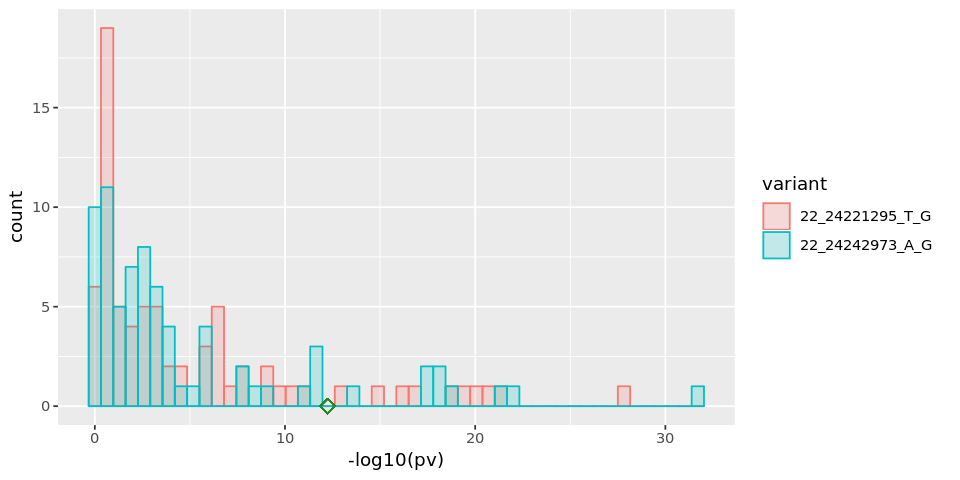

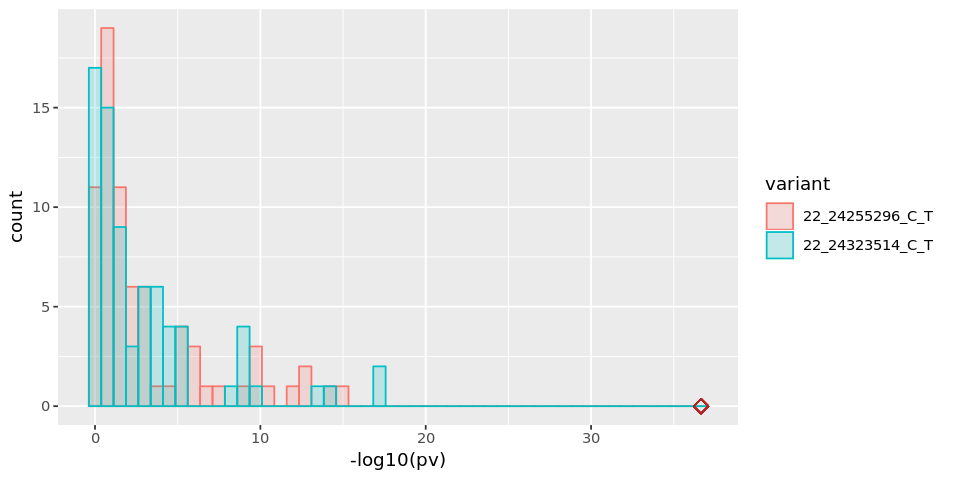

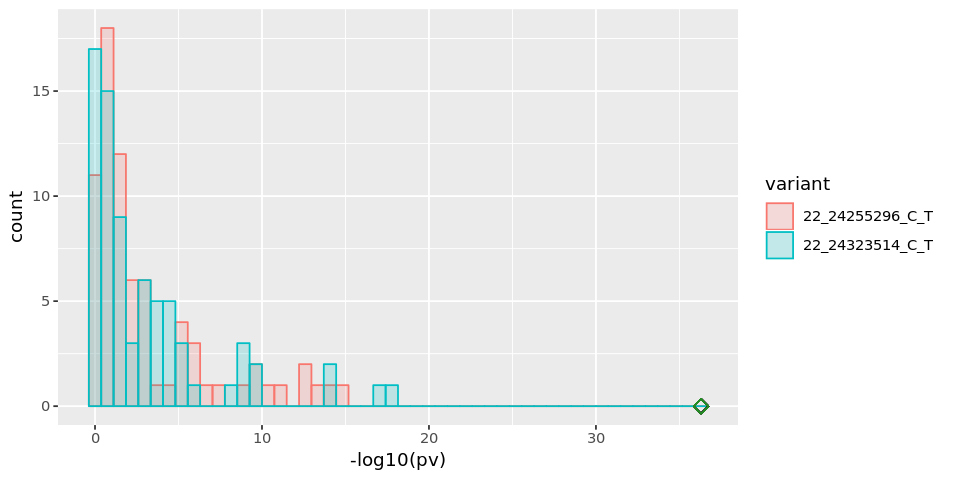

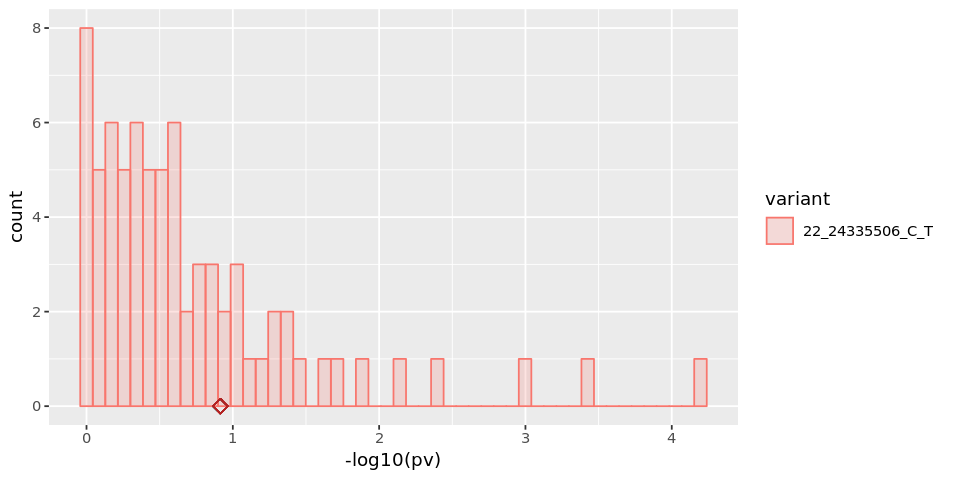

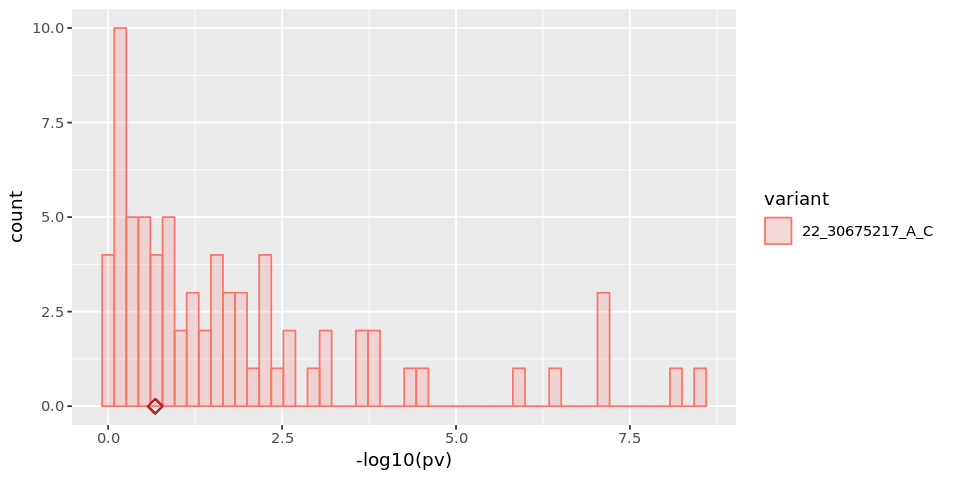

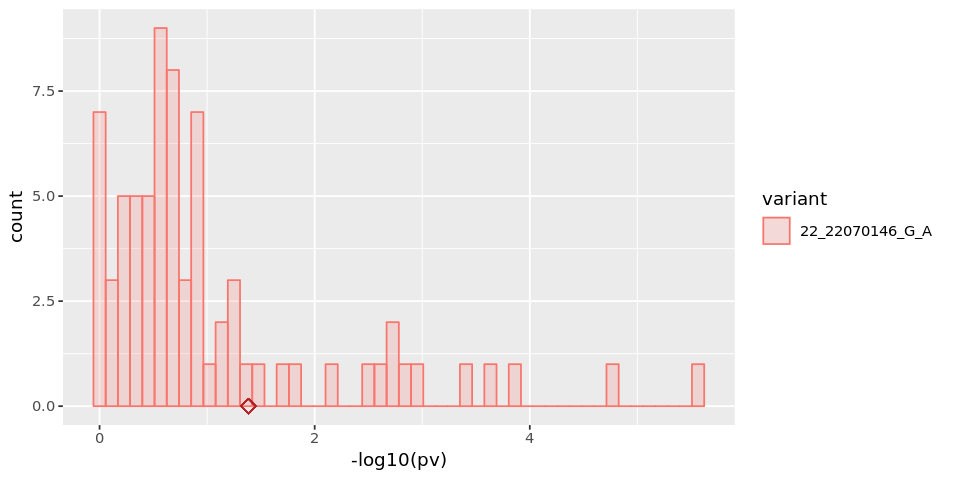

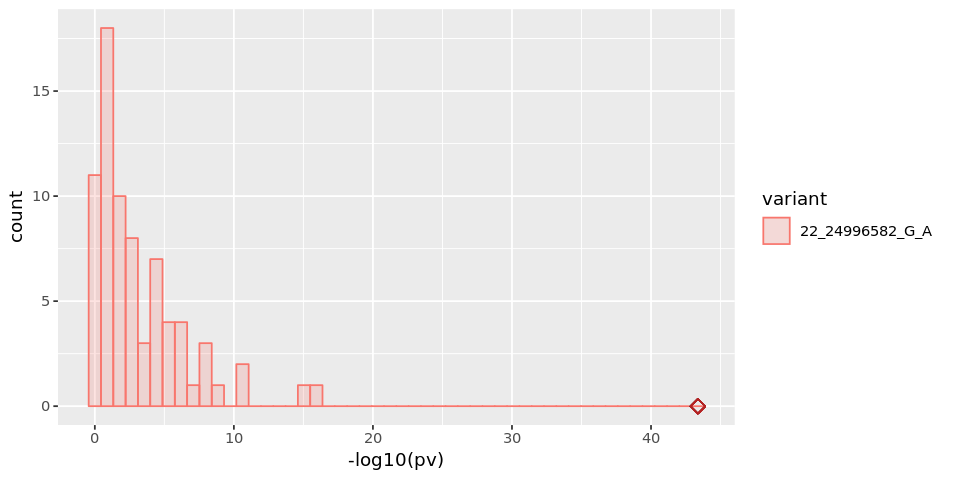

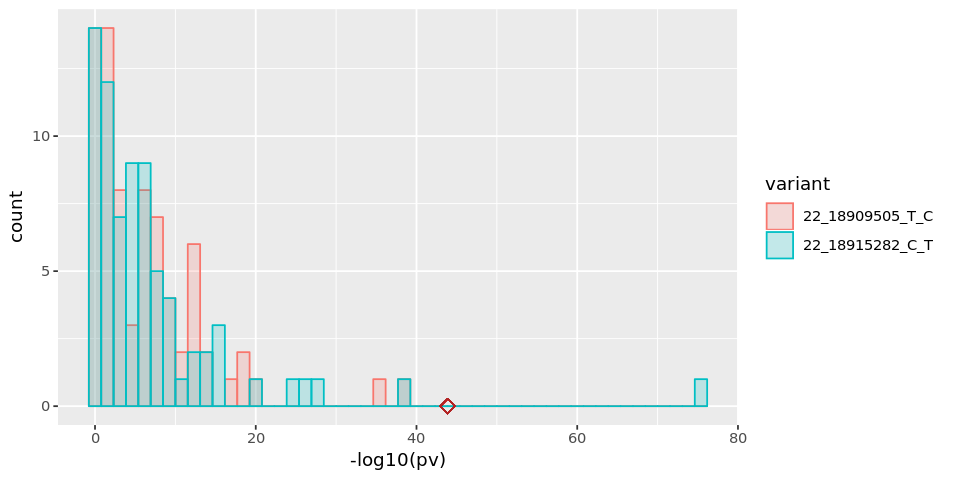

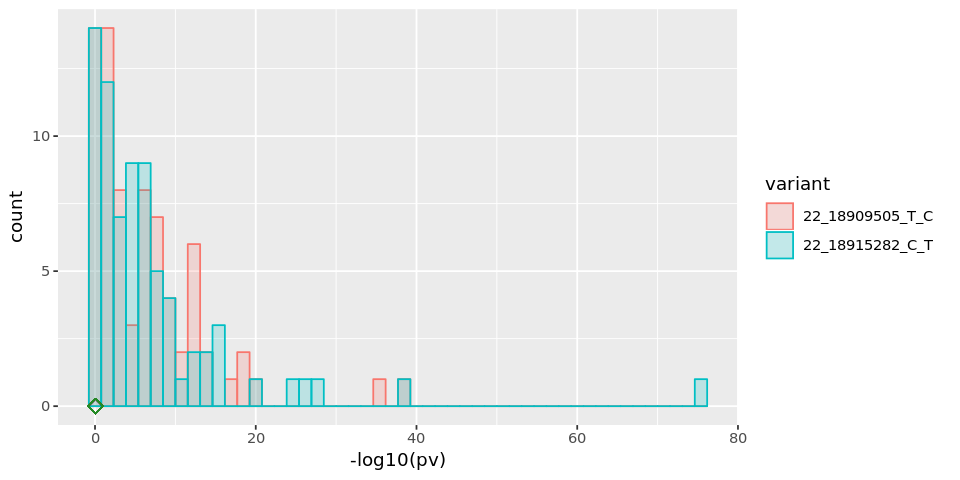

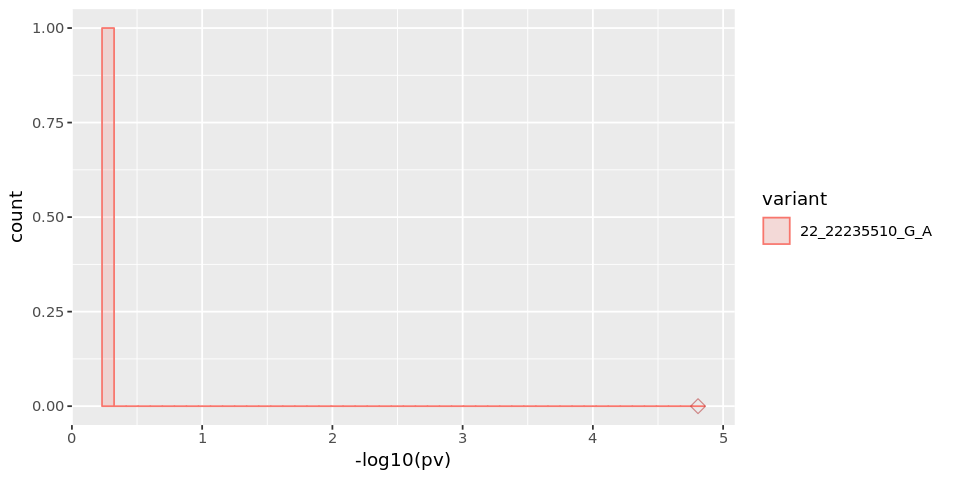

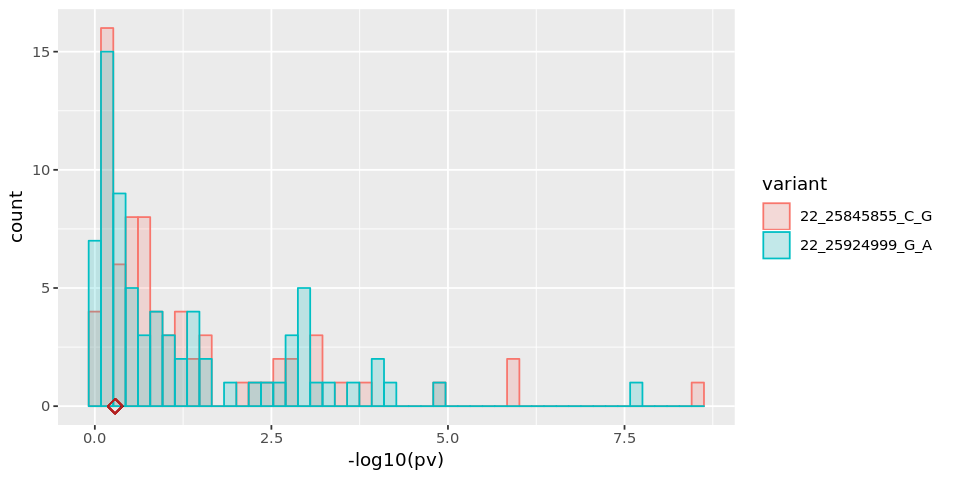

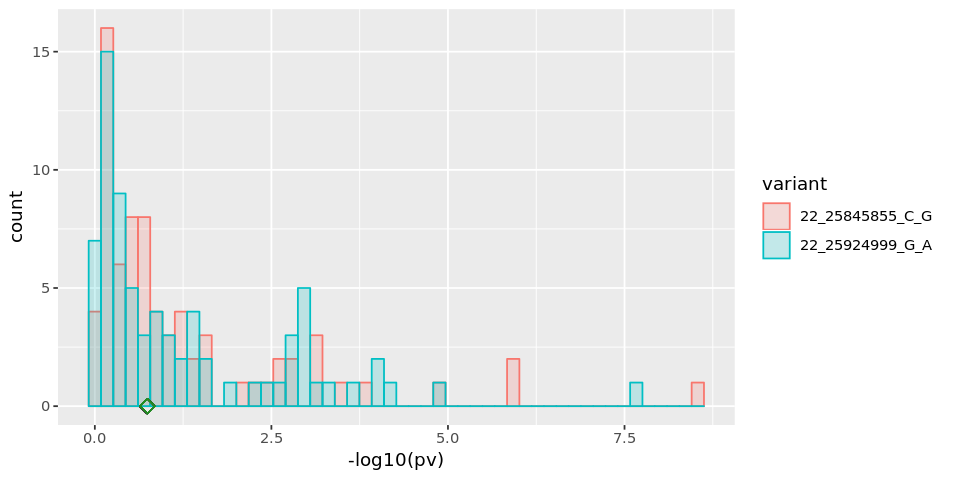

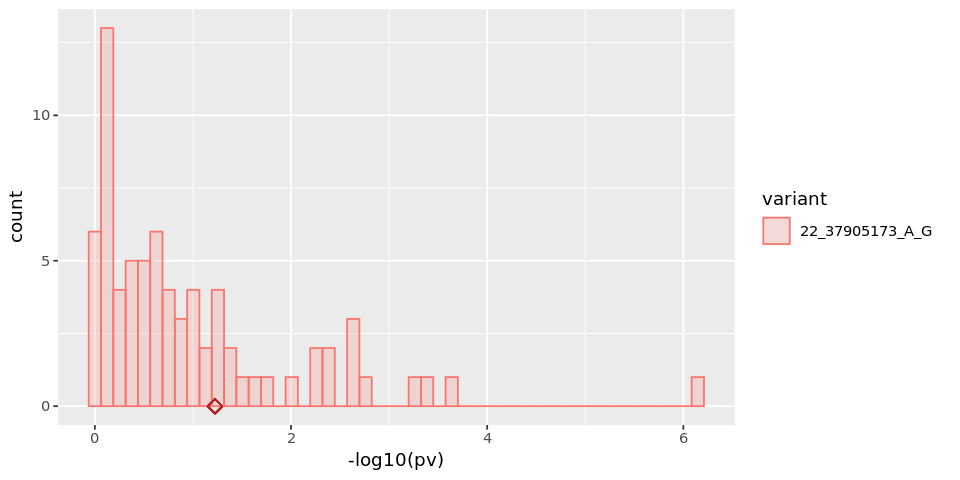

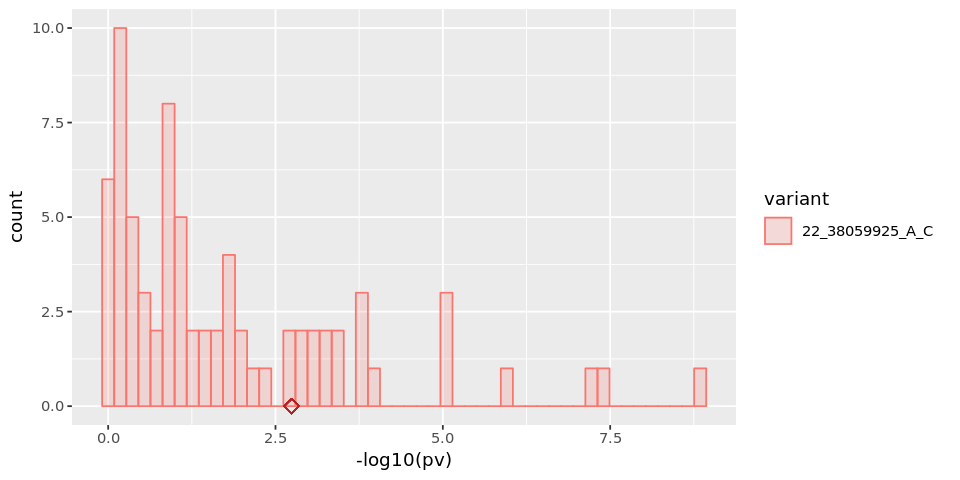

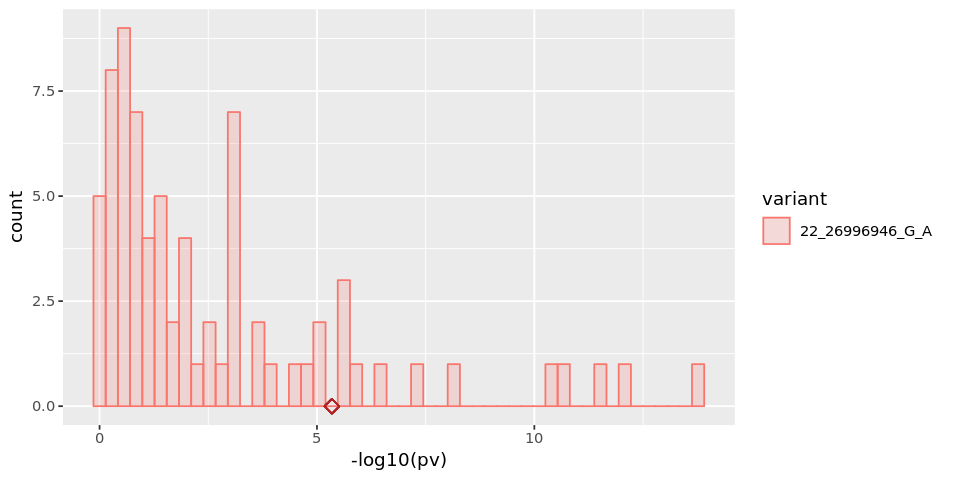

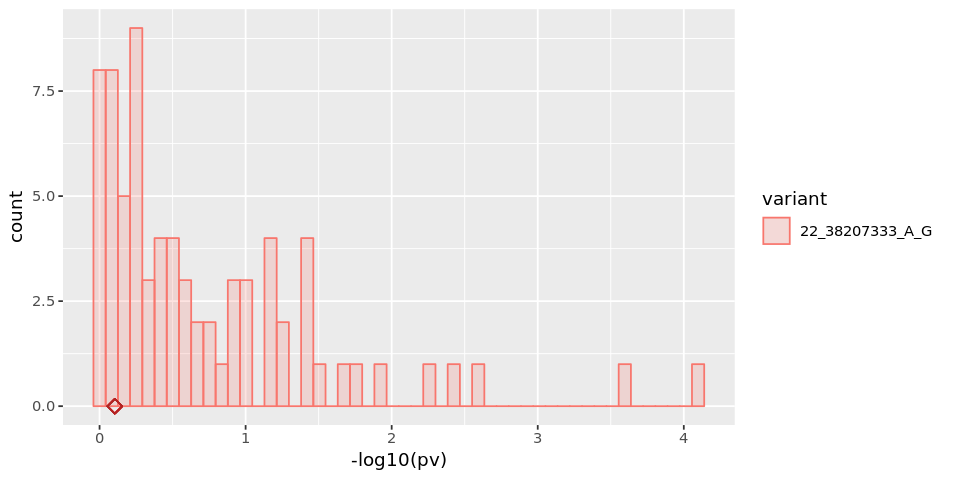

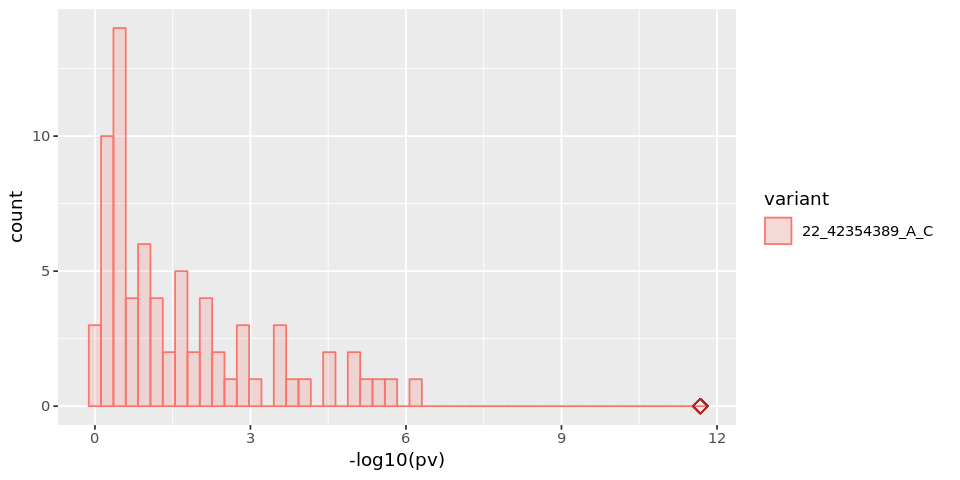

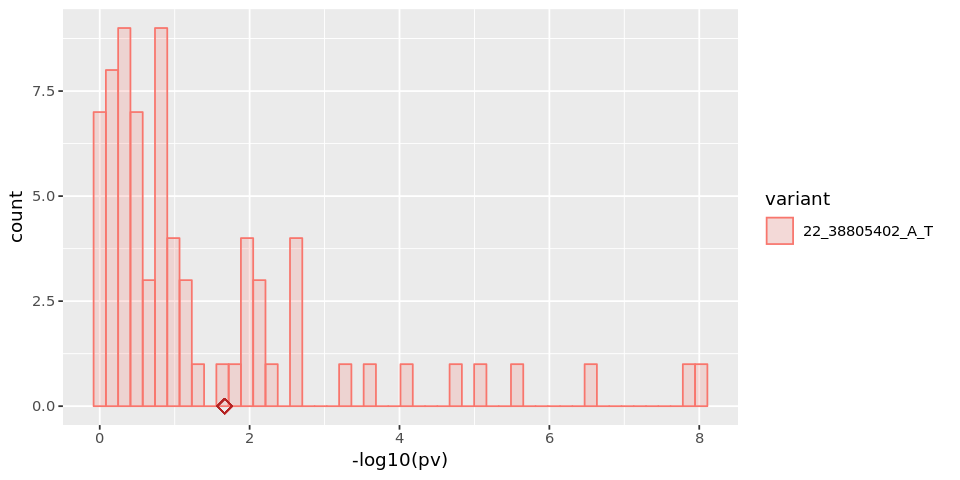

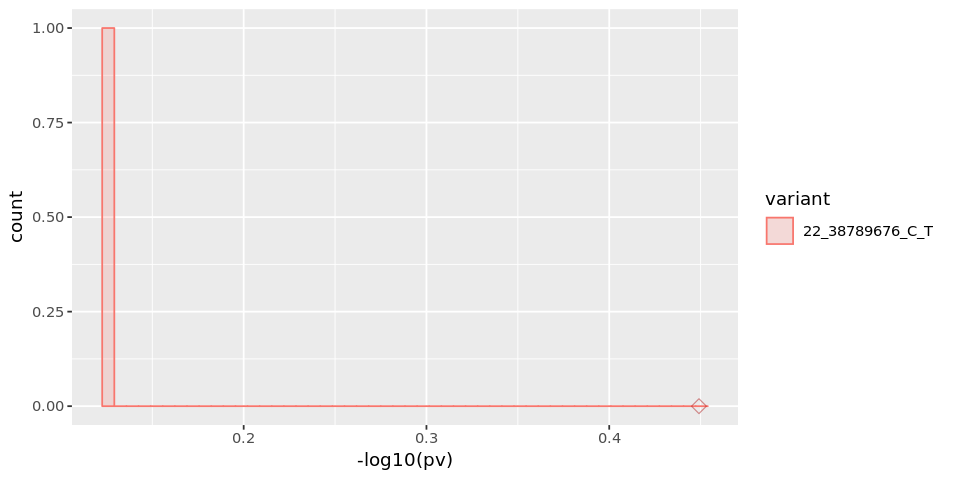

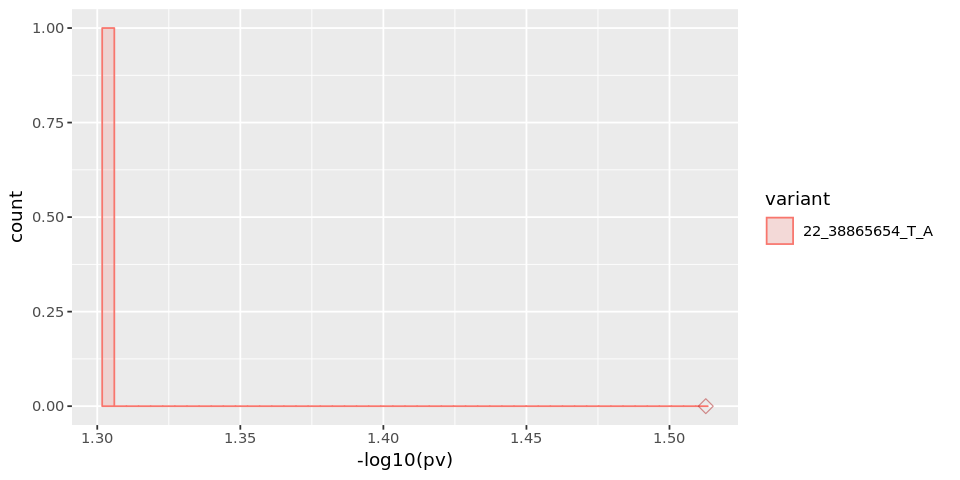

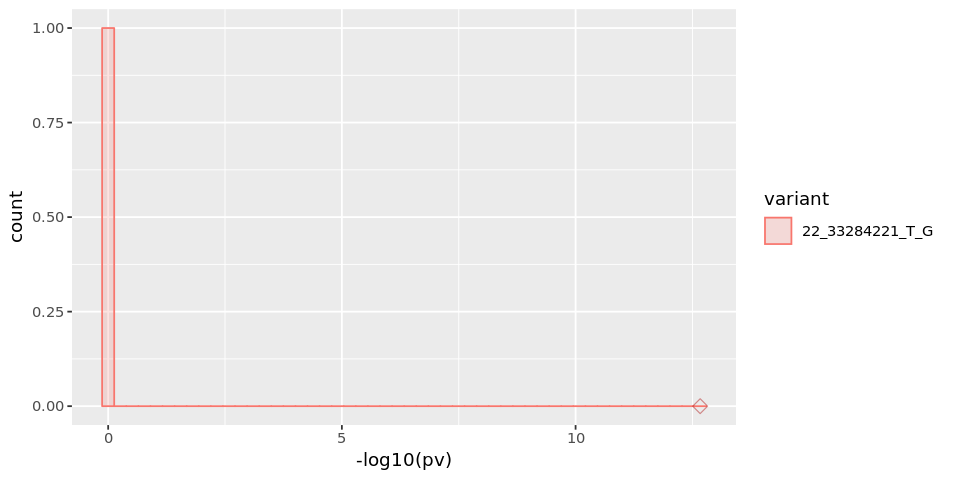

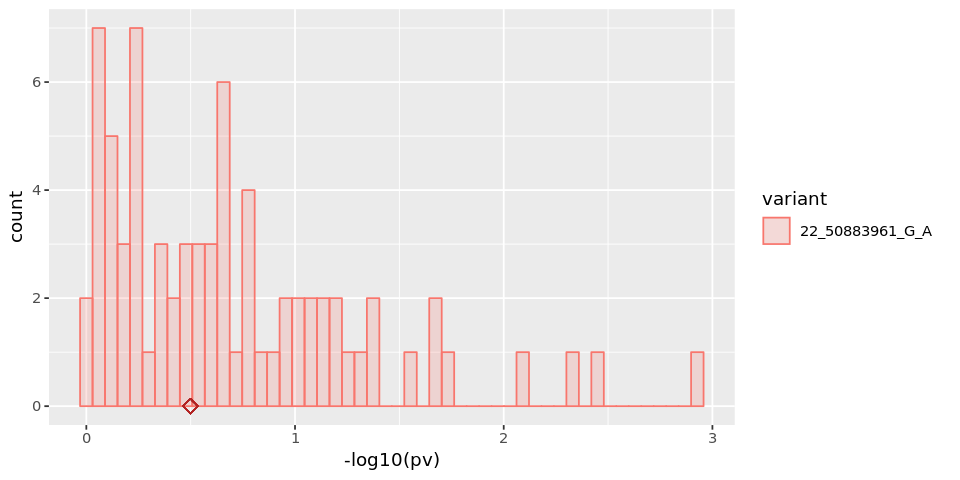

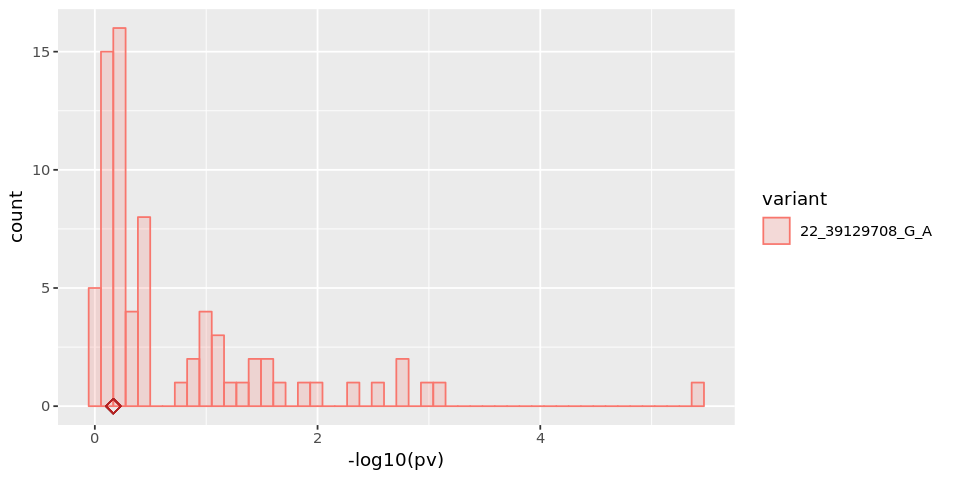

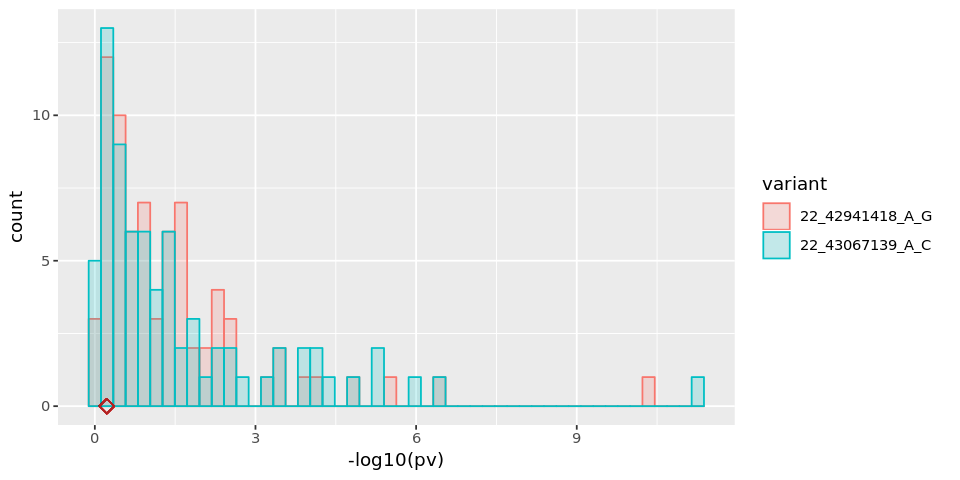

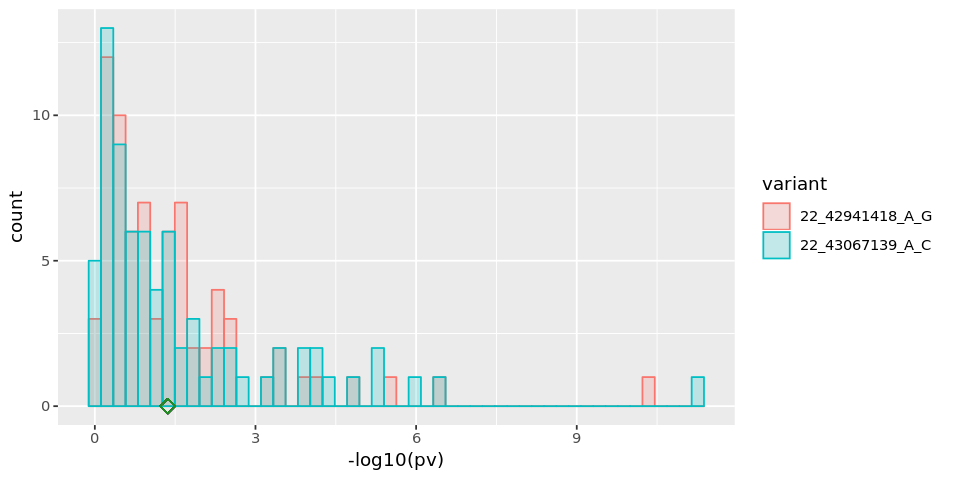

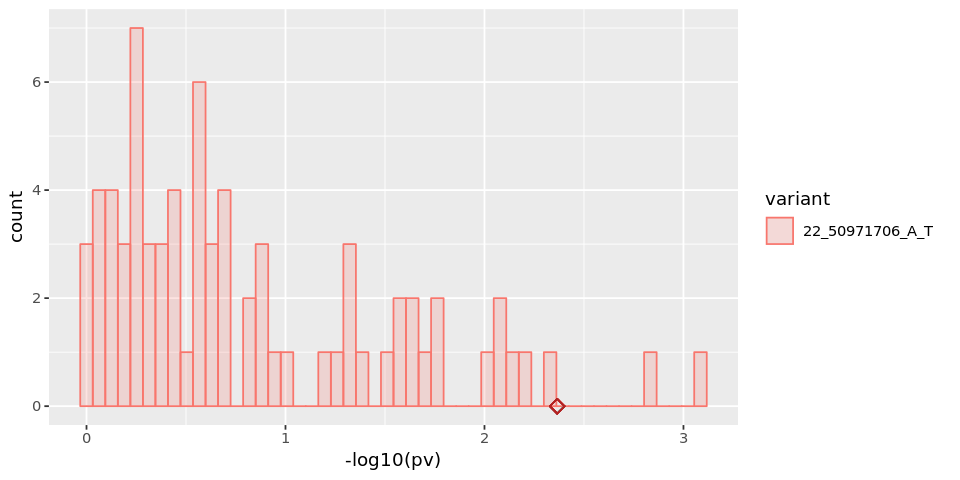

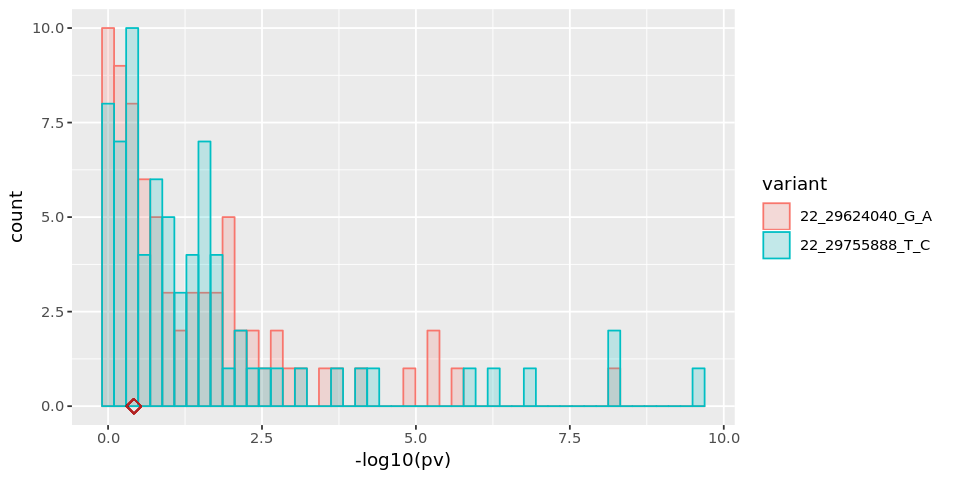

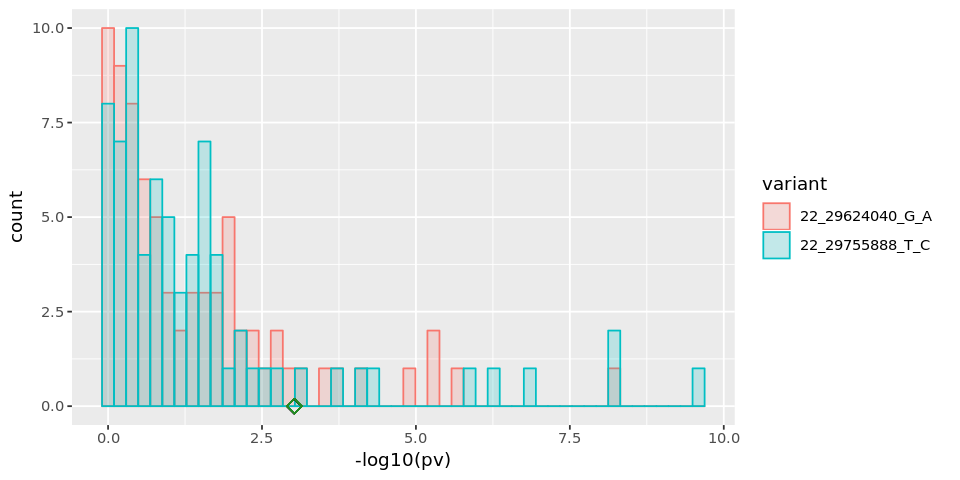

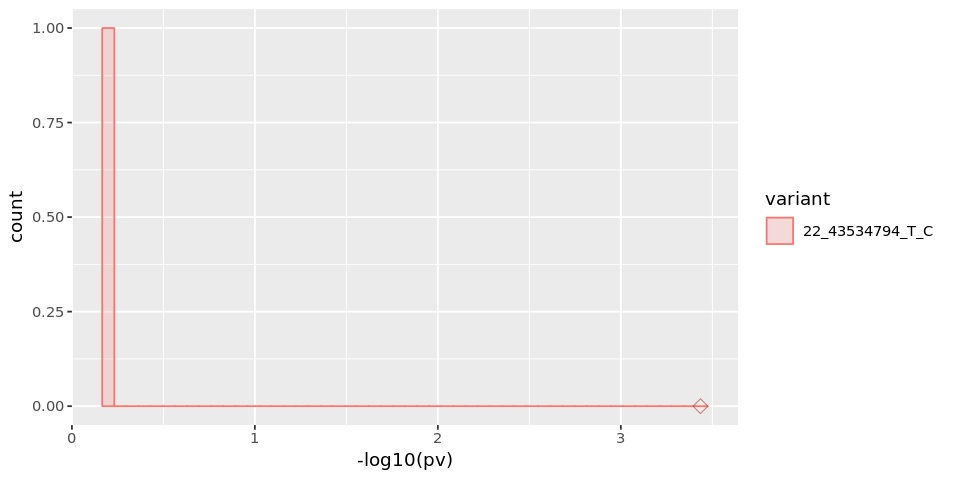

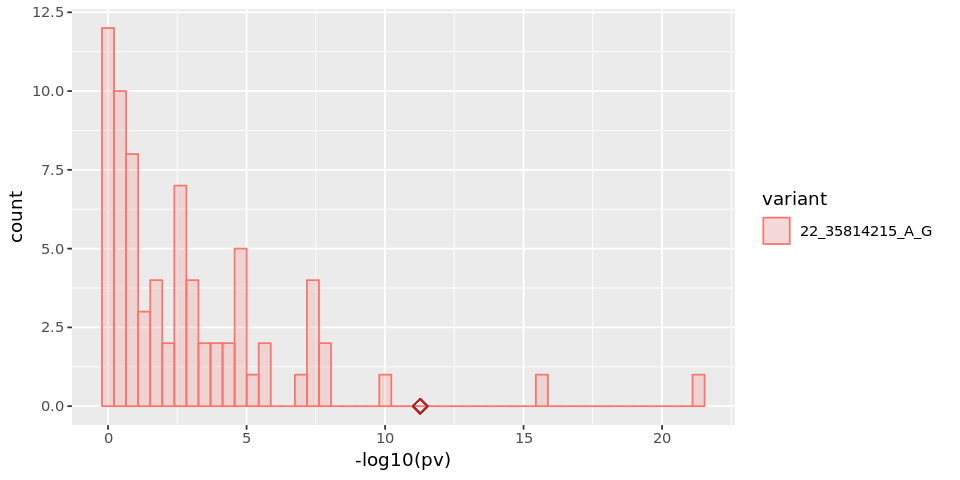

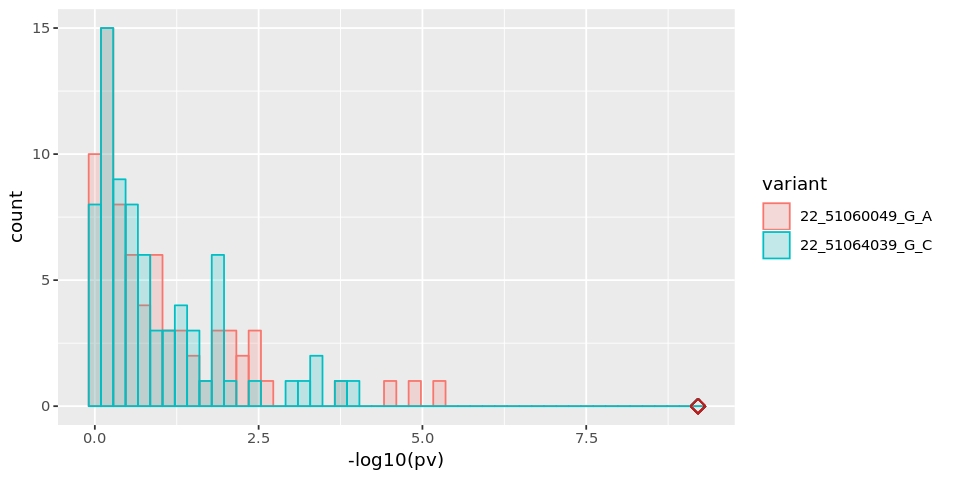

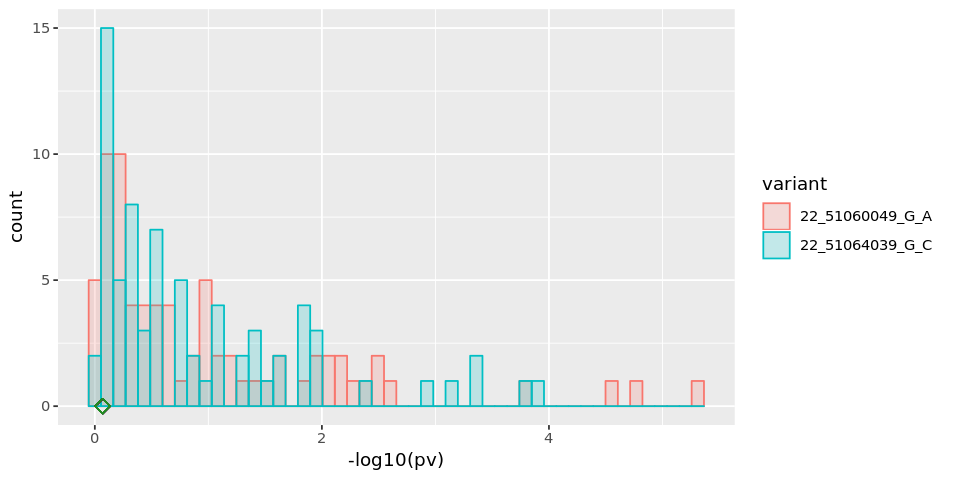

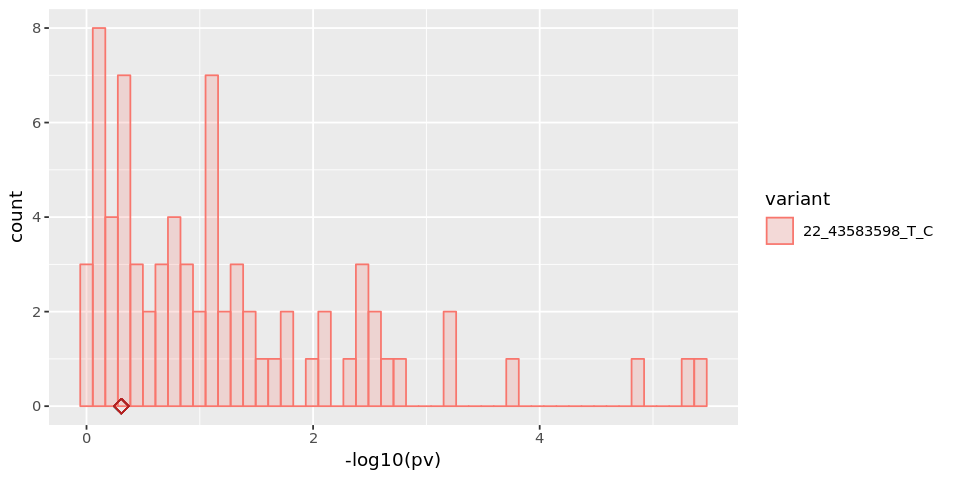

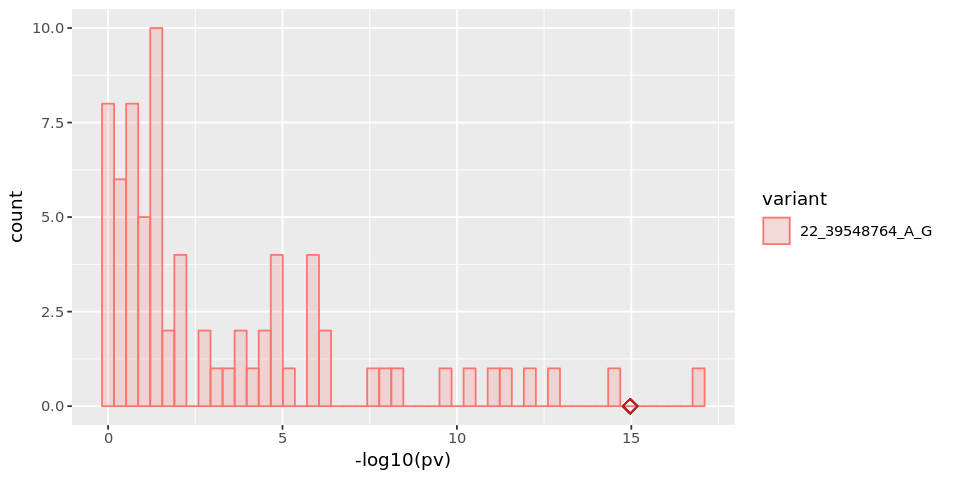

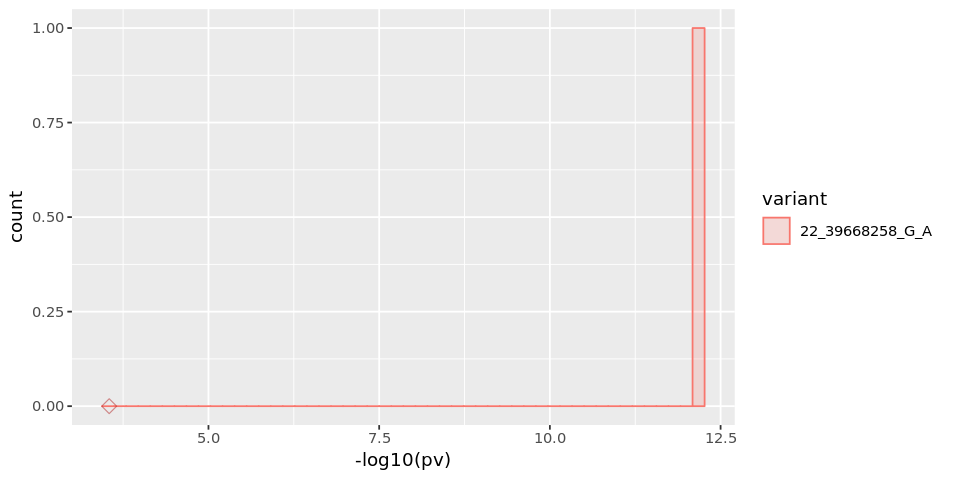

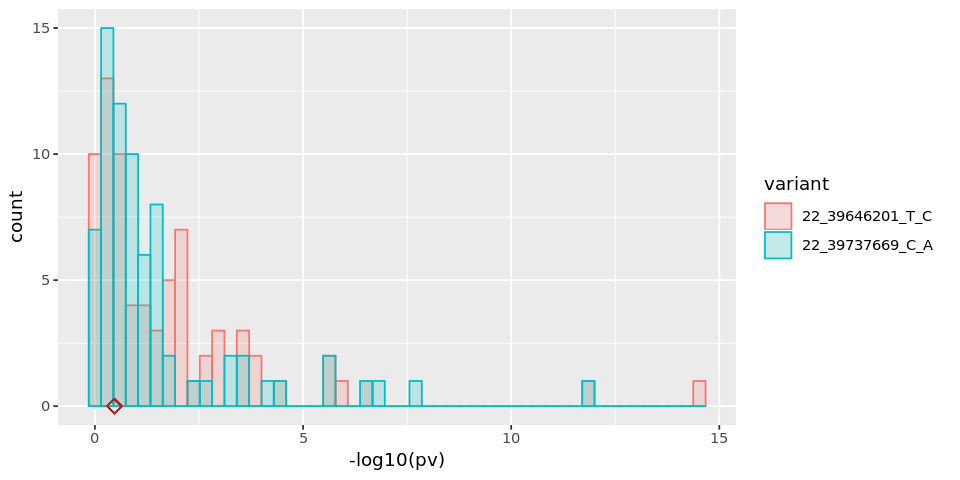

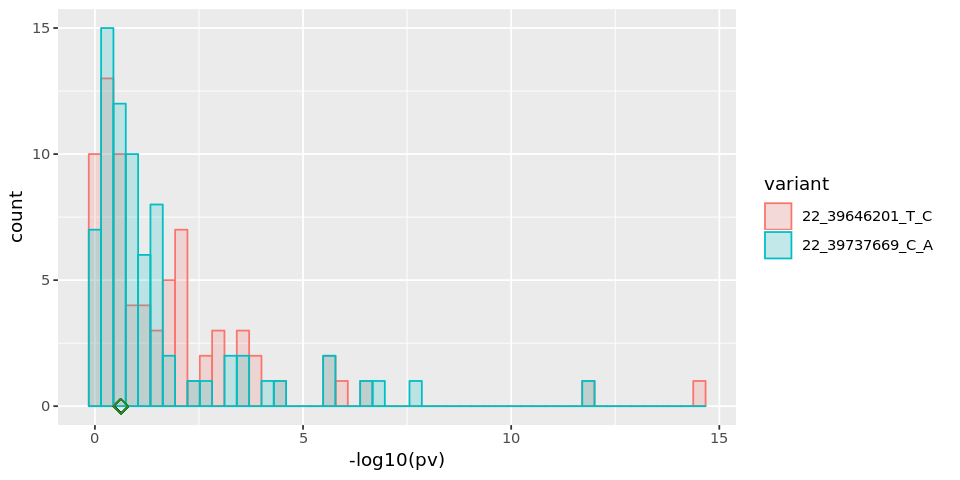

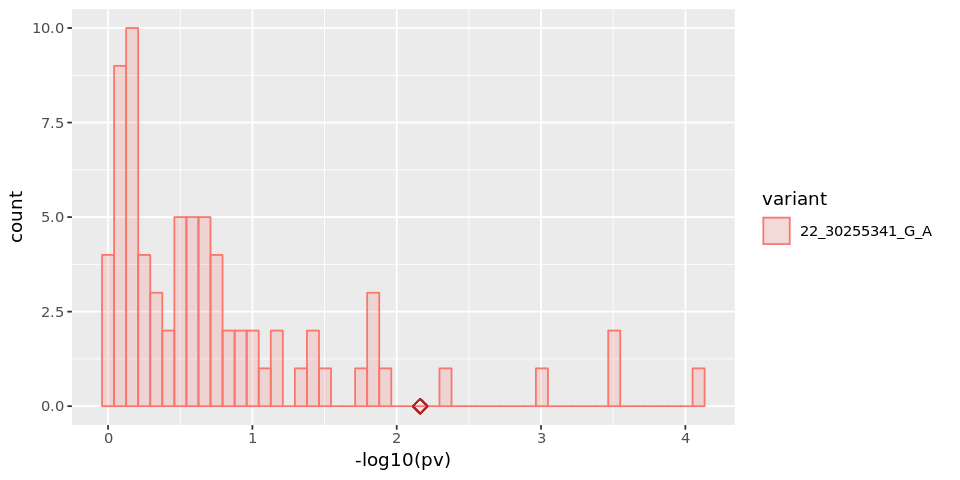

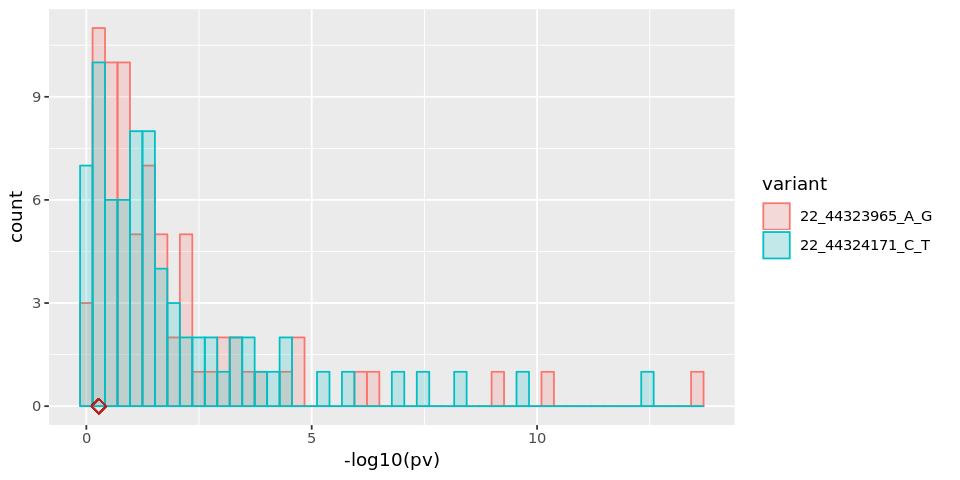

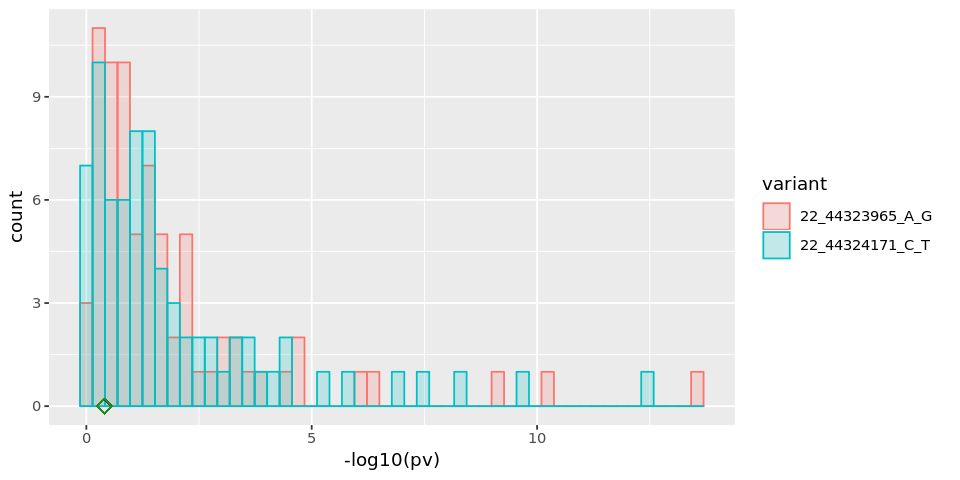

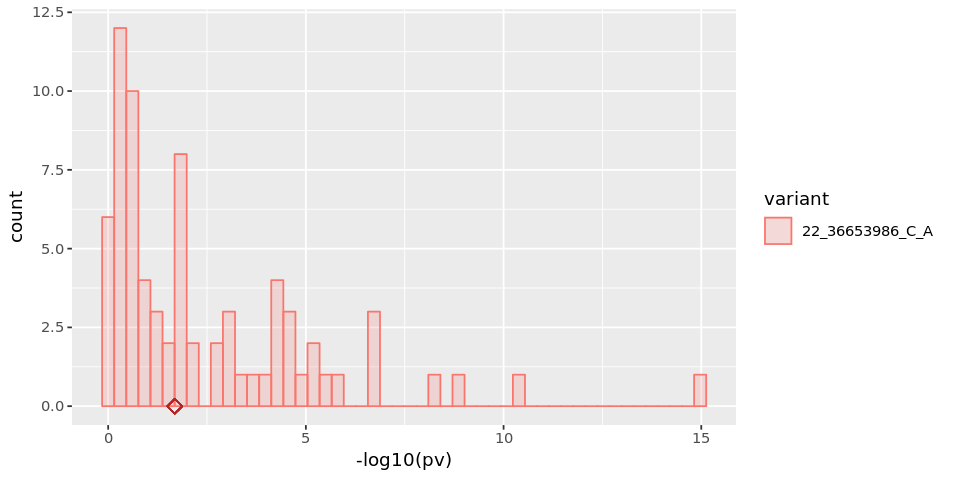

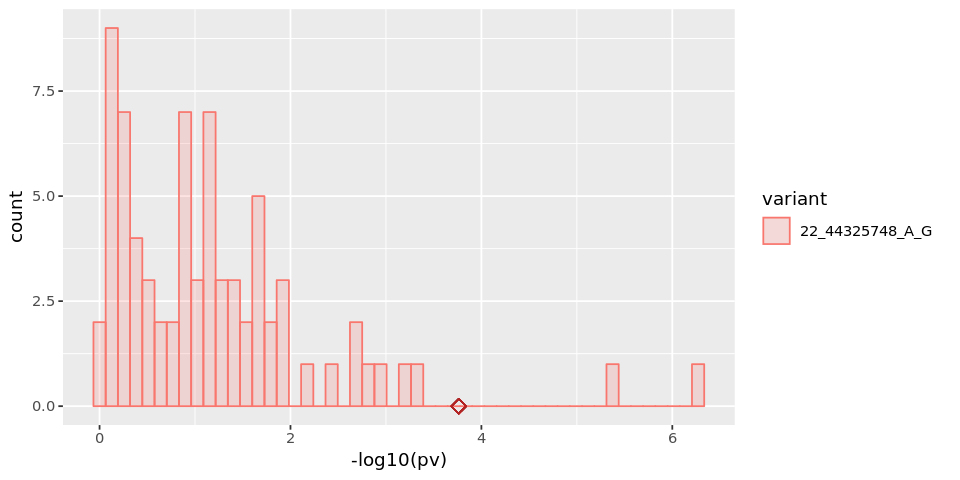

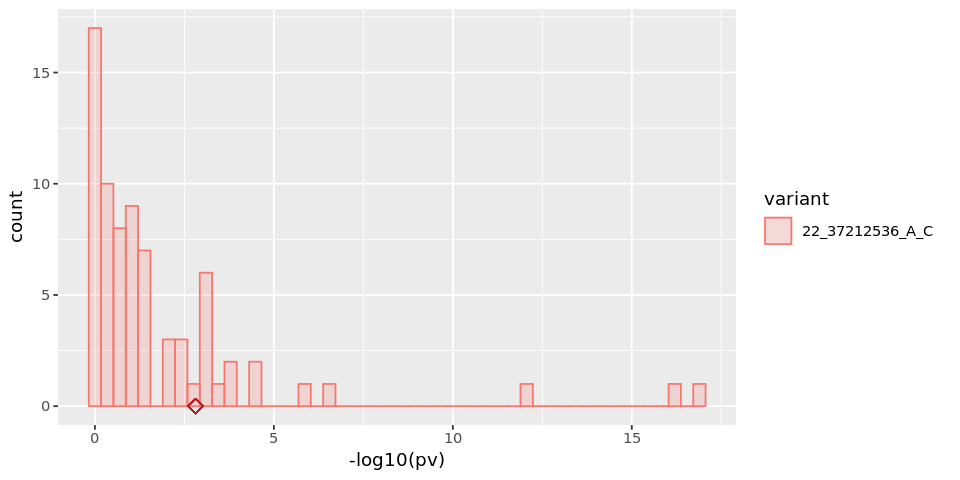

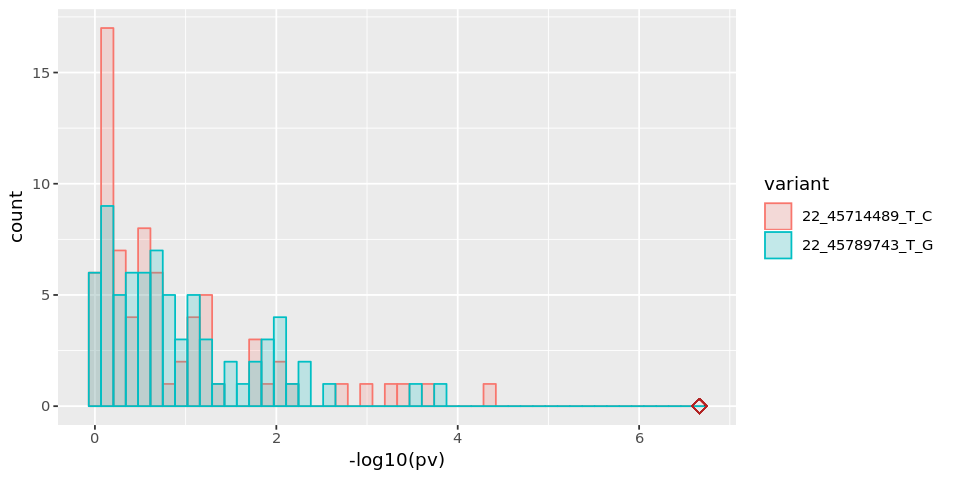

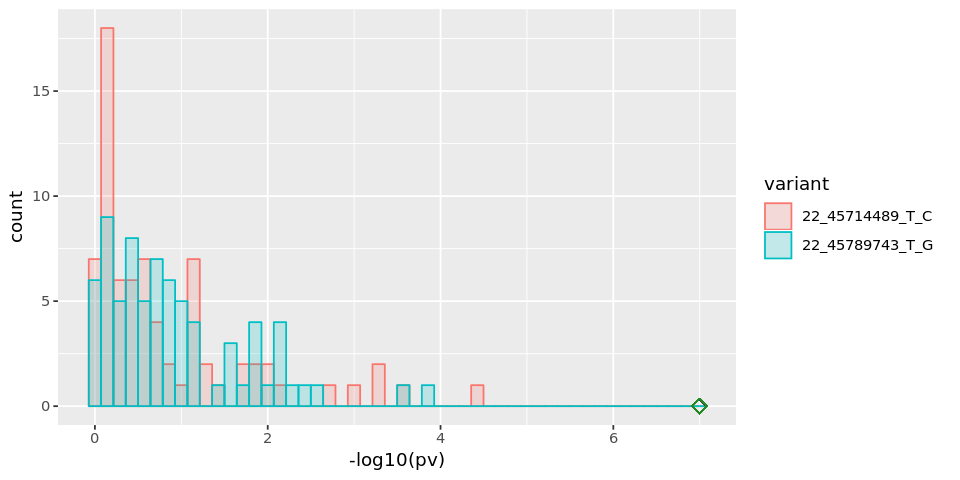

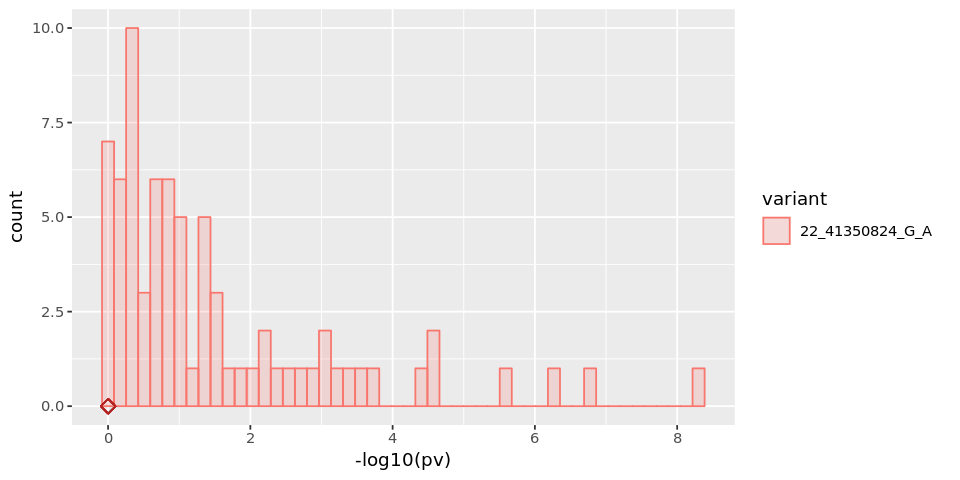

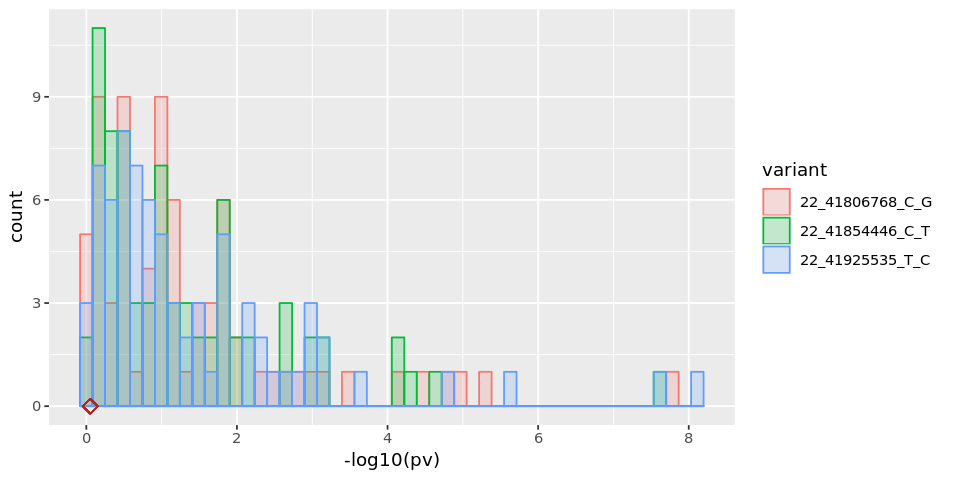

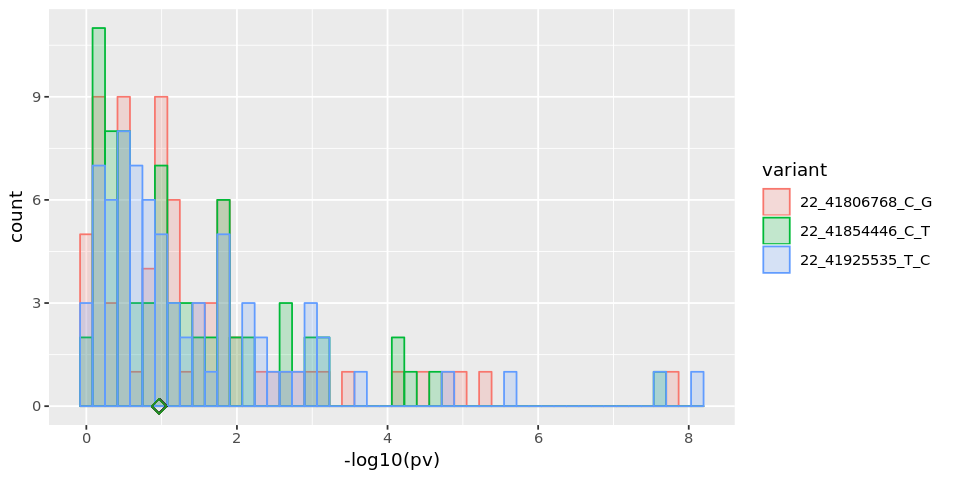

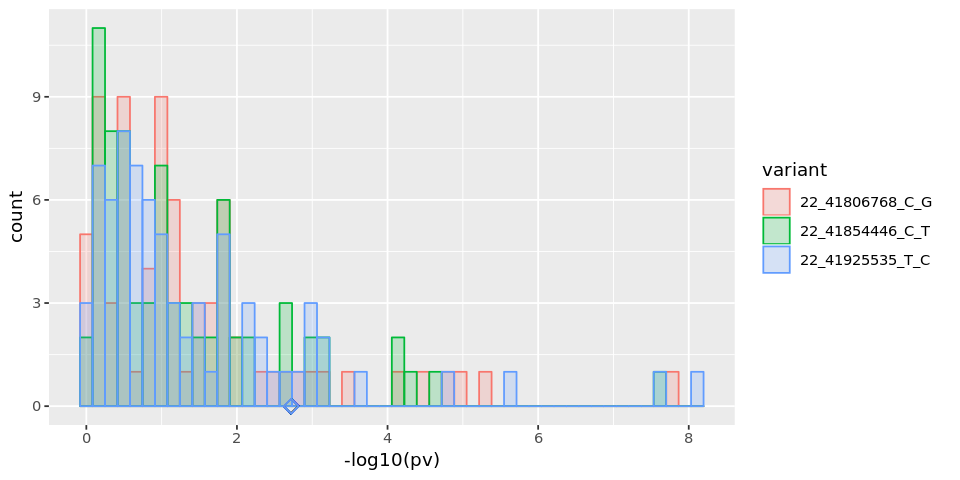

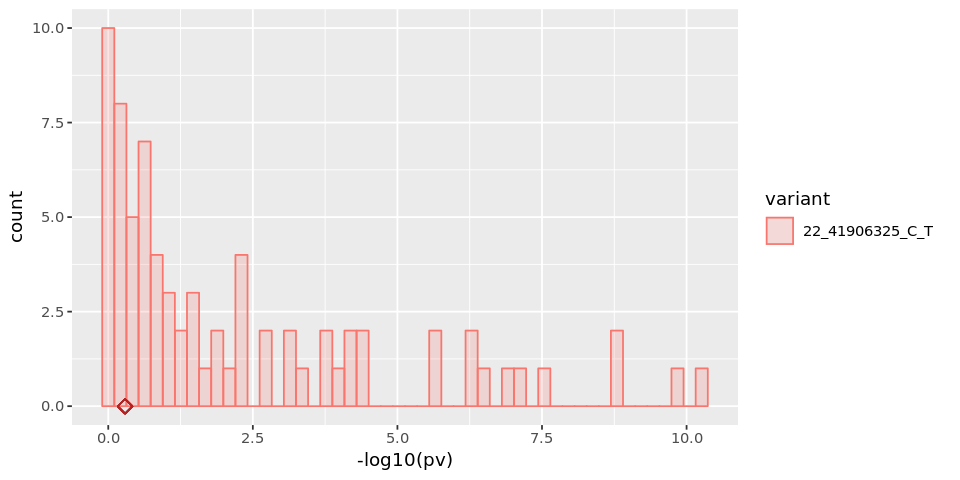

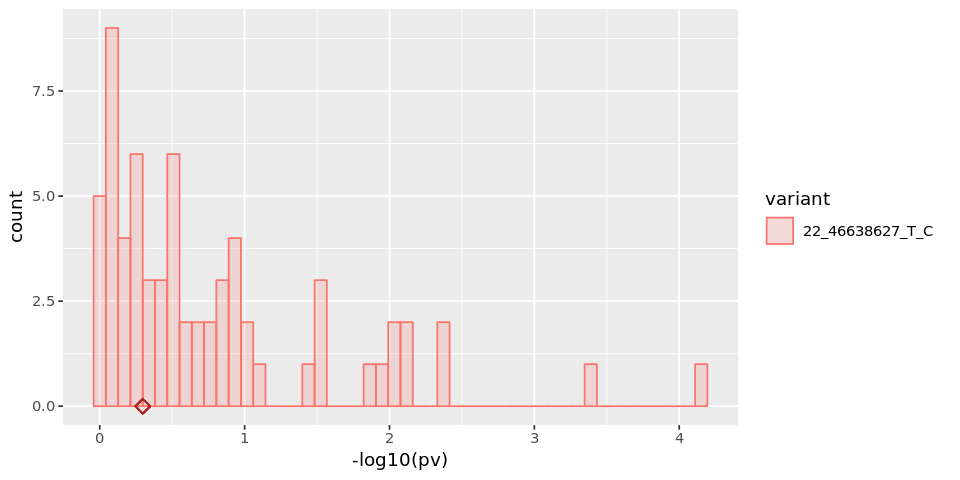

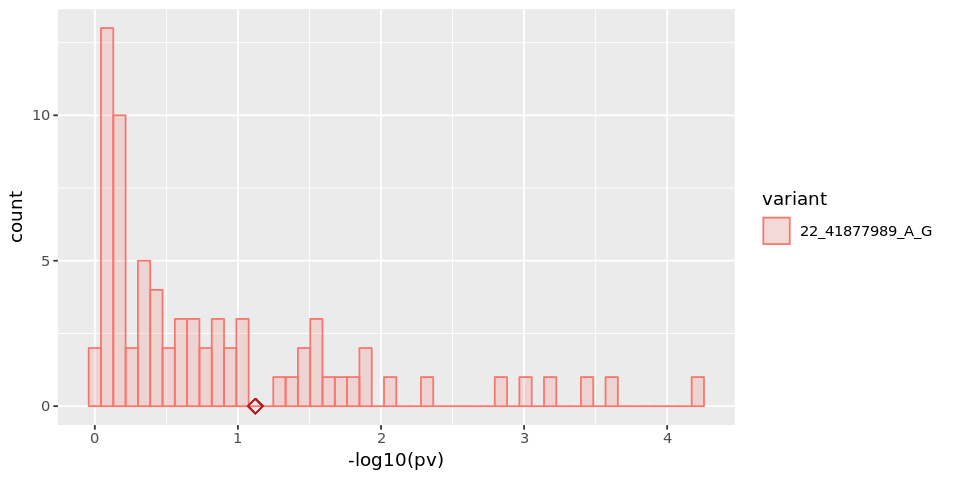

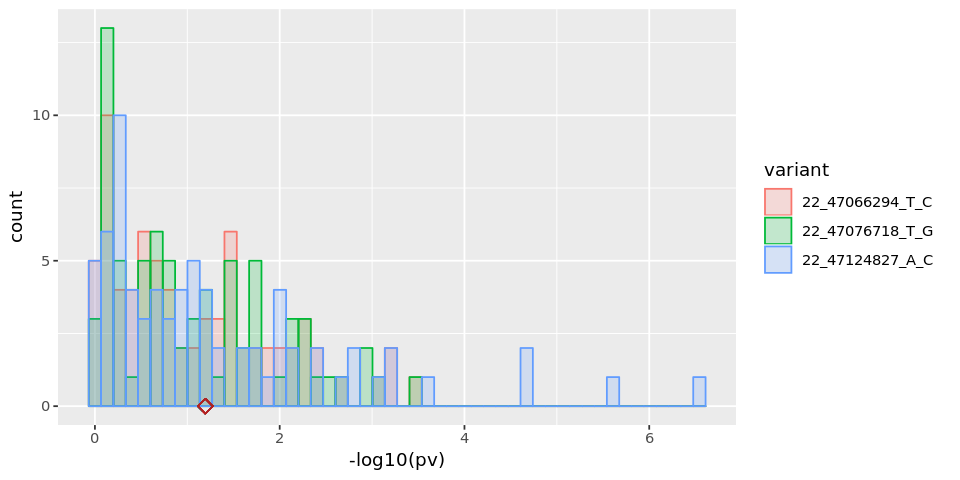

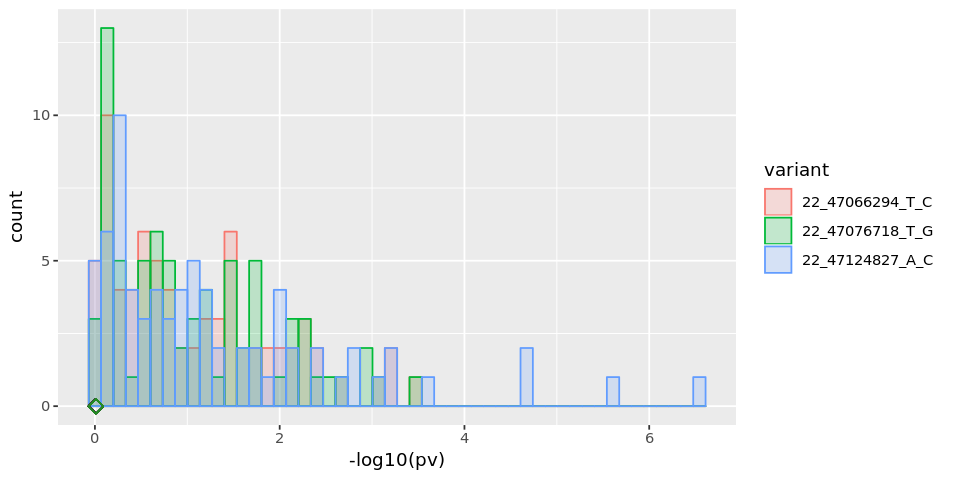

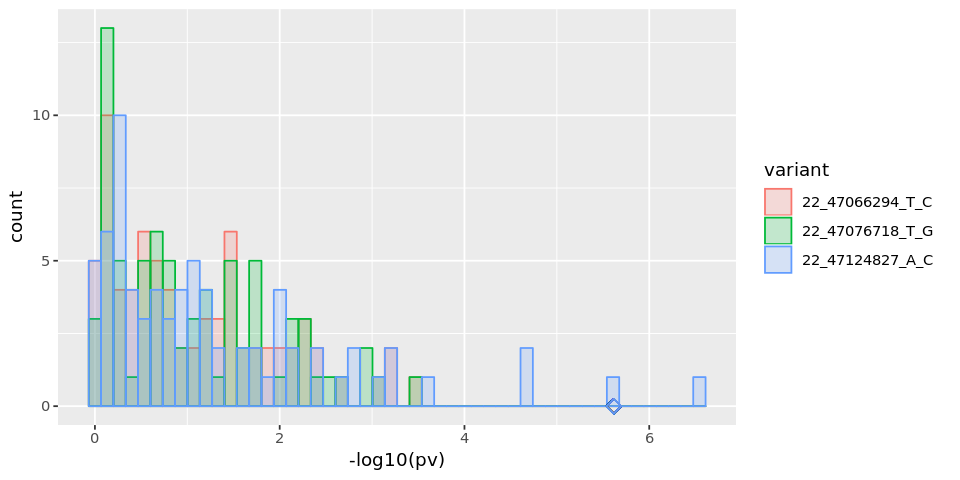

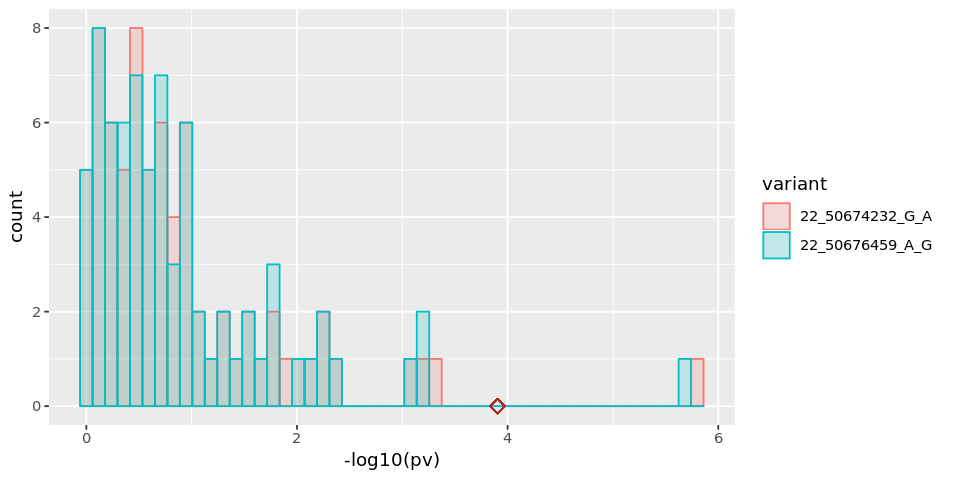

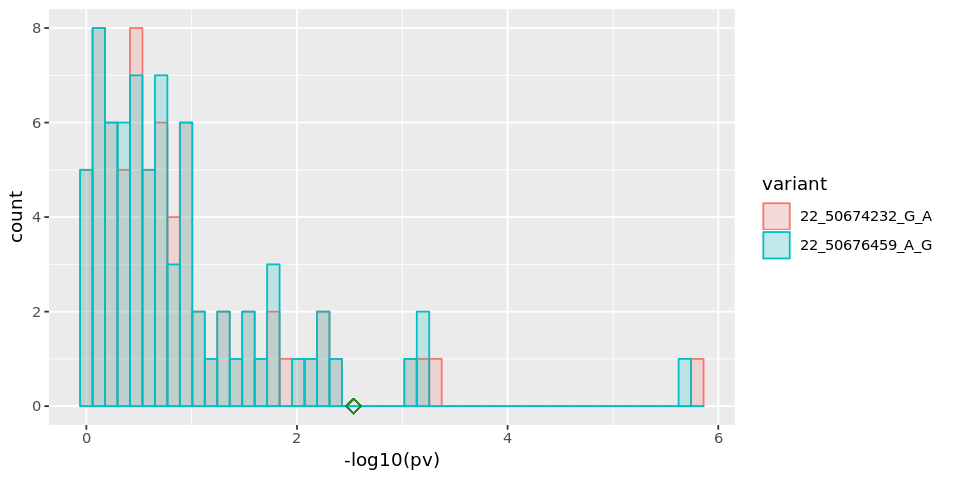

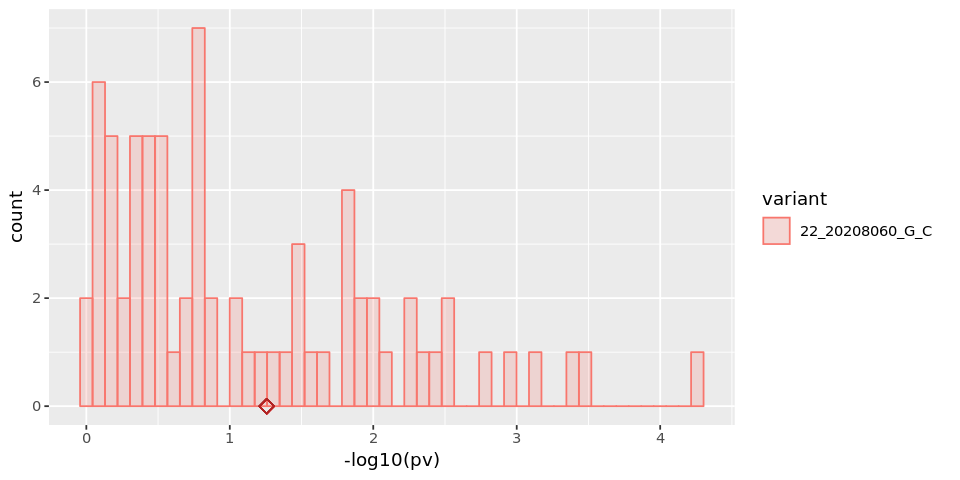

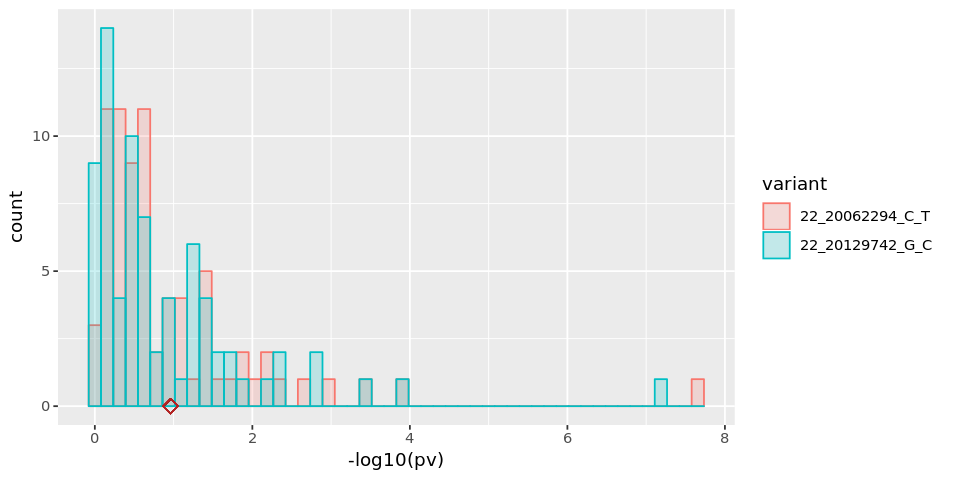

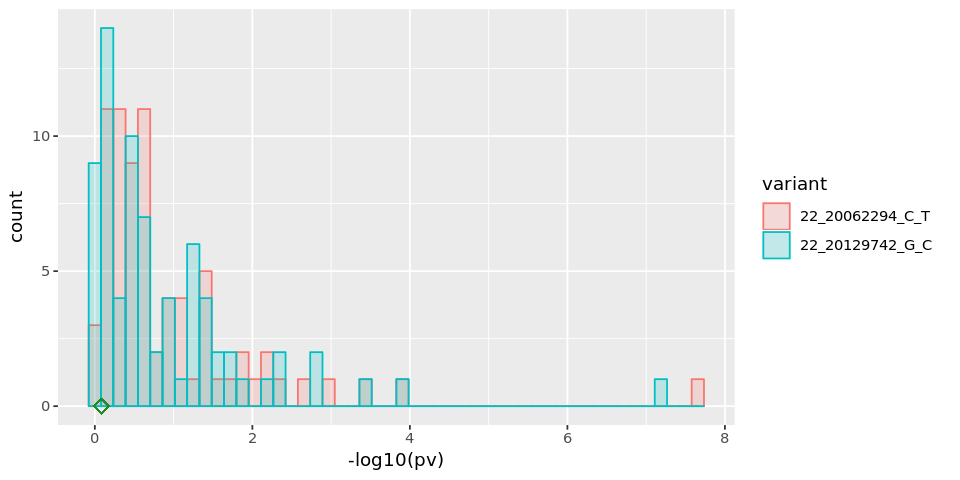

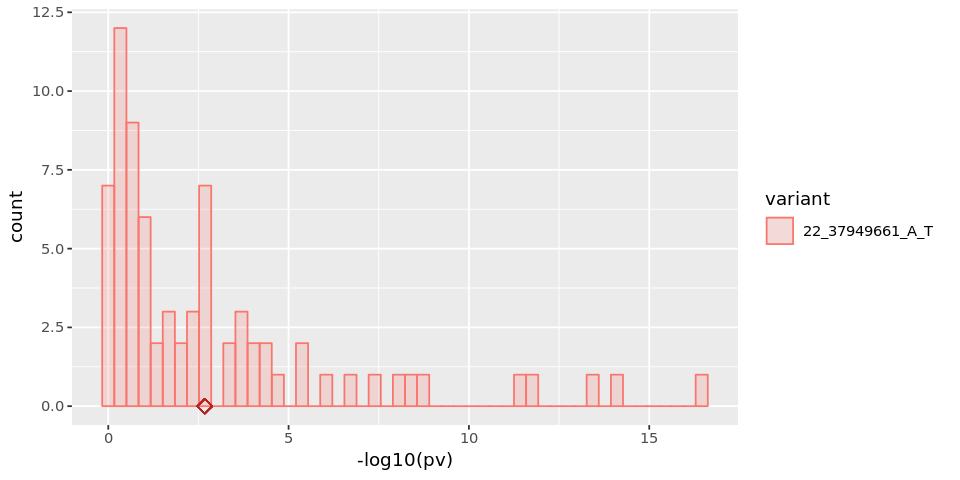

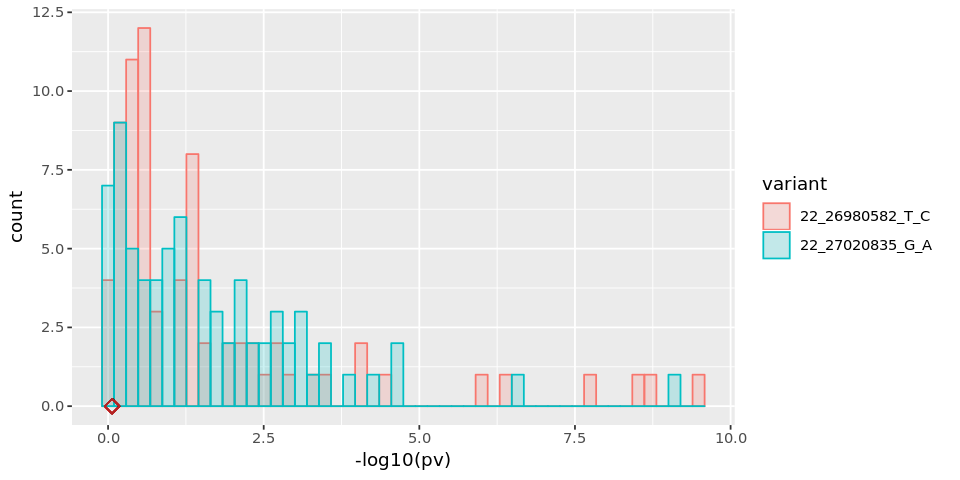

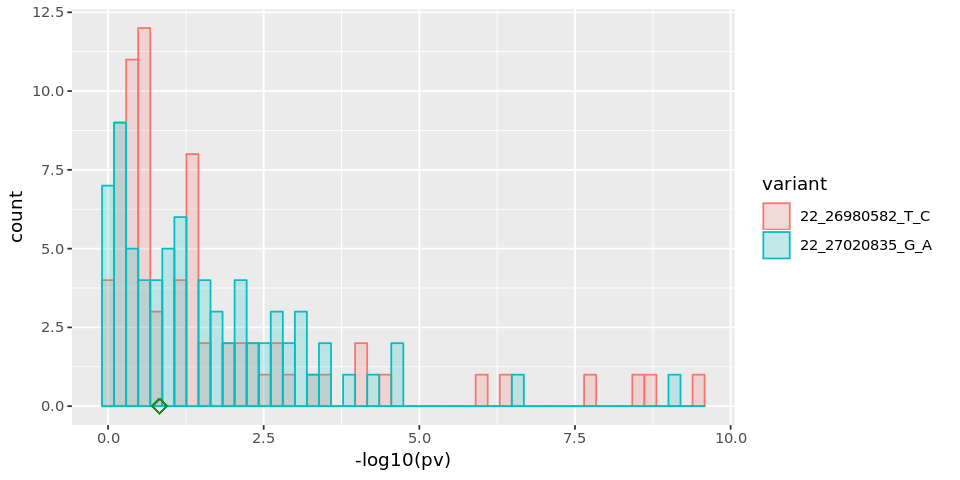

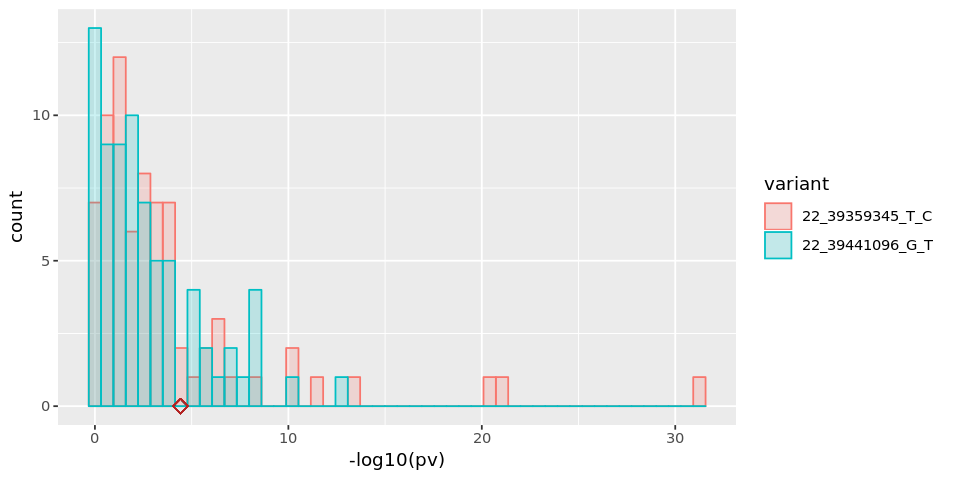

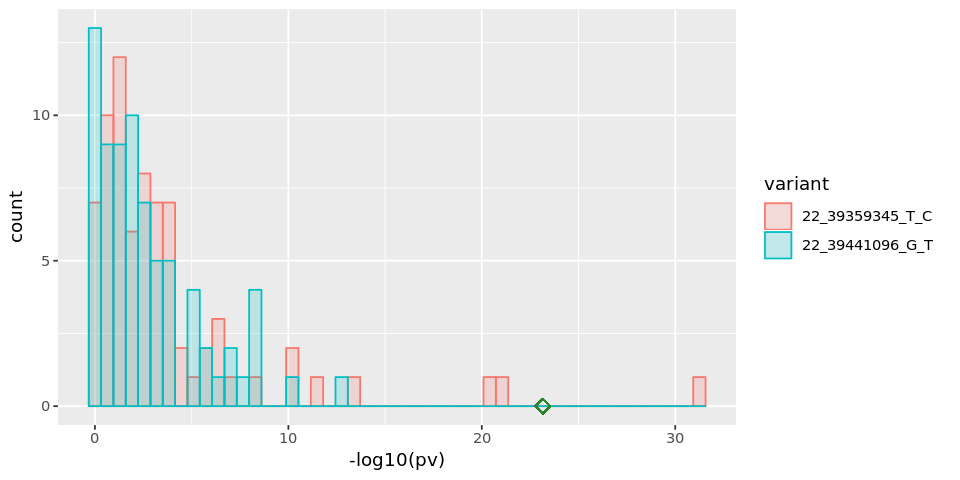

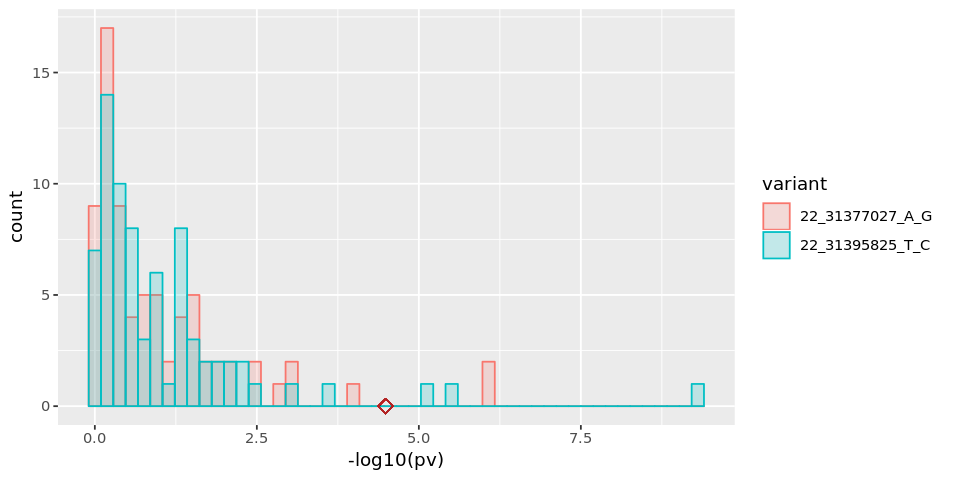

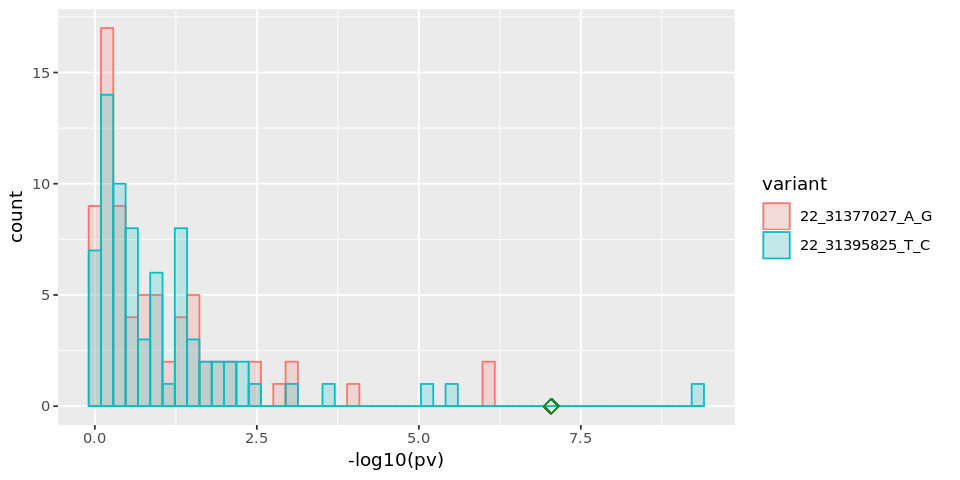

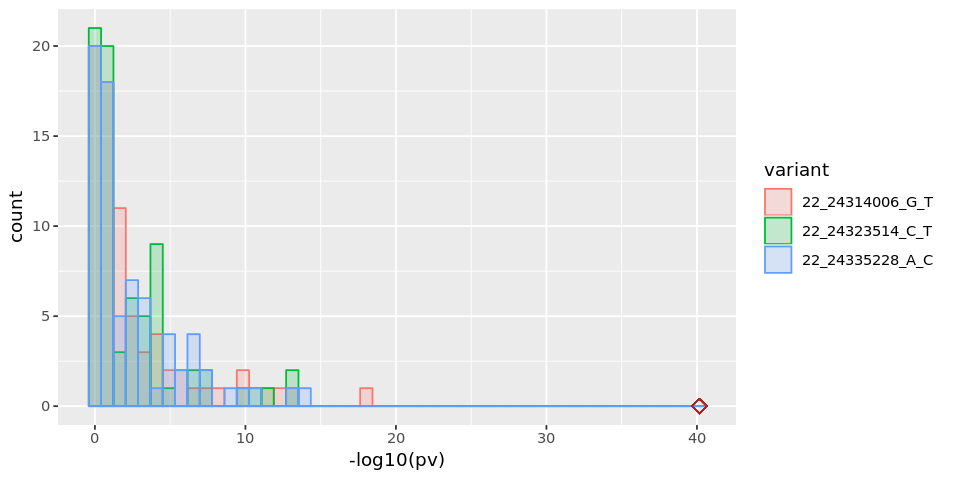

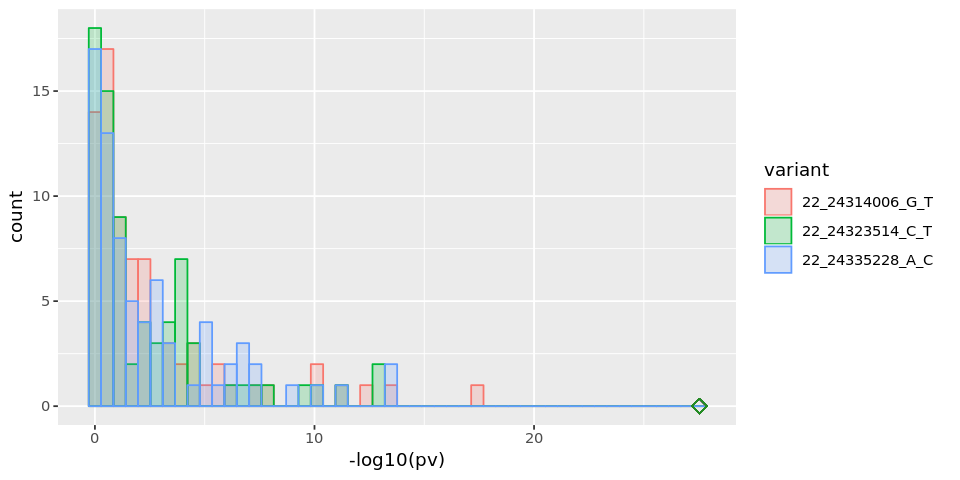

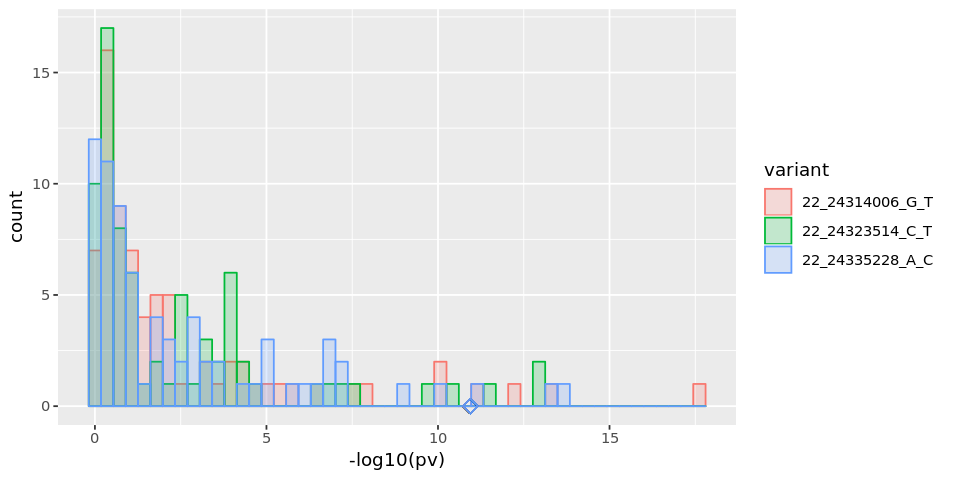

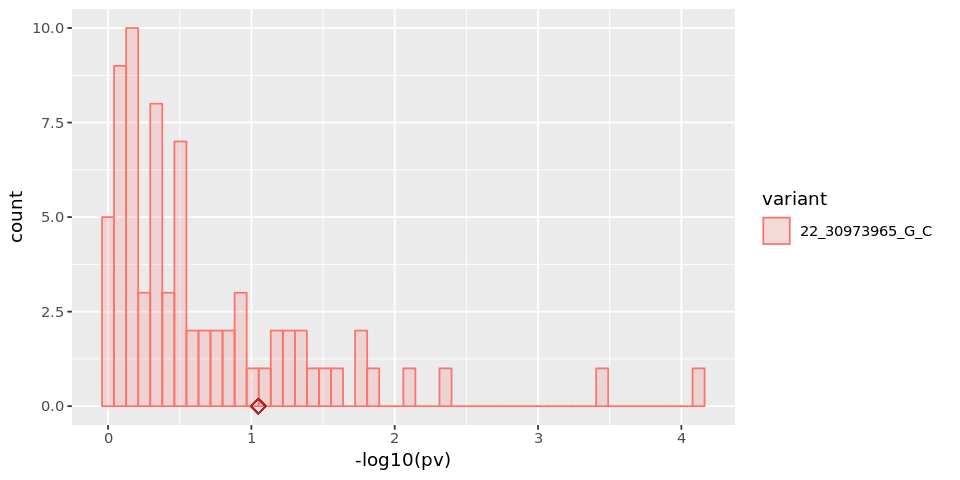

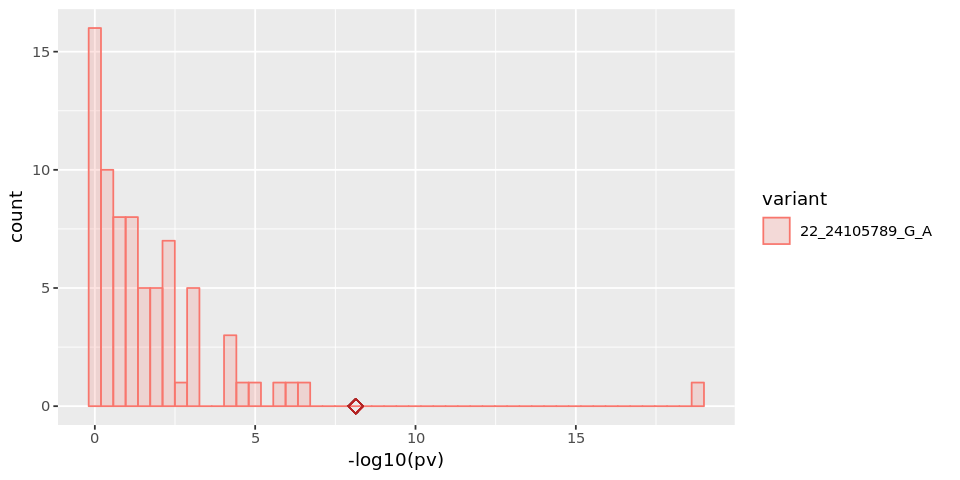

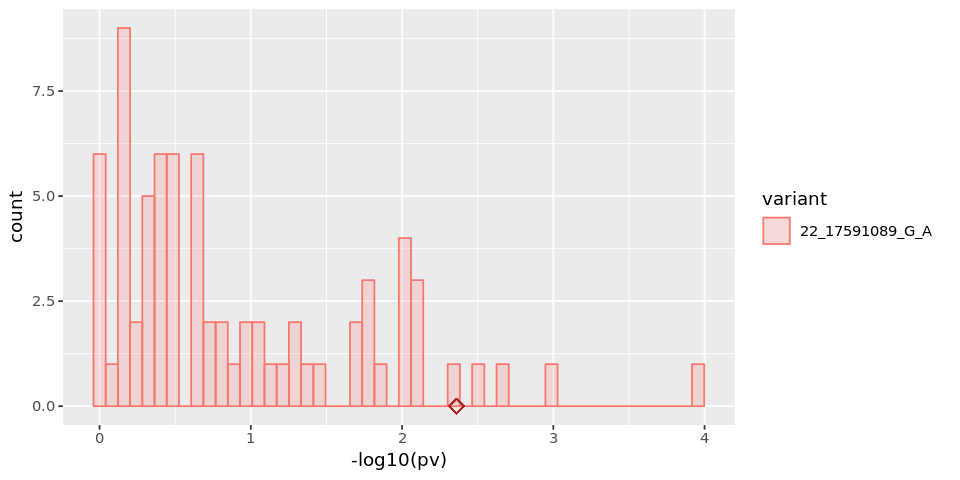

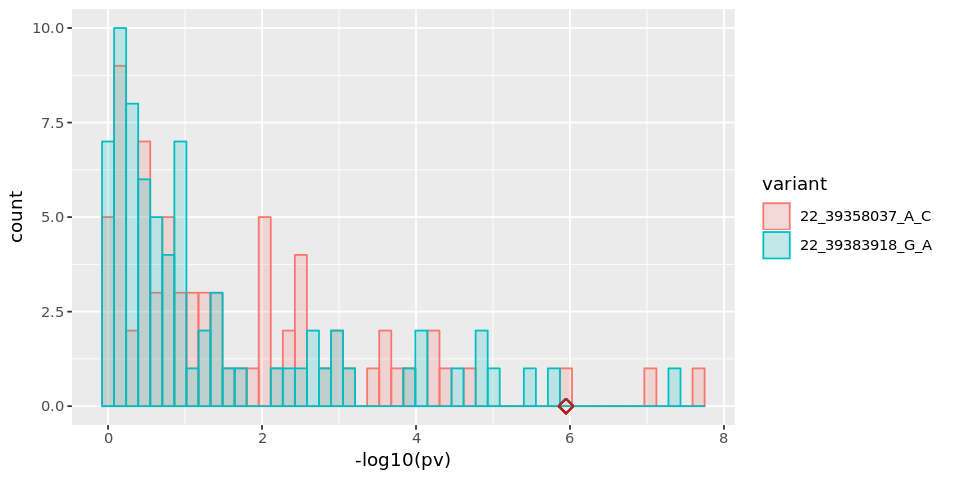

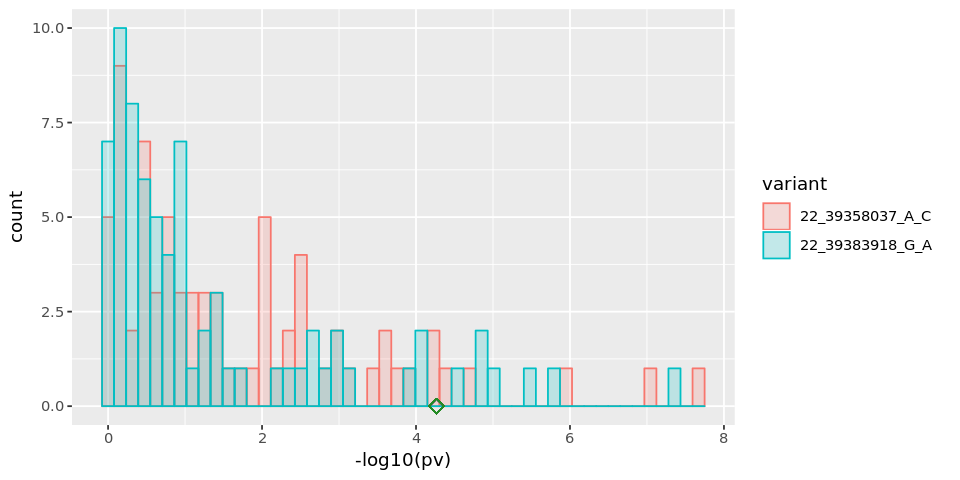

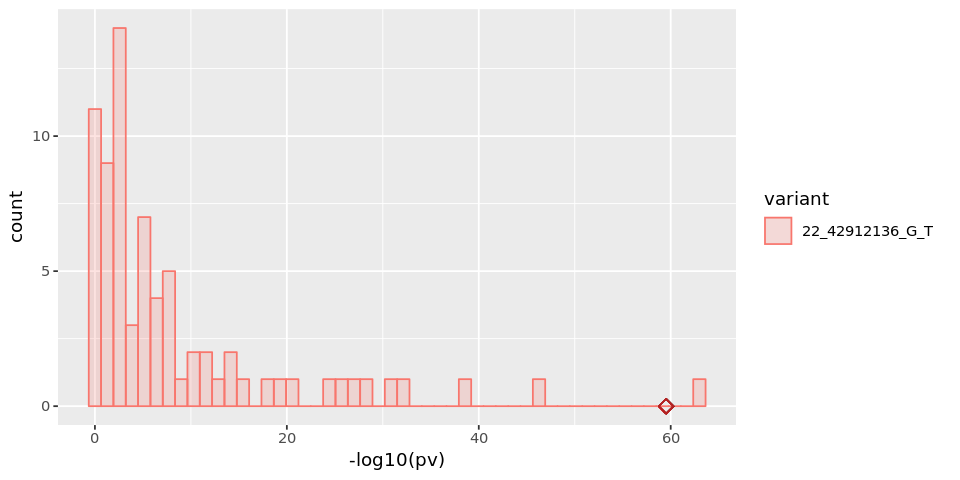

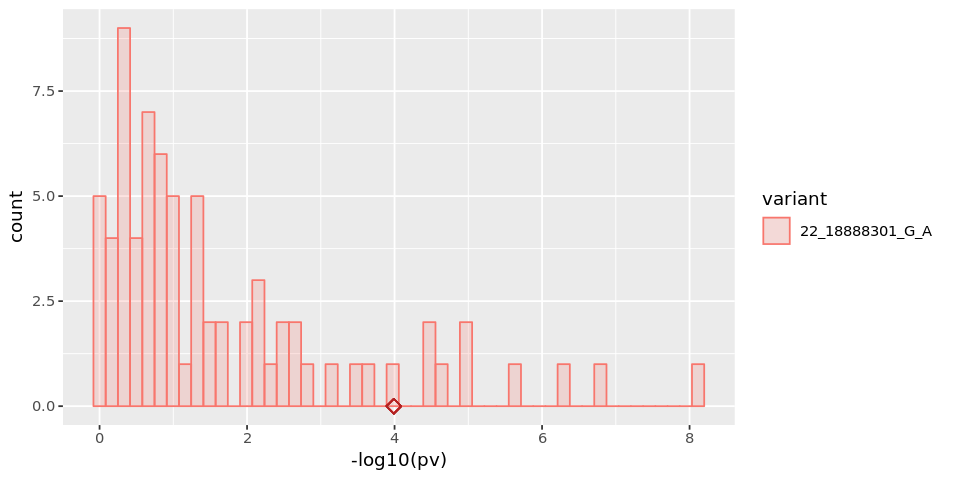

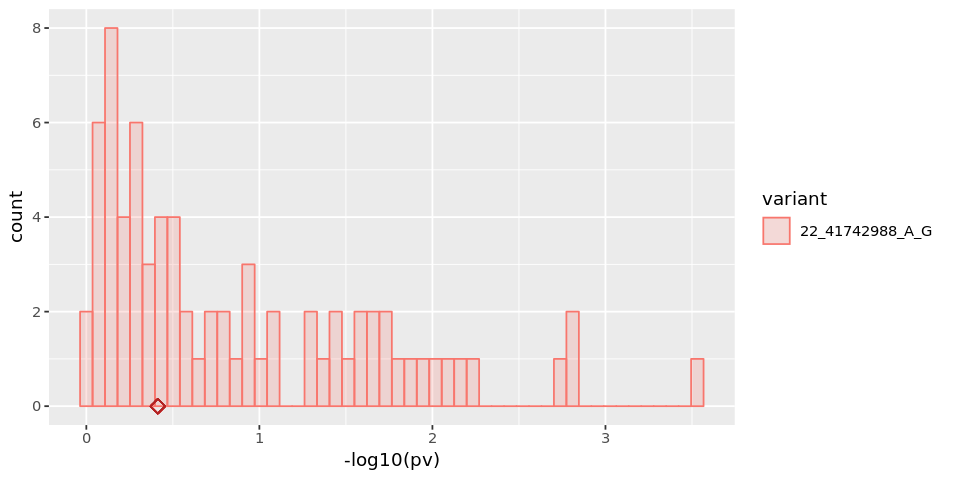

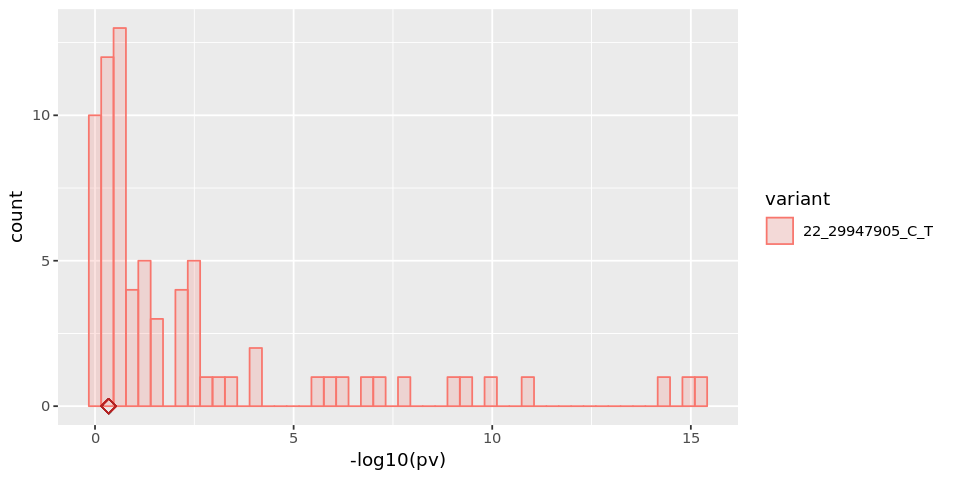

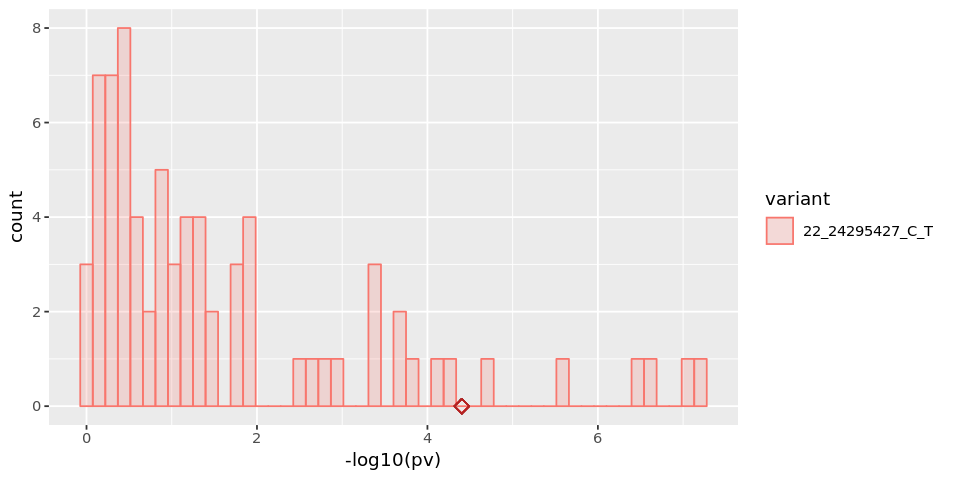

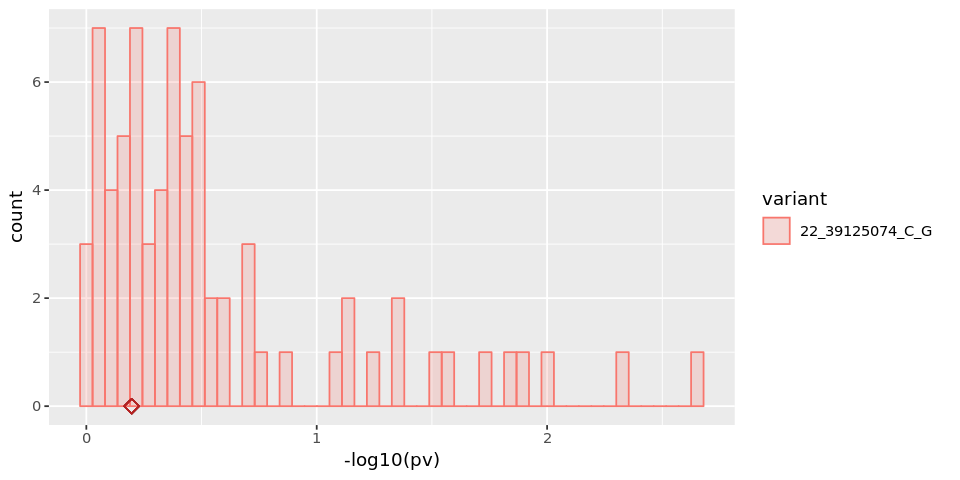

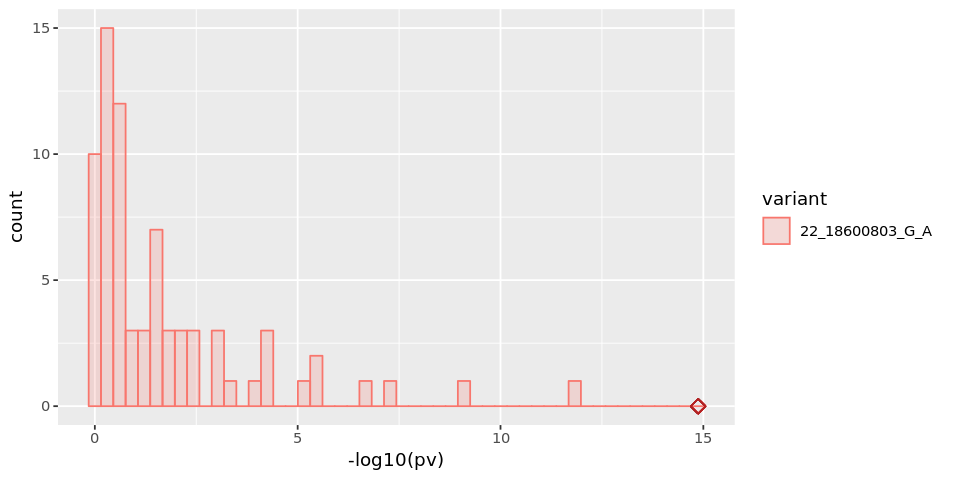

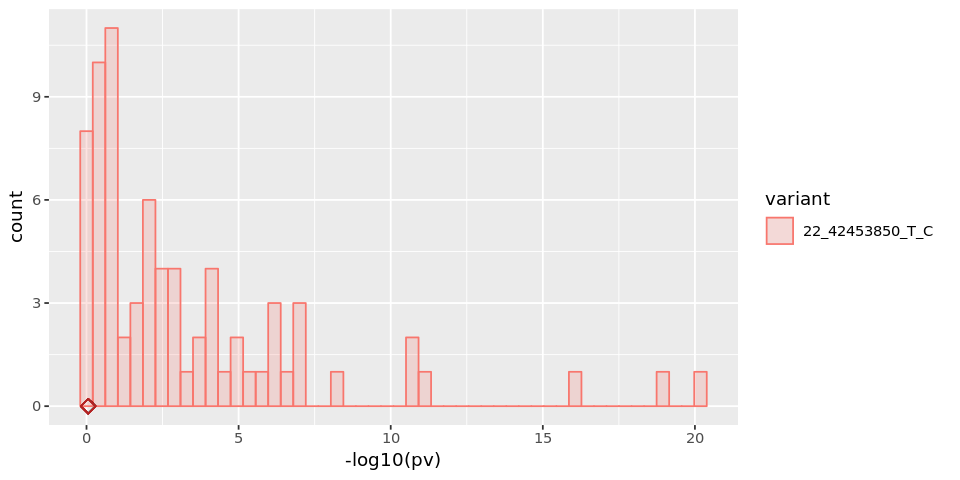

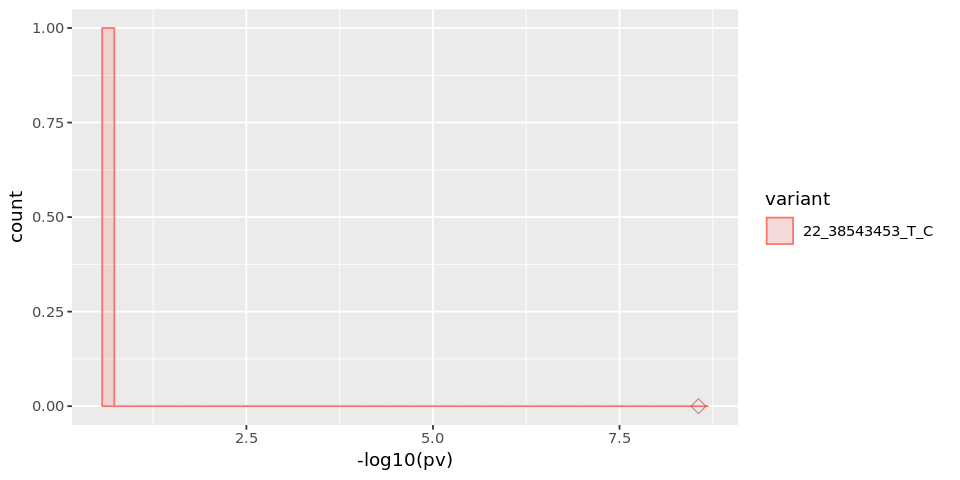

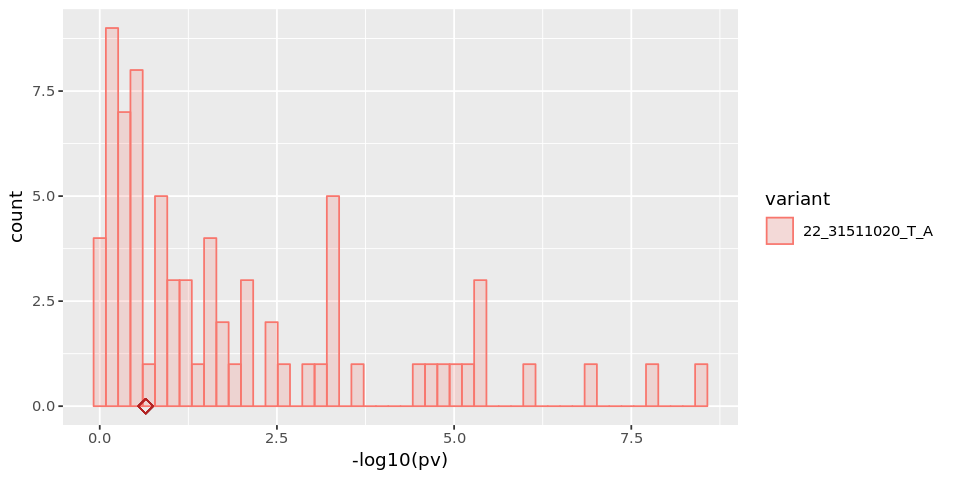

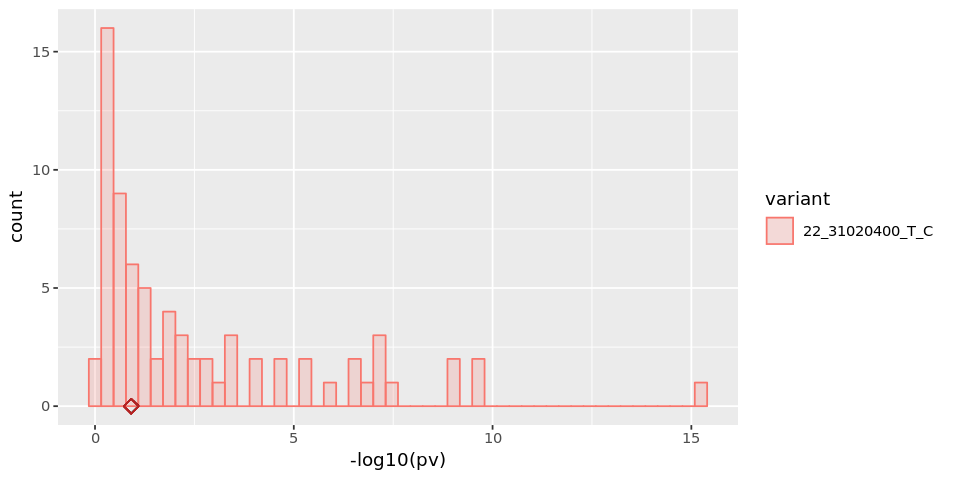

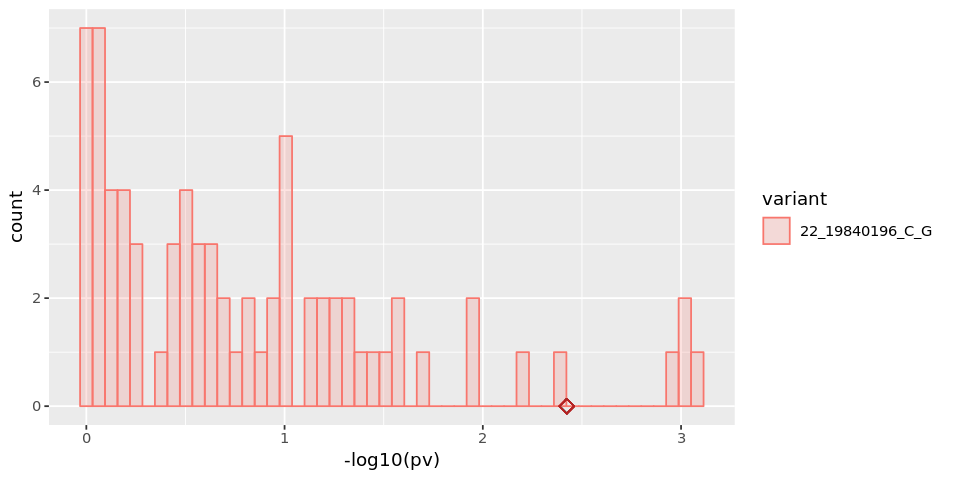

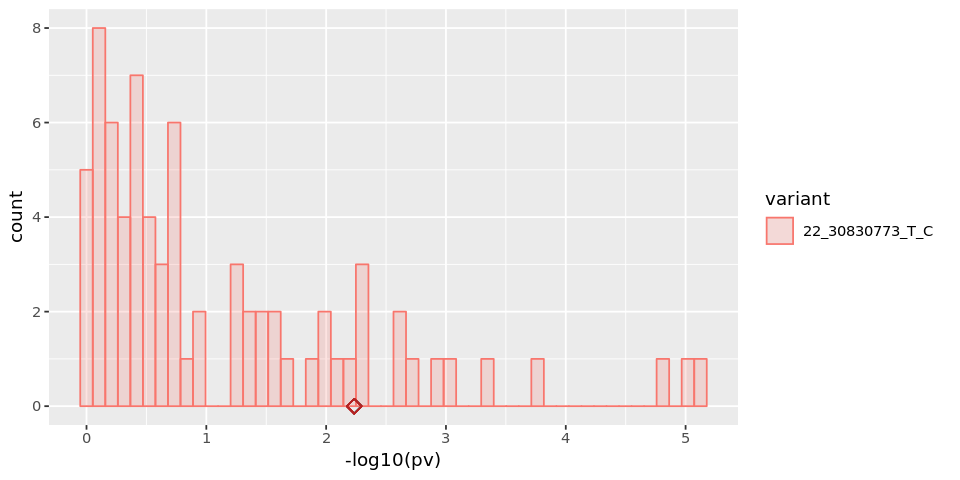

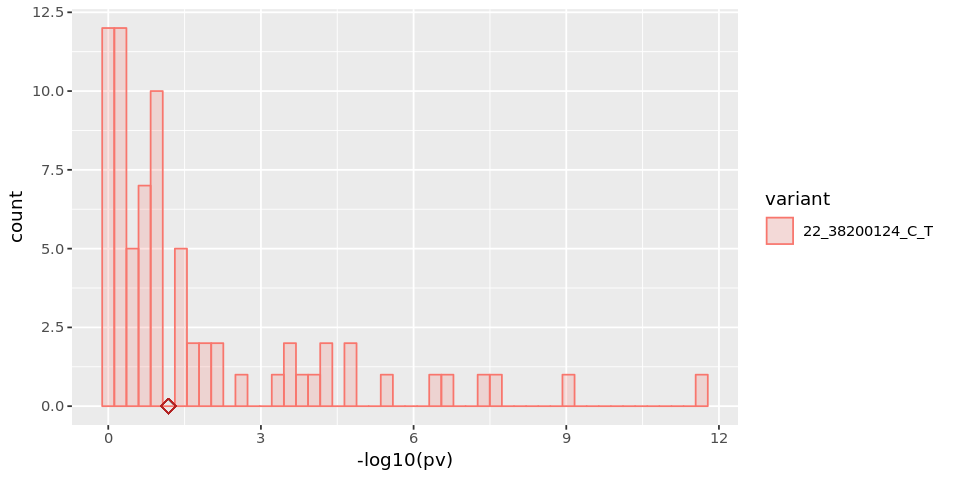

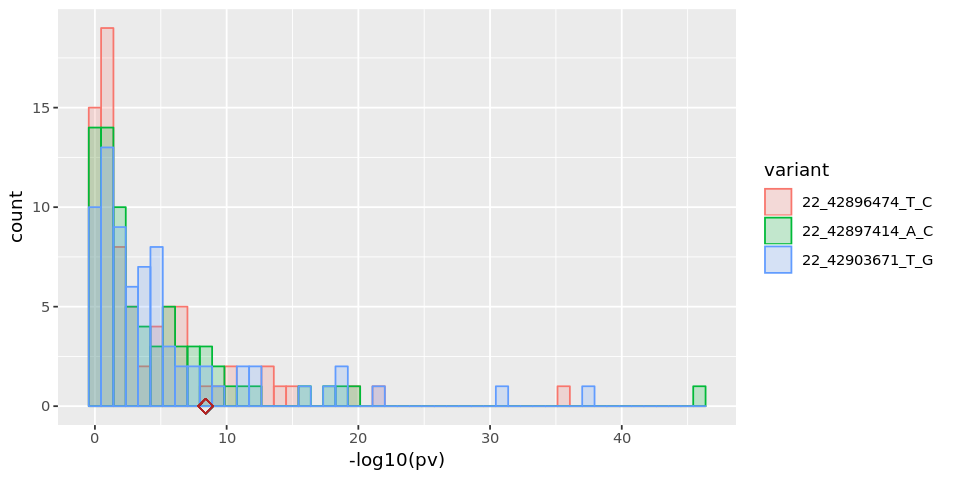

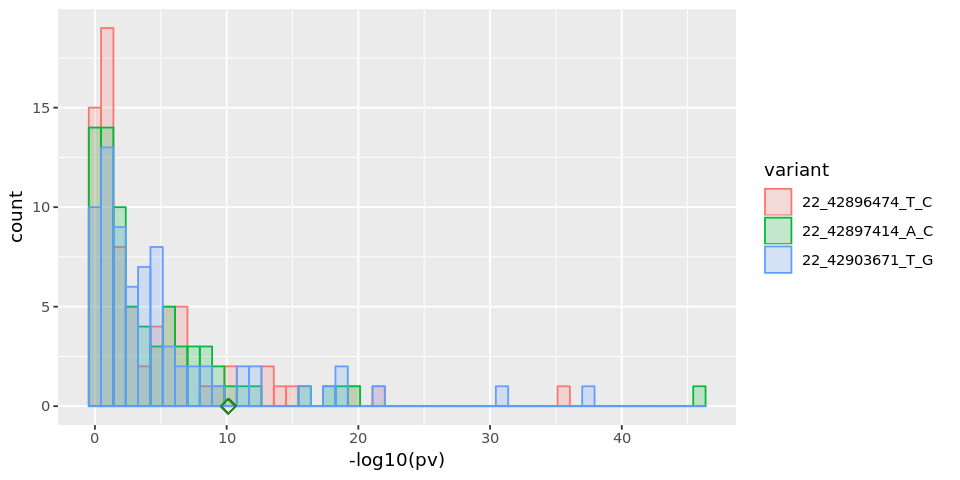

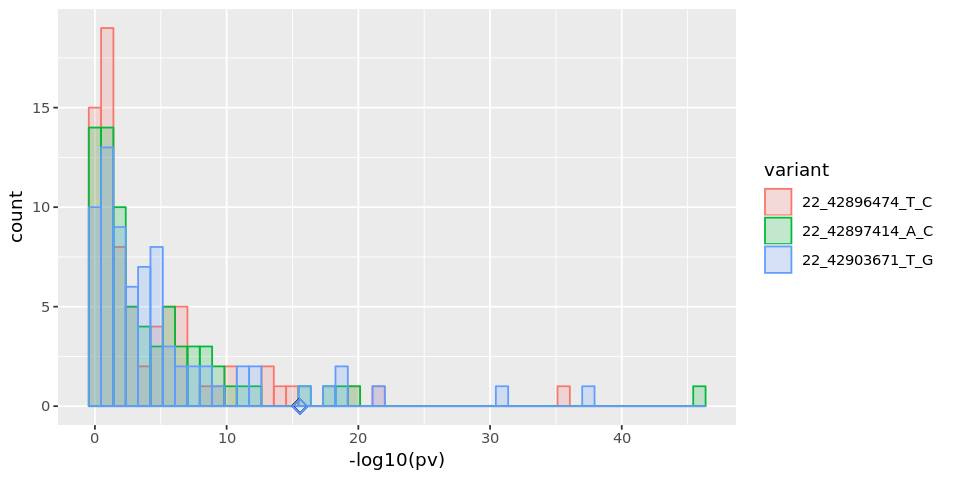

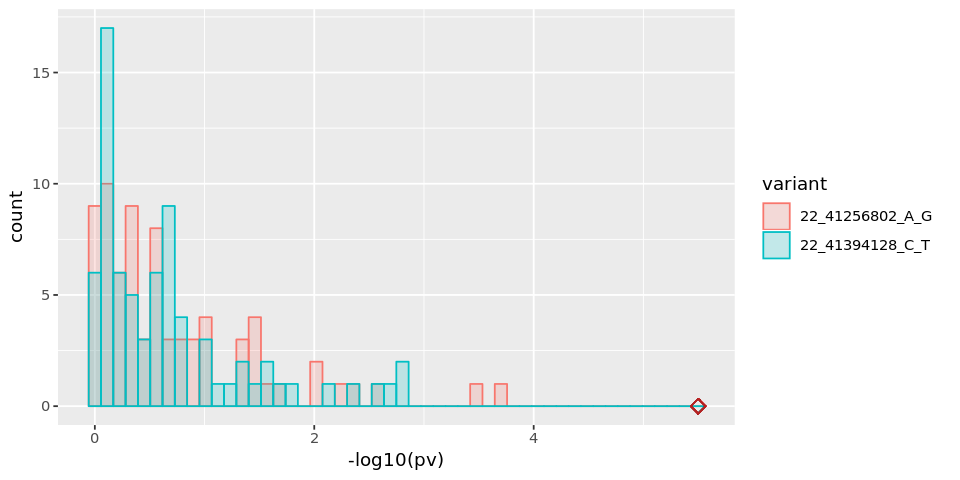

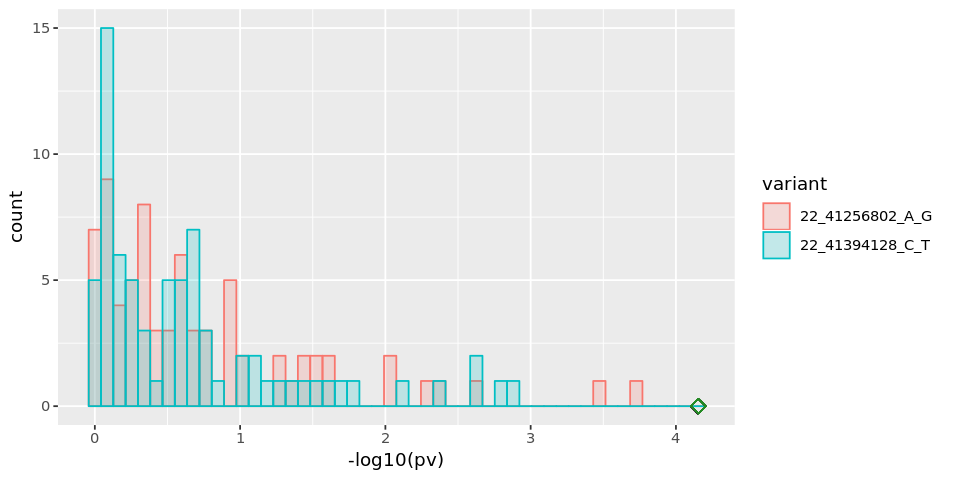

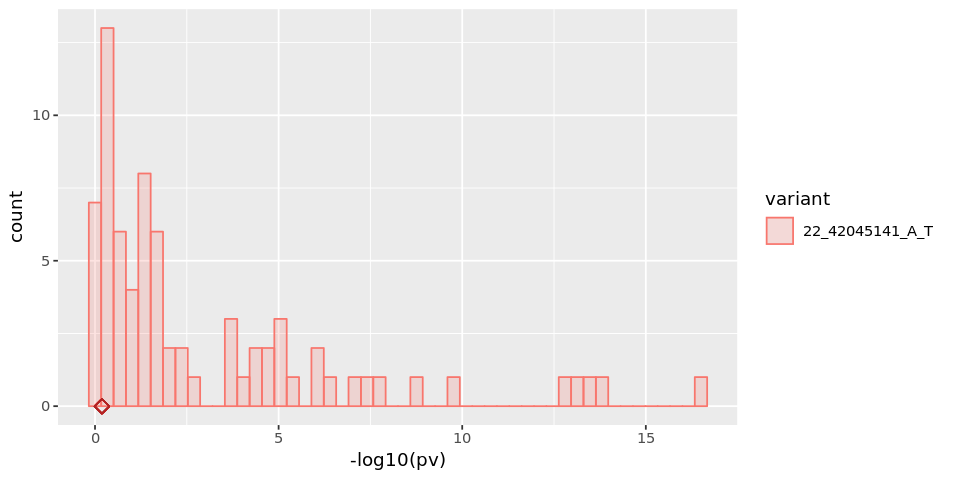

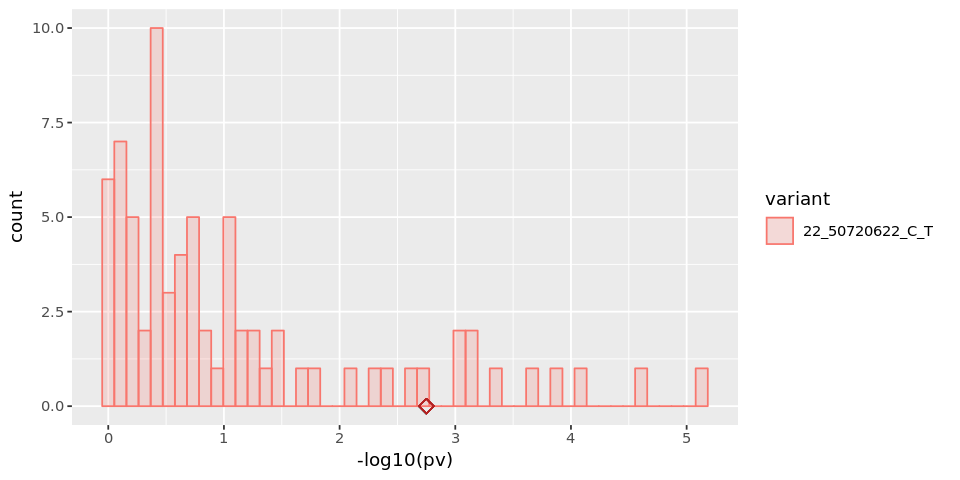

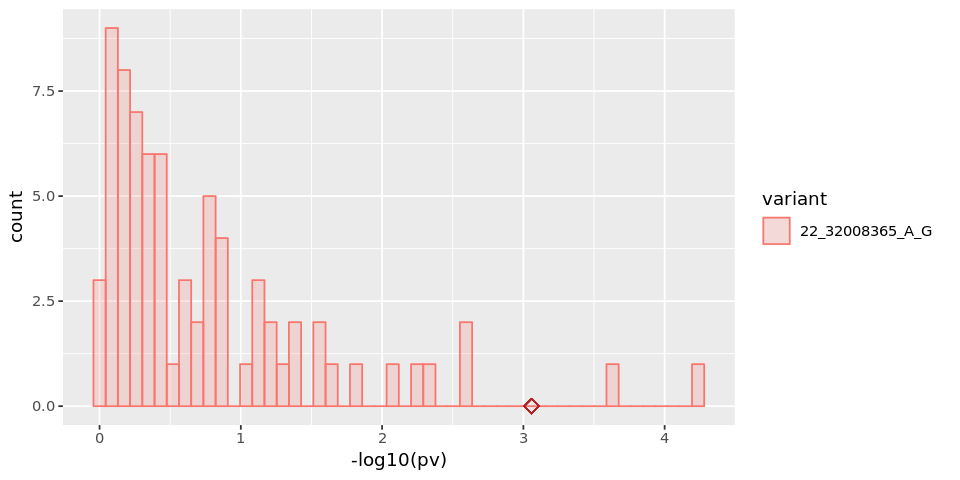

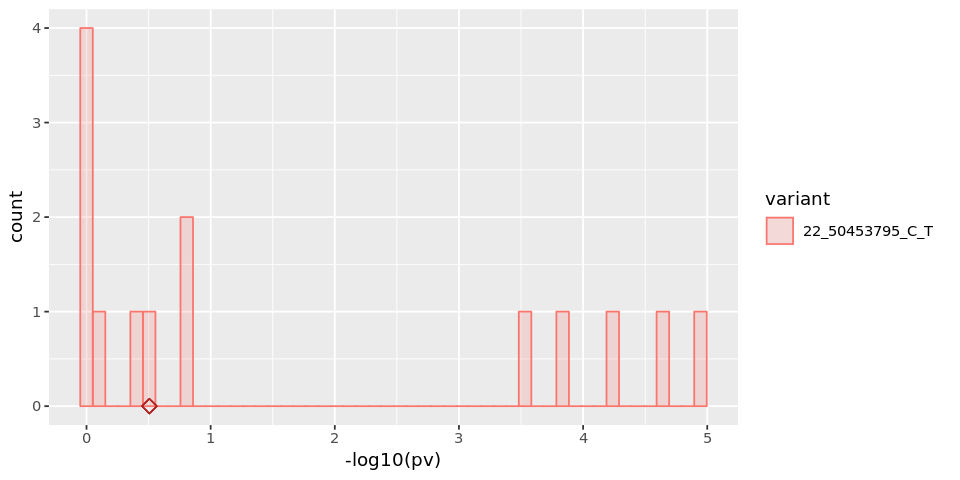

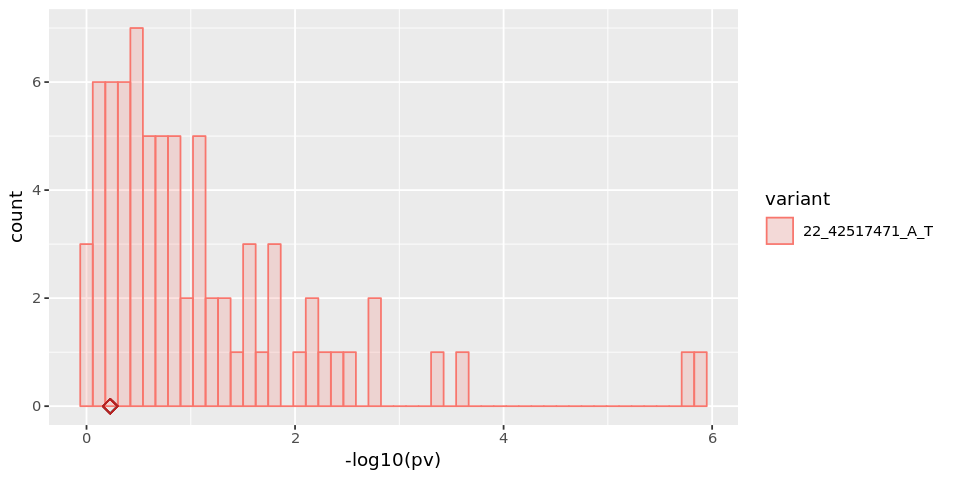

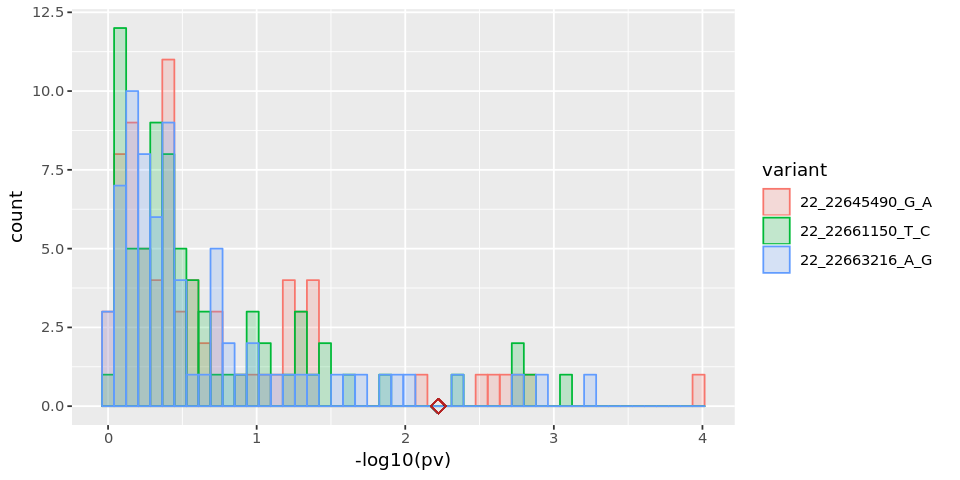

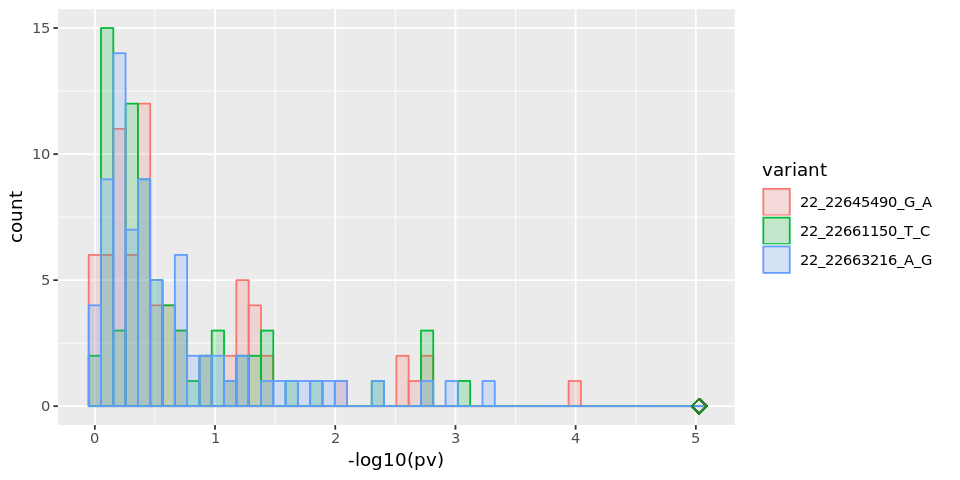

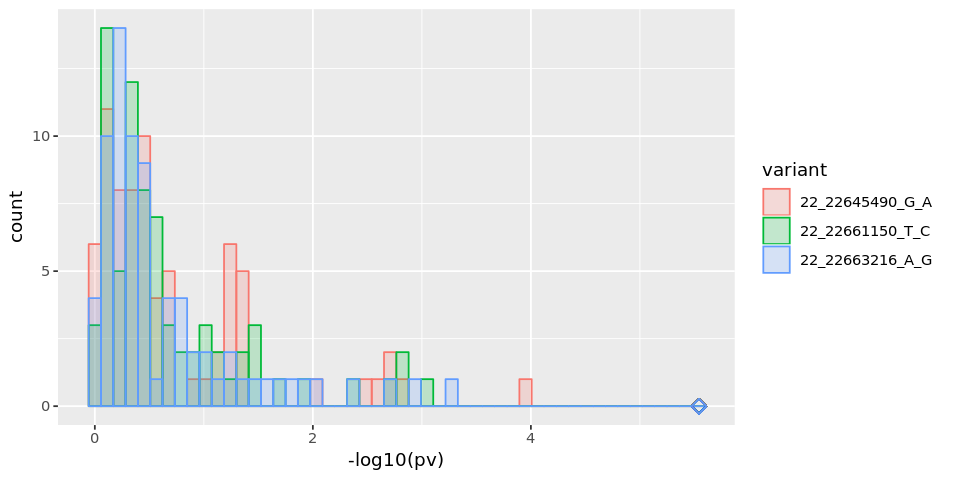

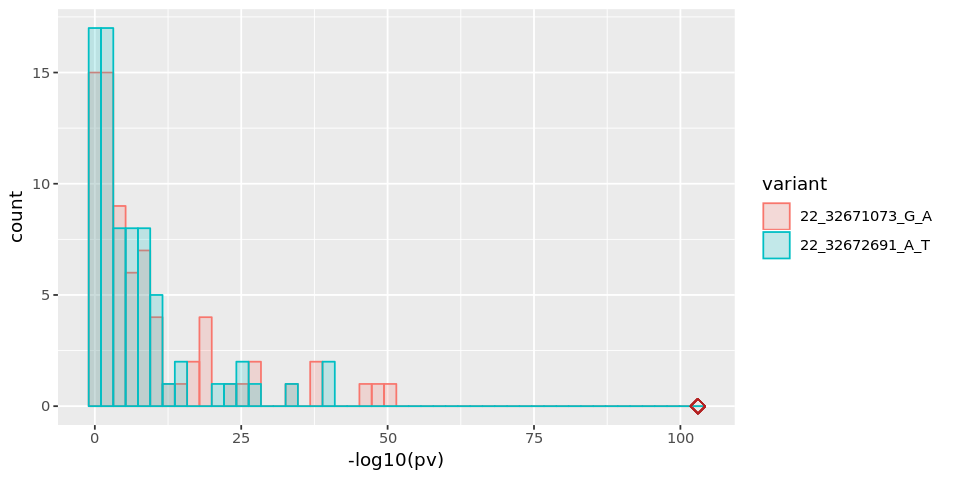

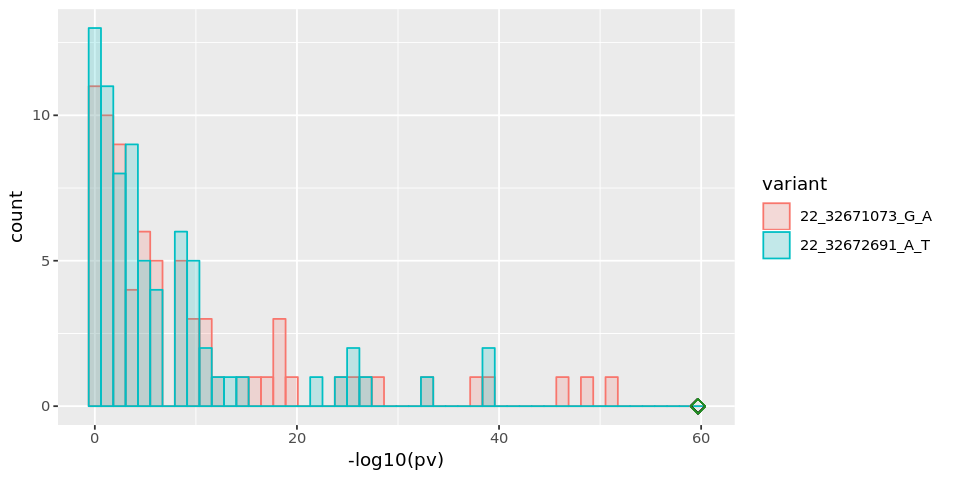

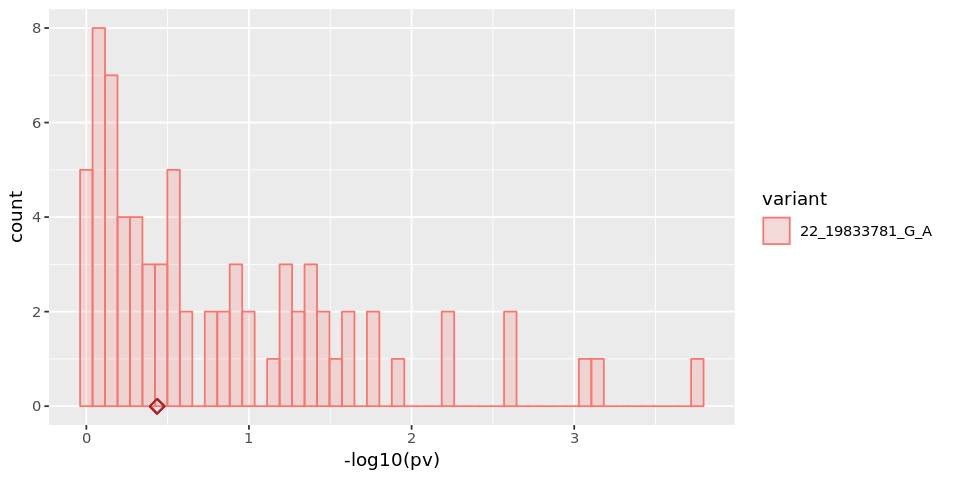

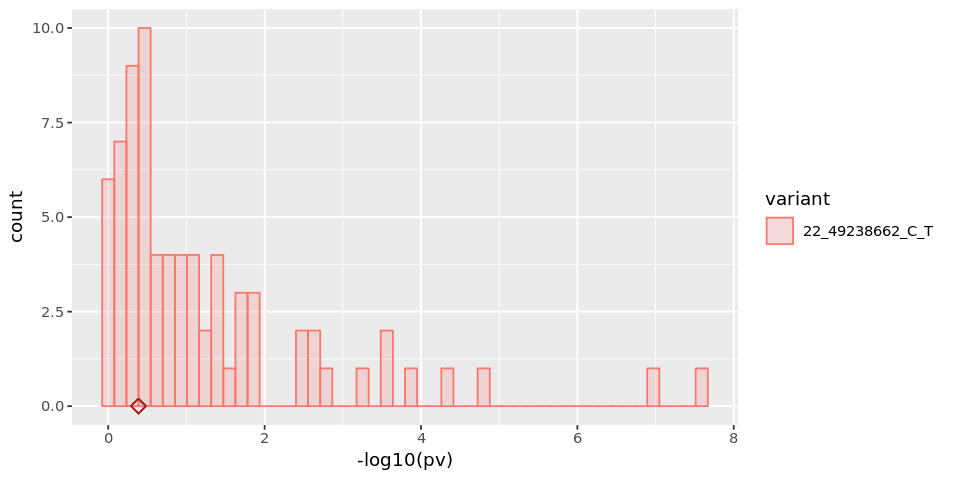

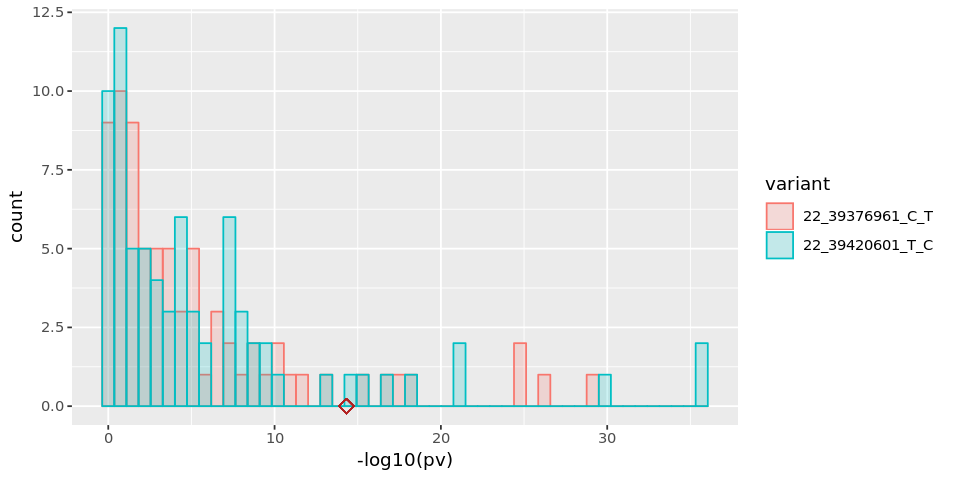

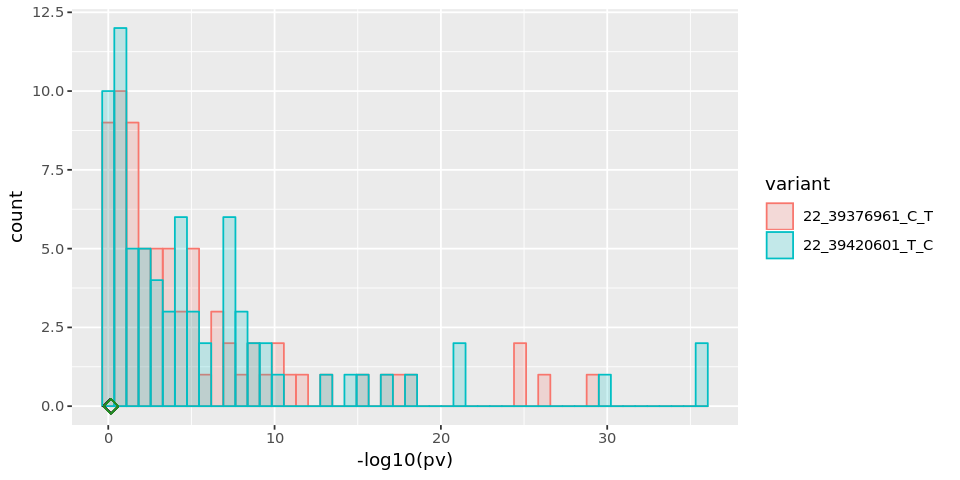

In [114]:
cols = c("firebrick","forestgreen","cornflowerblue")
for (gene in unique(df$gene)){
    df_plot = df[df$gene == gene,]
    df_plot$variant = as.character(df_plot$variant)
    nsnps = length(unique(df_plot$variant))
    p = ggplot(df_plot, aes(x = -log10(pv))) 
    p = p + geom_histogram(aes(color = variant, fill = variant), alpha = 0.2, position = "identity", bins = 50)
    for (i in 1:nsnps){
        p_real = df0[df0$gene == gene & df0$variant == unique(df_plot$variant)[i],"pv_raw"]
        p = p + geom_point(aes(x = -log10(p_real),y = 0), col = cols[i], alpha = 0.5, pch = 23, size = 3)
        print(p)
    }
}

In [ ]:
# options(repr.plot.width = 8, repr.plot.height = 4) 
# p = ggplot(df[df$gene == 'ENSG00000075234_TTC38',], aes(x = -log10(pv))) 
# p = p + geom_histogram(aes(color = gene, fill = gene), alpha = 0.2, position = "identity", bins = 50) 
# # p = p + geom_density(aes(color = gene))
# # p = p + coord_cartesian(ylim(c(0,40)),xlim(c(0,10)))
# p